# 1. Import Libraries

In [97]:
import os
from typing import List

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# 2. Load data & check basics

In [154]:
ROOT = '/root/LG_aimers_24summer/data'
train1_path = os.path.join(ROOT, 'train1.csv')
train2_path = os.path.join(ROOT, 'train2.csv')

In [155]:
train1 = pd.read_csv(train1_path)
train2 = pd.read_csv(train2_path)

In [156]:
print(train1.shape)
print(train2.shape)

(25030, 464)
(15476, 464)


In [157]:
train1.head()

Wip Line_Dam Process Desc._Dam     Equipment_Dam Model.Suffix_Dam  \
0      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334505   
1      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334505   
2      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
3      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
4      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   

  Workorder_Dam  Insp. Seq No._Dam Insp Judge Code_Dam  \
0    4F1XA938-1                  1                  OK   
1    3KPM0016-2                  1                  OK   
2    3HPM0007-1                  1                  OK   
3    3G1X8297-2                  1                  OK   
4    3M1XH425-1                  1                  OK   

   CURE END POSITION X Collect Result_Dam  CURE END POSITION X Unit Time_Dam  \
0                                   240.0                                NaN   
1                                   240.0                                NaN   
2                                   240.0                                NaN   
3                                   240.0                                NaN   
4                                   240.0                                NaN   

   CURE END POSITION X Judge Value_Dam  ...  \
0                                  NaN  ...   
1                                  NaN  ...   
2                                  NaN  ...   
3                                  NaN  ...   
4                                  NaN  ...   

   Production Qty Collect Result_Fill2  Production Qty Unit Time_Fill2  \
0                                    7                             NaN   
1                                  185                             NaN   
2                                  121                             NaN   
3                                  343                             NaN   
4                                    8                             NaN   

   Production Qty Judge Value_Fill2  Receip No Collect Result_Fill2  \
0                               NaN                             127   
1                               NaN                               1   
2                               NaN                               1   
3                               NaN                               1   
4                               NaN                             483   

   Receip No Unit Time_Fill2  Receip No Judge Value_Fill2  \
0                        NaN                          NaN   
1                        NaN                          NaN   
2                        NaN                          NaN   
3                        NaN                          NaN   
4                        NaN                          NaN   

   WorkMode Collect Result_Fill2  WorkMode Unit Time_Fill2  \
0                              1                       NaN   
1                              0                       NaN   
2                              0                       NaN   
3                              0                       NaN   
4                              1                       NaN   

   WorkMode Judge Value_Fill2  target  
0                         NaN  Normal  
1                         NaN  Normal  
2                         NaN  Normal  
3                         NaN  Normal  
4                         NaN  Normal  

[5 rows x 464 columns]

In [158]:
train2.head()

Wip Line_Dam Process Desc._Dam     Equipment_Dam Model.Suffix_Dam  \
0      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
1      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
2      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
3      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
4      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   

  Workorder_Dam  Insp. Seq No._Dam Insp Judge Code_Dam  \
0    4E1X9167-1                  1                  OK   
1    3K1X0057-1                  1                  OK   
2    4A1XB542-4                  1                  OK   
3    4E1X9168-1                  1                  OK   
4    4A1XC343-1                  1                  OK   

   CURE END POSITION X Collect Result_Dam  CURE END POSITION X Unit Time_Dam  \
0                                  1000.0                                NaN   
1                                  1000.0                                NaN   
2                                  1000.0                                NaN   
3                                  1000.0                                NaN   
4                                  1000.0                                NaN   

   CURE END POSITION X Judge Value_Dam  ...  \
0                                  NaN  ...   
1                                  NaN  ...   
2                                  NaN  ...   
3                                  NaN  ...   
4                                  NaN  ...   

   Production Qty Collect Result_Fill2  Production Qty Unit Time_Fill2  \
0                                   10                             NaN   
1                                  268                             NaN   
2                                   11                             NaN   
3                                   15                             NaN   
4                                   16                             NaN   

   Production Qty Judge Value_Fill2  Receip No Collect Result_Fill2  \
0                               NaN                              73   
1                               NaN                               1   
2                               NaN                             105   
3                               NaN                              78   
4                               NaN                             221   

   Receip No Unit Time_Fill2  Receip No Judge Value_Fill2  \
0                        NaN                          NaN   
1                        NaN                          NaN   
2                        NaN                          NaN   
3                        NaN                          NaN   
4                        NaN                          NaN   

   WorkMode Collect Result_Fill2  WorkMode Unit Time_Fill2  \
0                              1                       NaN   
1                              0                       NaN   
2                              1                       NaN   
3                              1                       NaN   
4                              1                       NaN   

   WorkMode Judge Value_Fill2  target  
0                         NaN  Normal  
1                         NaN  Normal  
2                         NaN  Normal  
3                         NaN  Normal  
4                         NaN  Normal  

[5 rows x 464 columns]

# 3. Preprocess

##### 모든 값이 NaN 또는 OK인 칼럼 제거 

In [159]:
train1.replace('OK', np.nan, inplace=True)
train2.replace('OK', np.nan, inplace=True)

In [160]:
train1.dropna(axis=1, how='all', inplace=True)
train2.dropna(axis=1, how='all', inplace=True)

In [161]:
print(train1.shape)
print(train2.shape)

(25030, 174)
(15476, 174)


##### 단일한 값만 있는 칼럼 제거

In [162]:
columns_to_drop_1 = [col for col in train1.columns if train1[col].nunique() == 1]
train1.drop(columns=columns_to_drop_1, inplace=True)

In [163]:
columns_to_drop_2 = [col for col in train2.columns if train2[col].nunique() == 1]
train2.drop(columns=columns_to_drop_2, inplace=True)

In [164]:
print(train1.shape)
print(train2.shape)

(25030, 139)
(15476, 138)


##### 칼럼별 Null 값의 개수 확인 및 추가 칼럼 제거 

In [165]:
missing_count1 = train1.isnull().sum()
missing_count1[missing_count1 > 0]

HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam      12163
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1    12163
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2    12163
dtype: int64

In [166]:
missing_count2 = train2.isnull().sum()
missing_count2[missing_count2 > 0]

HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1    11896
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2    11896
dtype: int64

In [167]:
train1_col = set(train1.columns)
train2_col = set(train2.columns)
train1_col - train2_col

{'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'}

In [168]:
# 아예... 결측치 있으면 칼럼 drop하자
train1.dropna(axis=1, how='any', inplace=True)
train2.dropna(axis=1, how='any', inplace=True)

In [169]:
train1.to_csv(os.path.join(ROOT, 'train1_filtered.csv'))
train2.to_csv(os.path.join(ROOT, 'train2_filtered.csv'))

##### 범주형 칼럼의 개수와 연속형 칼럼의 개수 확인

In [170]:
categorical_columns = train1.select_dtypes(include=['object', 'category']).columns

In [171]:
len(categorical_columns)

11

In [172]:
train1[categorical_columns].head()

Model.Suffix_Dam Workorder_Dam Model.Suffix_AutoClave Workorder_AutoClave  \
0      AJX75334505    4F1XA938-1            AJX75334505          4F1XA938-1   
1      AJX75334505    3KPM0016-2            AJX75334505          3KPM0016-2   
2      AJX75334501    3HPM0007-1            AJX75334501          3HPM0007-1   
3      AJX75334501    3G1X8297-2            AJX75334501          3G1X8297-2   
4      AJX75334501    3M1XH425-1            AJX75334501          3M1XH425-1   

      Equipment_Fill1 Model.Suffix_Fill1 Workorder_Fill1     Equipment_Fill2  \
0  Fill1 dispenser #1        AJX75334505      4F1XA938-1  Fill2 dispenser #1   
1  Fill1 dispenser #1        AJX75334505      3KPM0016-2  Fill2 dispenser #1   
2  Fill1 dispenser #1        AJX75334501      3HPM0007-1  Fill2 dispenser #1   
3  Fill1 dispenser #1        AJX75334501      3G1X8297-2  Fill2 dispenser #1   
4  Fill1 dispenser #1        AJX75334501      3M1XH425-1  Fill2 dispenser #1   

  Model.Suffix_Fill2 Workorder_Fill2  target  
0        AJX75334505      4F1XA938-1  Normal  
1        AJX75334505      3KPM0016-2  Normal  
2        AJX75334501      3HPM0007-1  Normal  
3        AJX75334501      3G1X8297-2  Normal  
4        AJX75334501      3M1XH425-1  Normal

In [173]:
train2[categorical_columns].head()

Model.Suffix_Dam Workorder_Dam Model.Suffix_AutoClave Workorder_AutoClave  \
0      AJX75334501    4E1X9167-1            AJX75334501          4E1X9167-1   
1      AJX75334501    3K1X0057-1            AJX75334501          3K1X0057-1   
2      AJX75334501    4A1XB542-4            AJX75334501          4A1XB542-4   
3      AJX75334501    4E1X9168-1            AJX75334501          4E1X9168-1   
4      AJX75334501    4A1XC343-1            AJX75334501          4A1XC343-1   

      Equipment_Fill1 Model.Suffix_Fill1 Workorder_Fill1     Equipment_Fill2  \
0  Fill1 dispenser #2        AJX75334501      4E1X9167-1  Fill2 dispenser #2   
1  Fill1 dispenser #2        AJX75334501      3K1X0057-1  Fill2 dispenser #2   
2  Fill1 dispenser #2        AJX75334501      4A1XB542-4  Fill2 dispenser #2   
3  Fill1 dispenser #2        AJX75334501      4E1X9168-1  Fill2 dispenser #2   
4  Fill1 dispenser #2        AJX75334501      4A1XC343-1  Fill2 dispenser #2   

  Model.Suffix_Fill2 Workorder_Fill2  target  
0        AJX75334501      4E1X9167-1  Normal  
1        AJX75334501      3K1X0057-1  Normal  
2        AJX75334501      4A1XB542-4  Normal  
3        AJX75334501      4E1X9168-1  Normal  
4        AJX75334501      4A1XC343-1  Normal

# 4. EDA 

In [174]:
def plot_distribution(df, columns: List[str]):
    # Determine the number of subplots needed
    n = len(columns)
    rows = (n - 1) // 10 + 1  # Calculate the number of rows needed
    
    for i in range(rows):
        # Create a new figure for each group of 10 plots
        fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 12))
        axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easy iteration
        
        for j in range(10):
            index = i * 10 + j
            if index < n:
                sns.histplot(df[columns[index]], kde=True, ax=axes[j])
                axes[j].set_xlabel(columns[index])
                axes[j].set_ylabel('Frequency')
            else:
                axes[j].set_visible(False)  # Hide any unused subplots
        
        plt.tight_layout()
        plt.show()

In [175]:
train1_numeric = train1.drop(columns=categorical_columns)
train2_numeric = train2.drop(columns=categorical_columns)

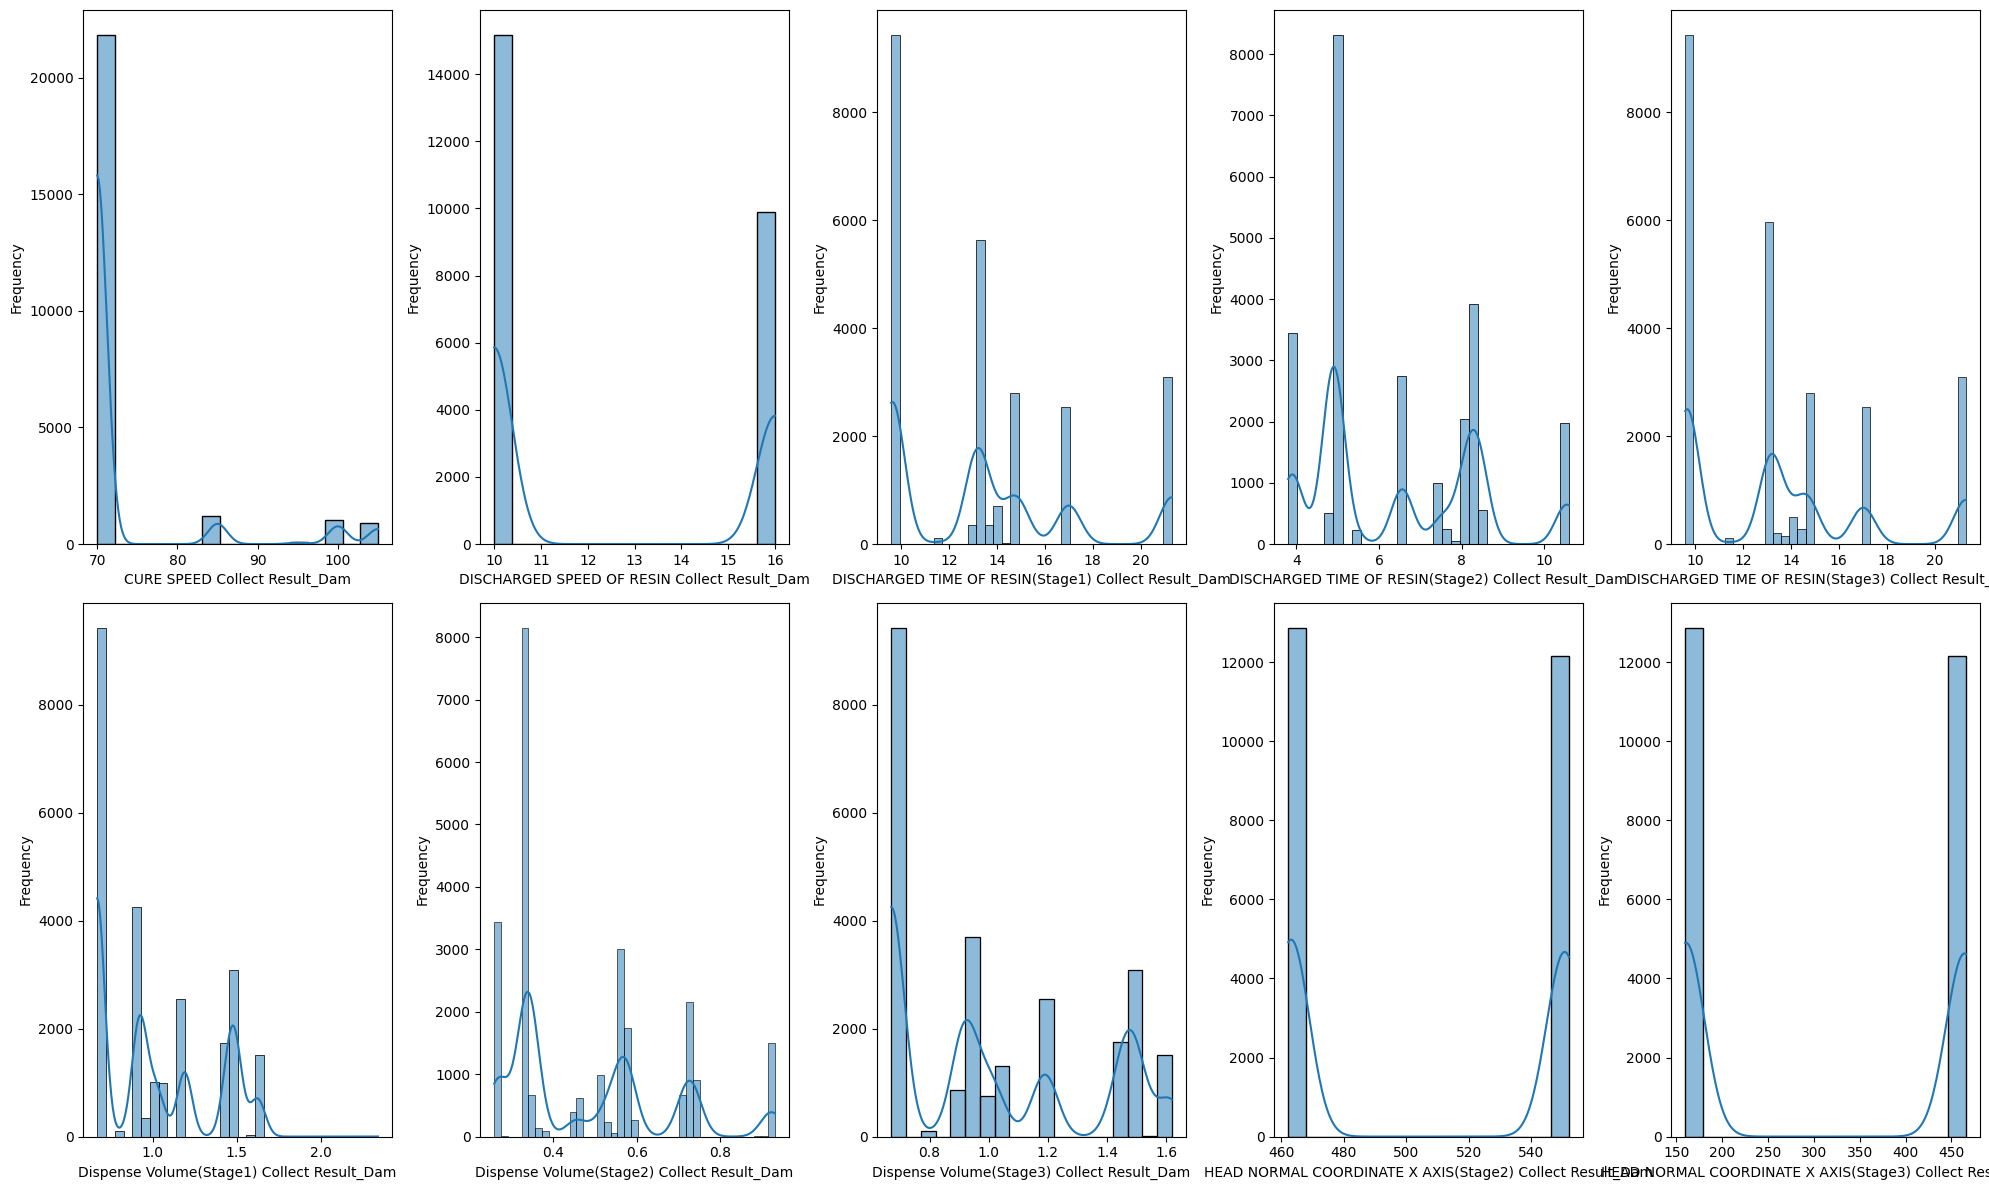

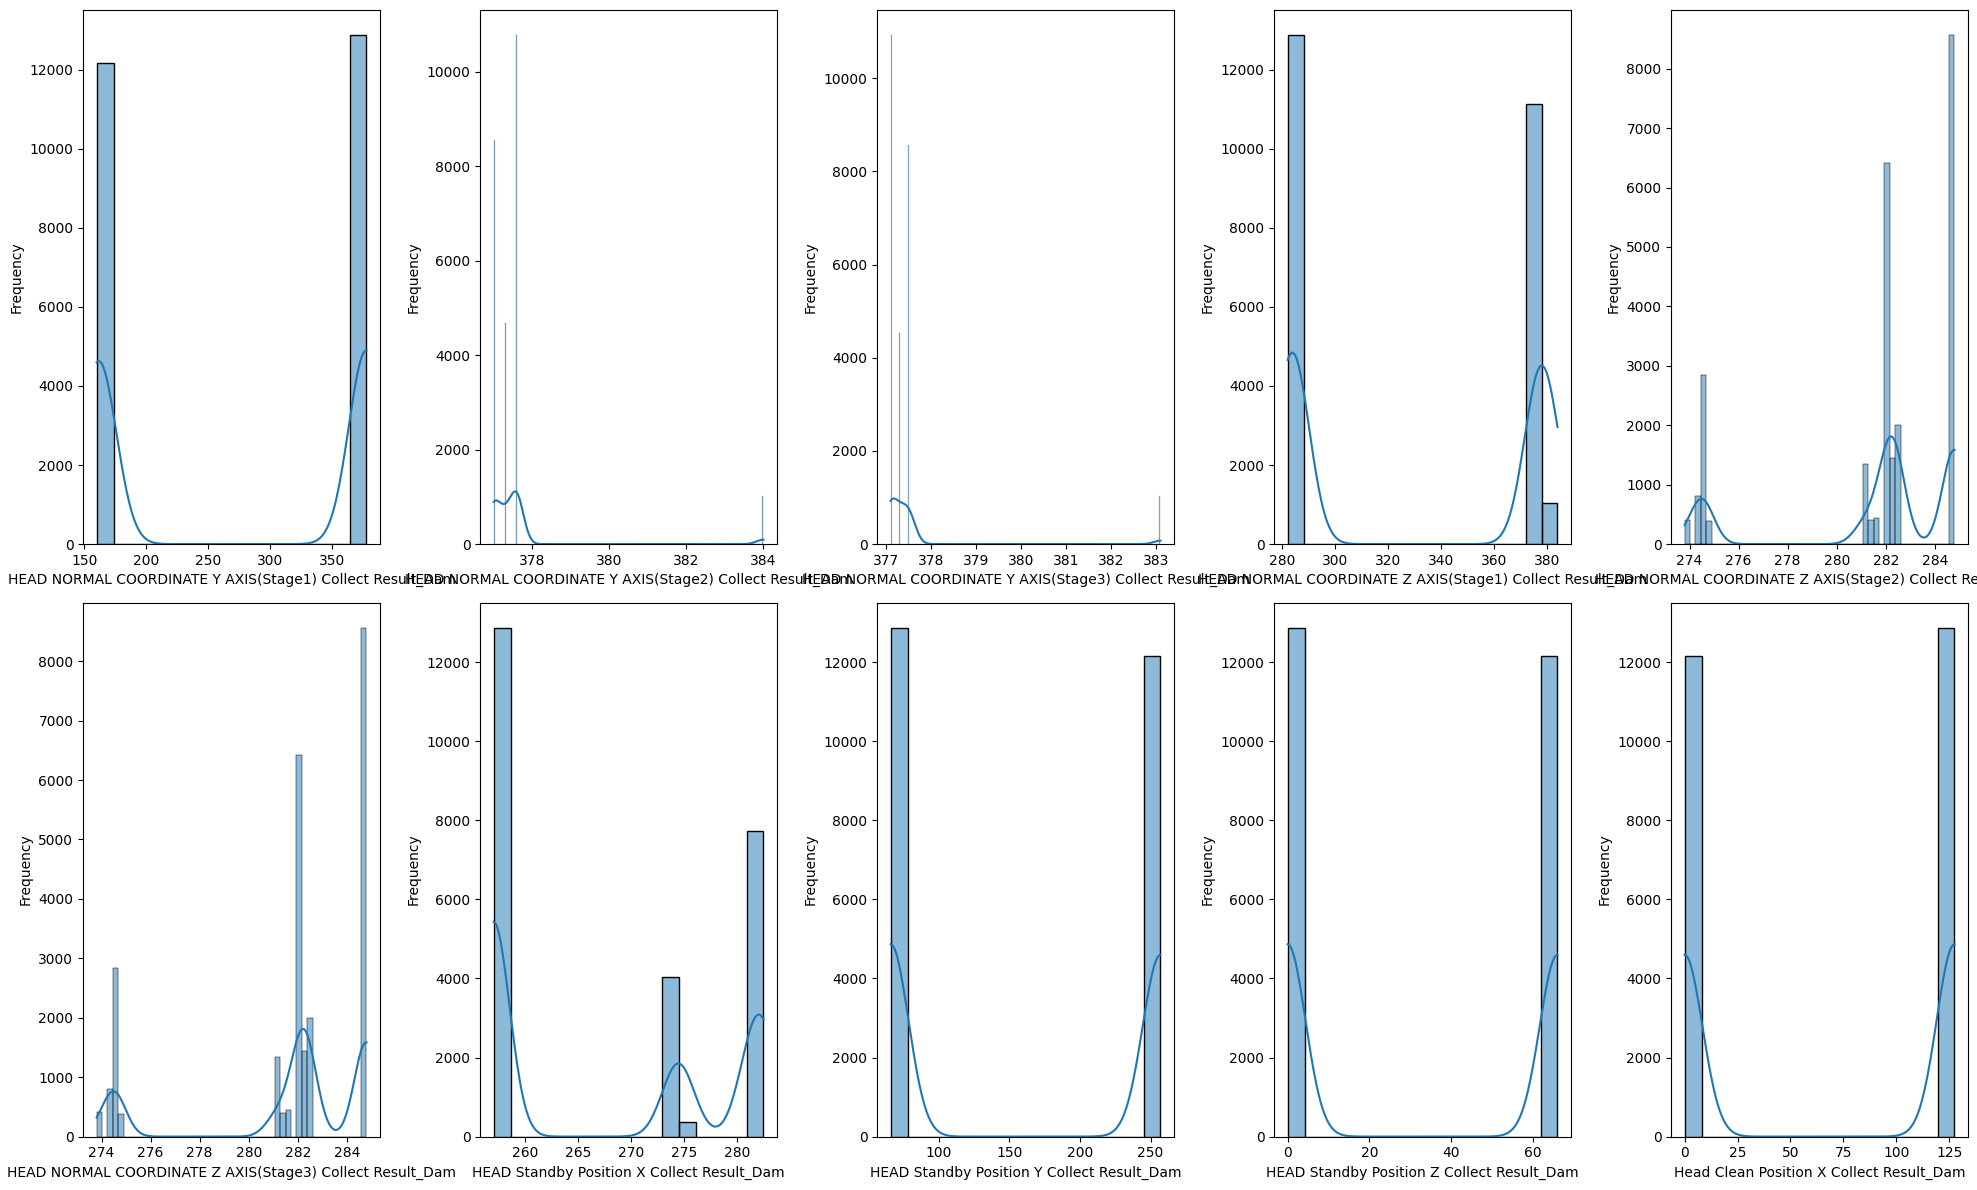

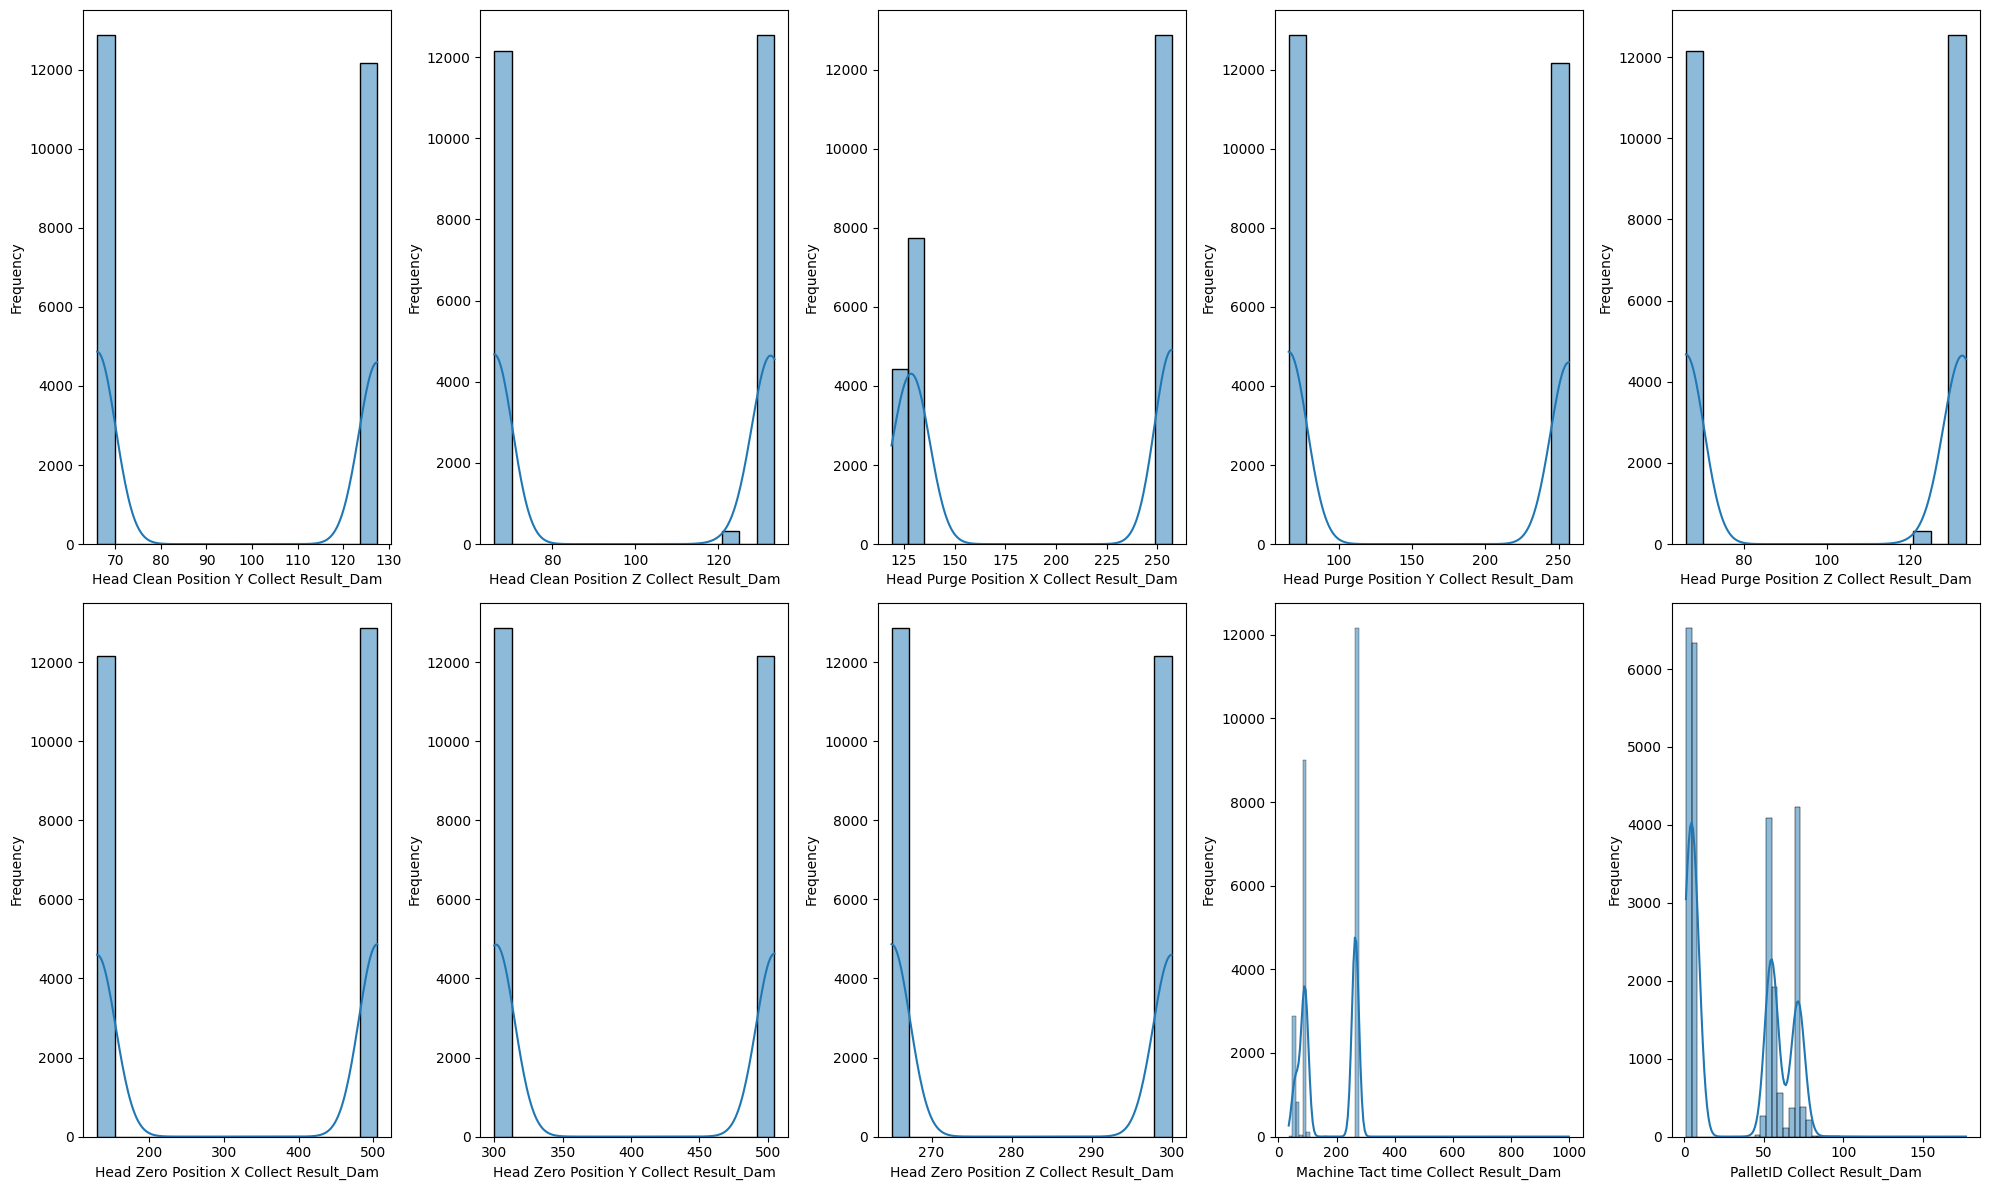

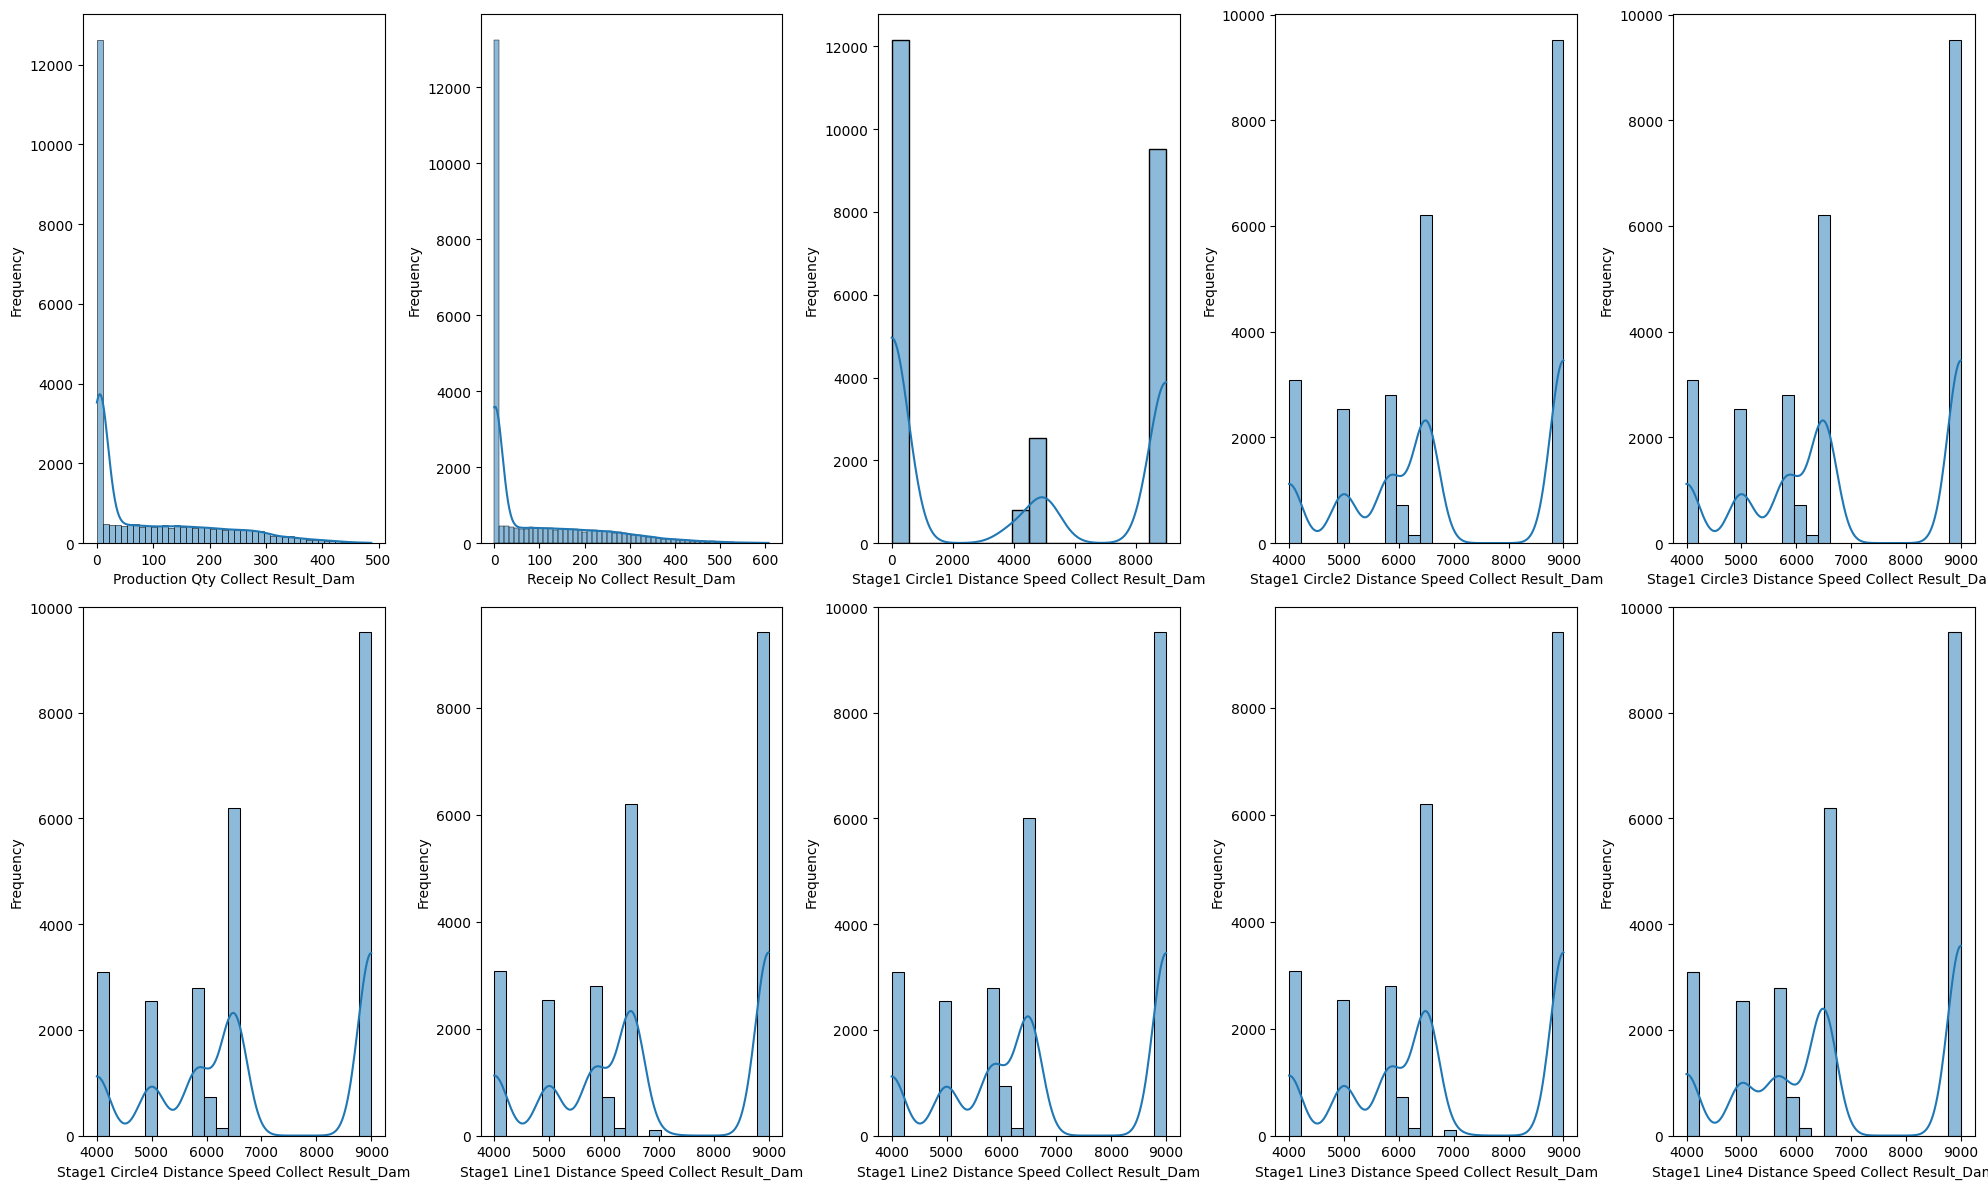

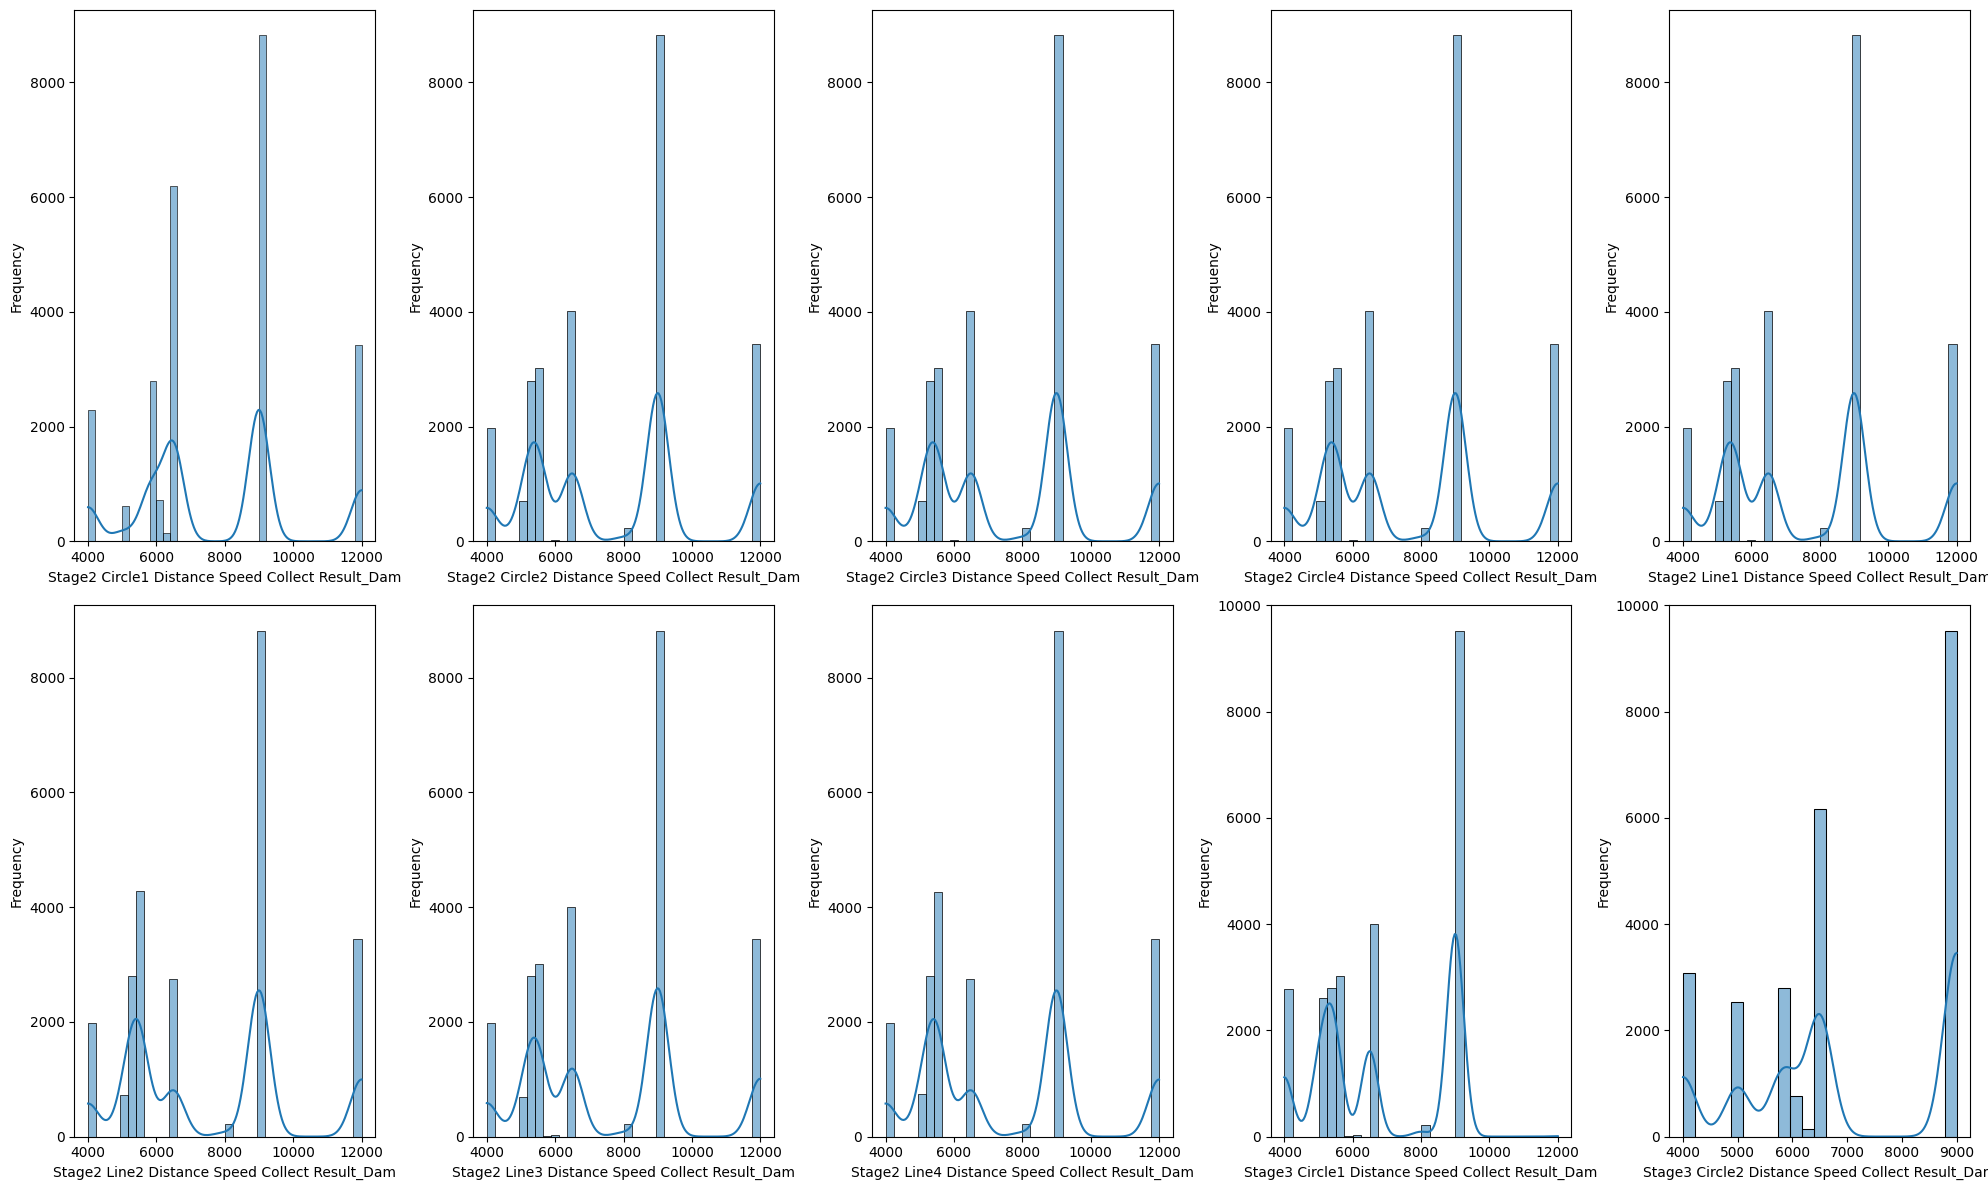

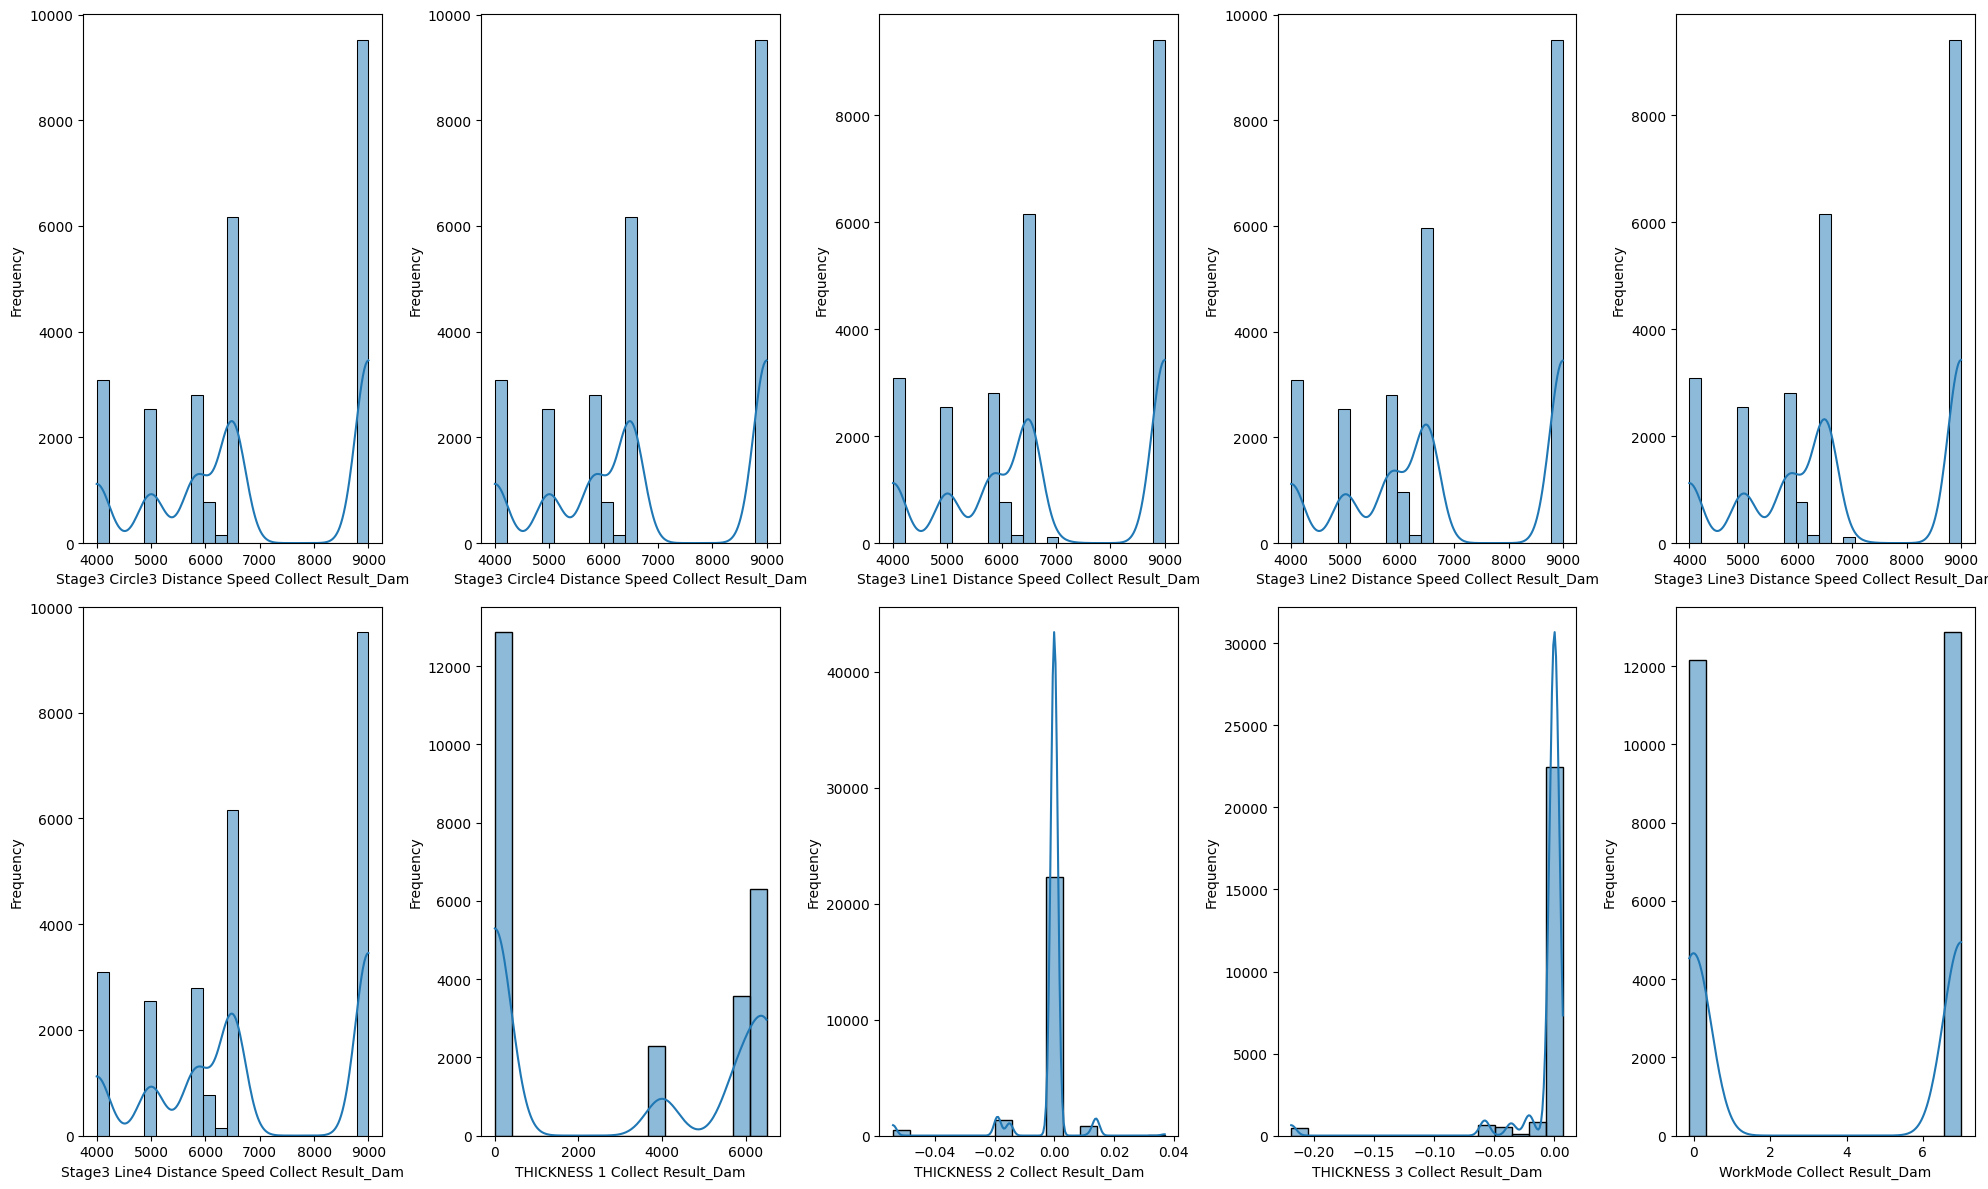

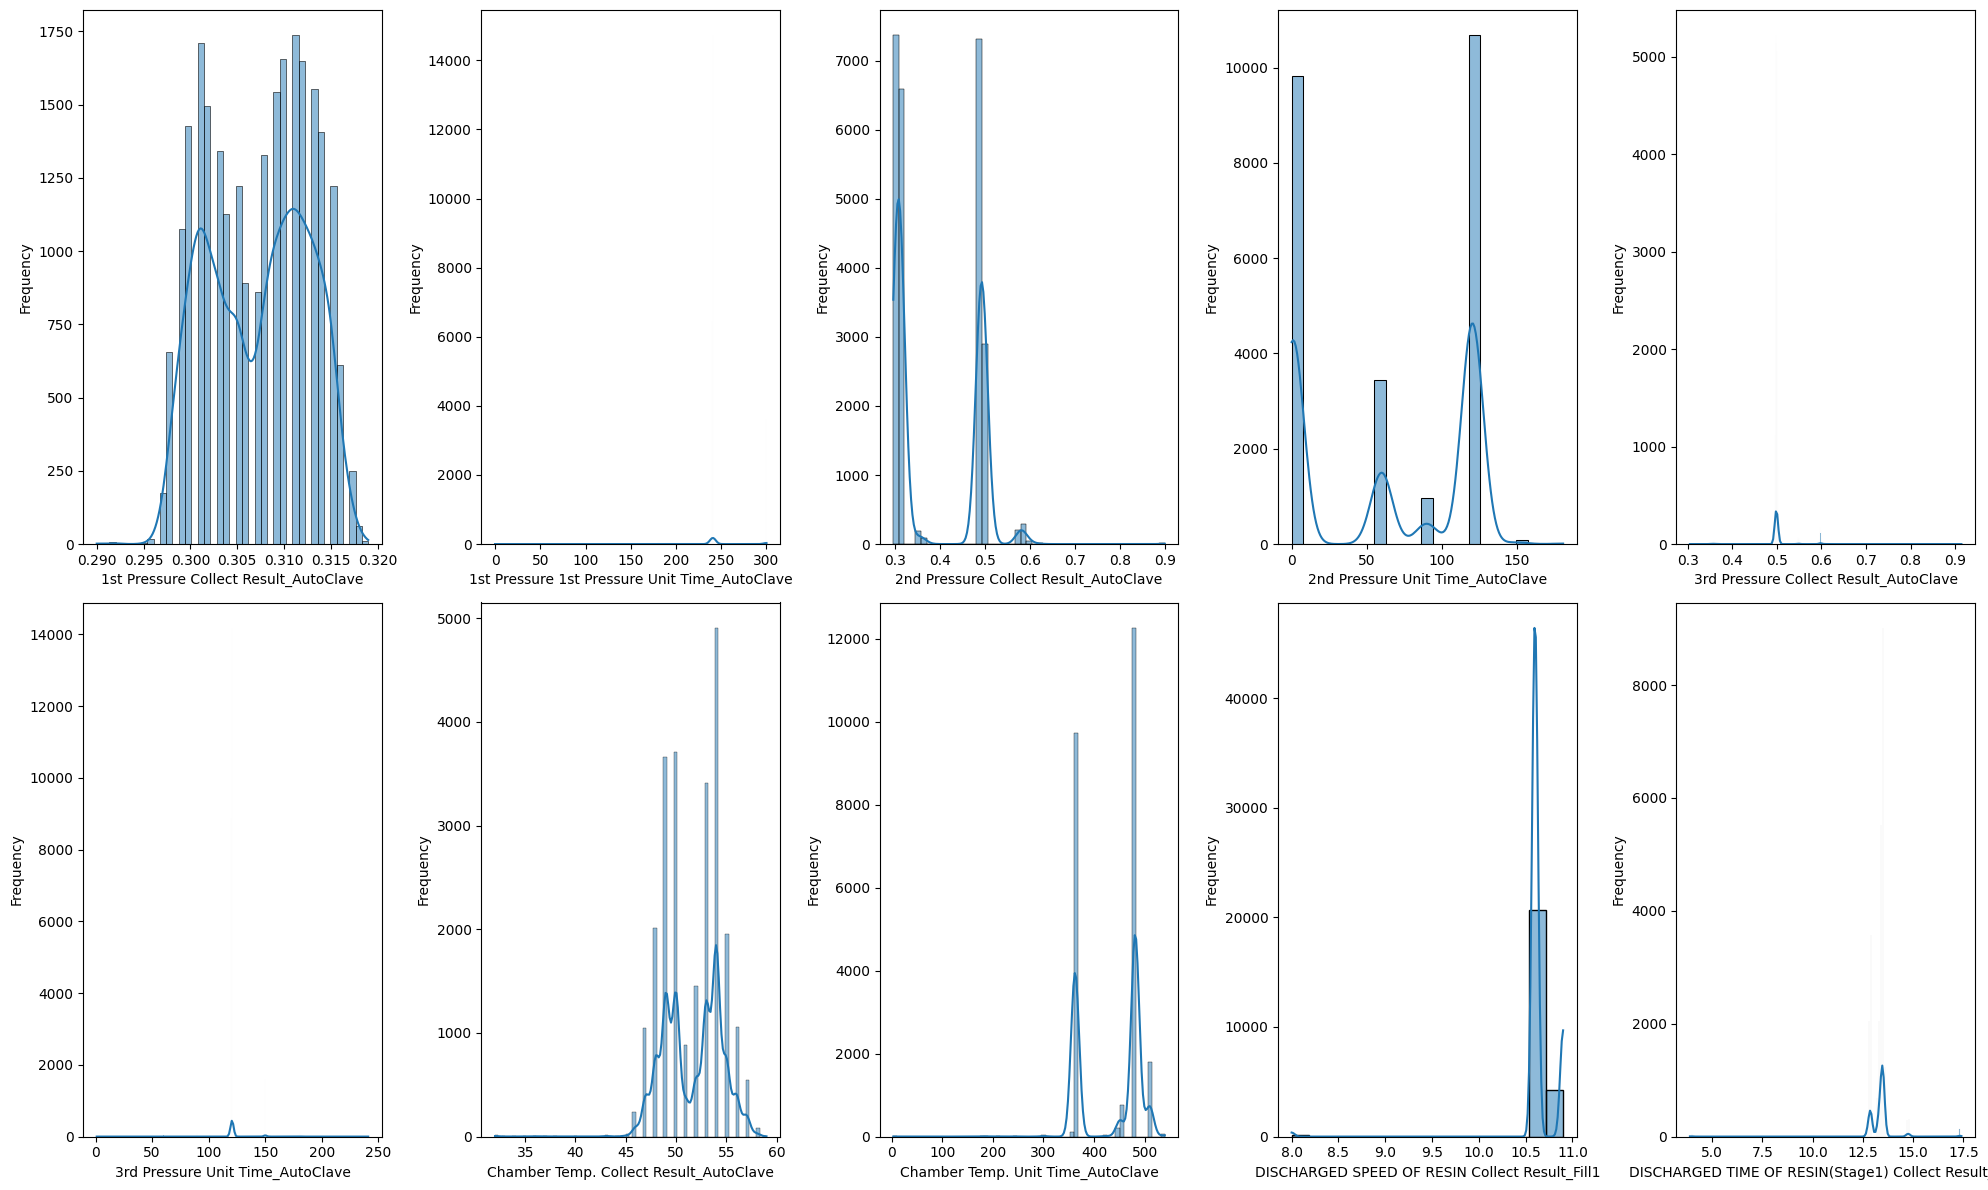

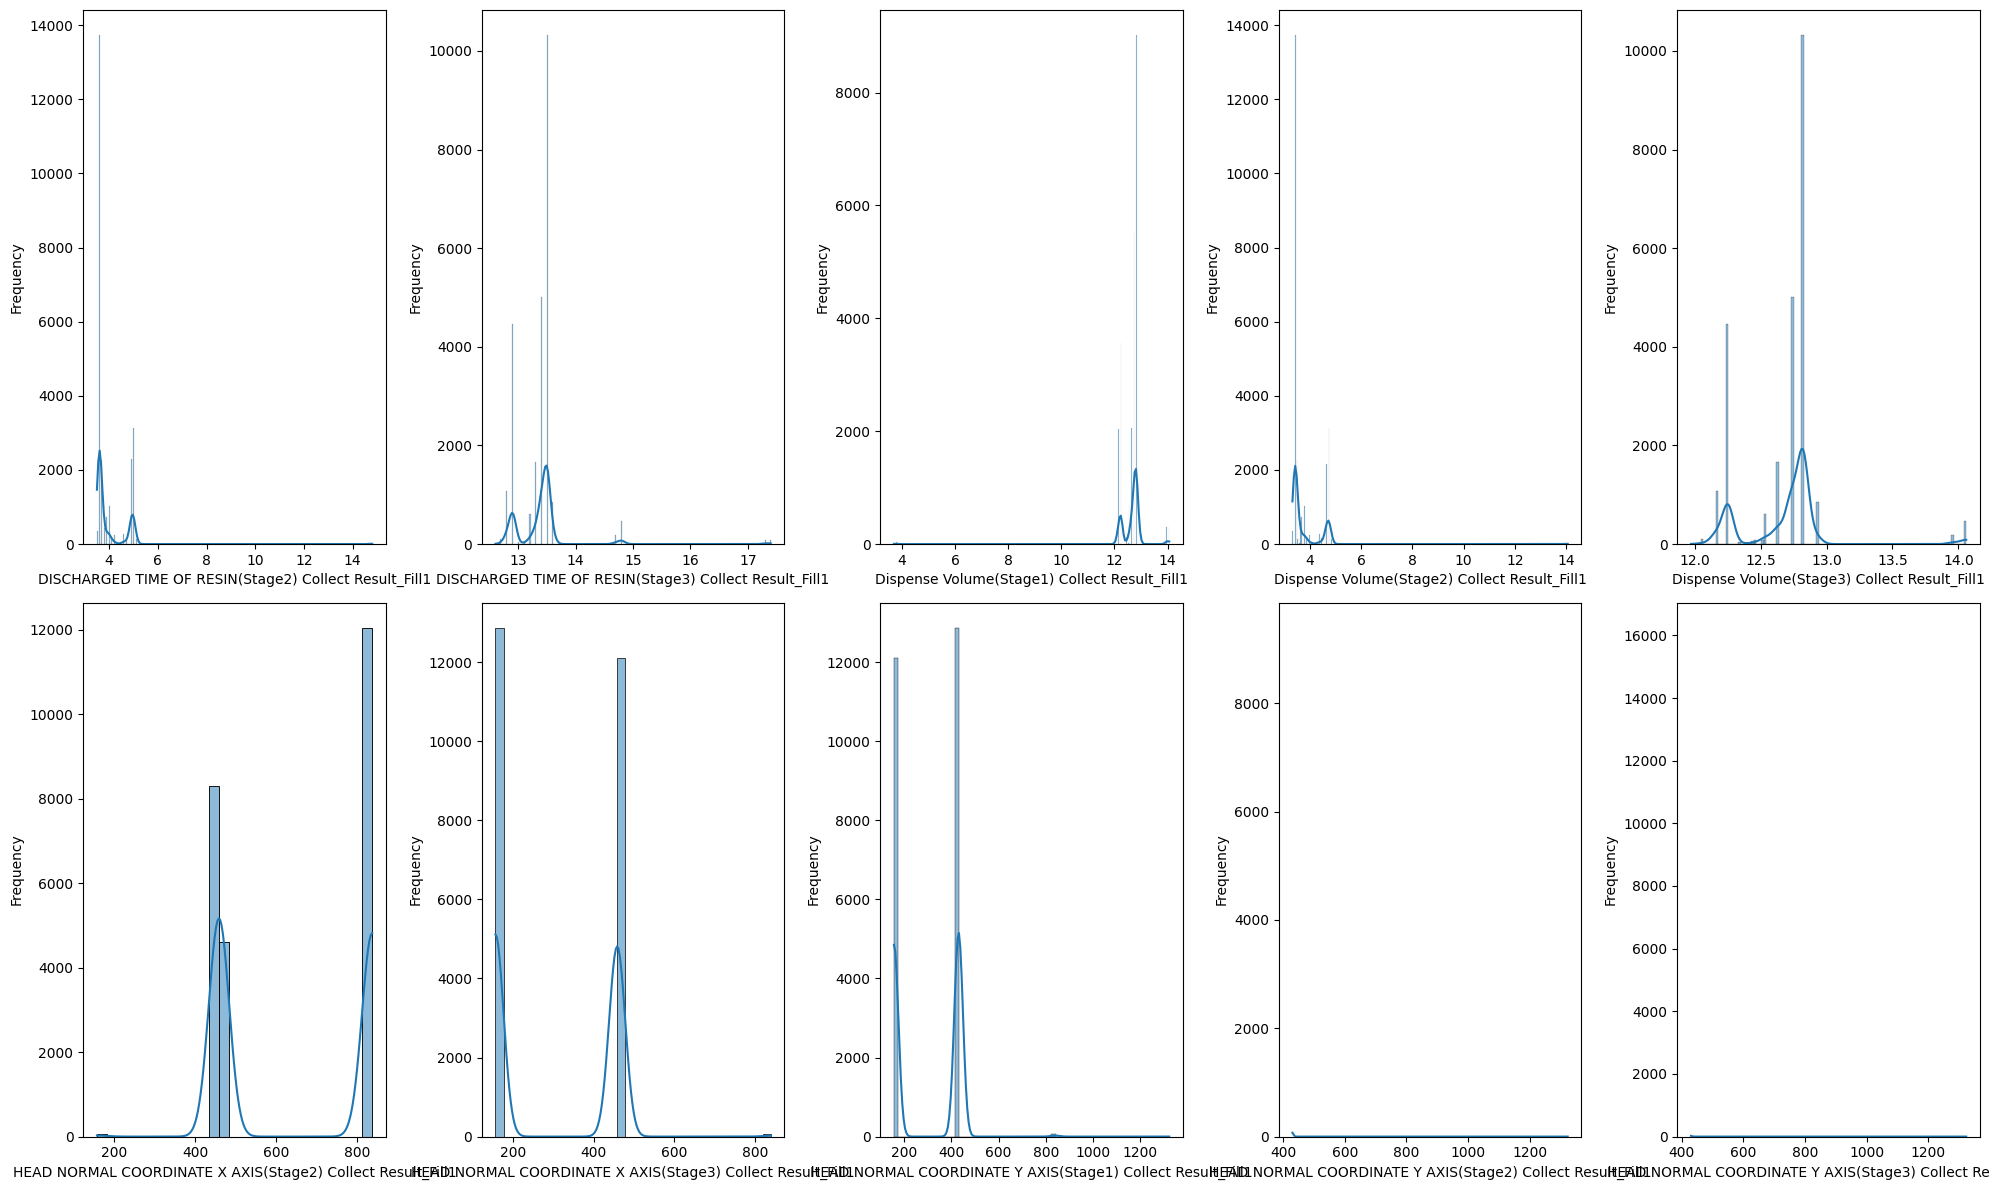

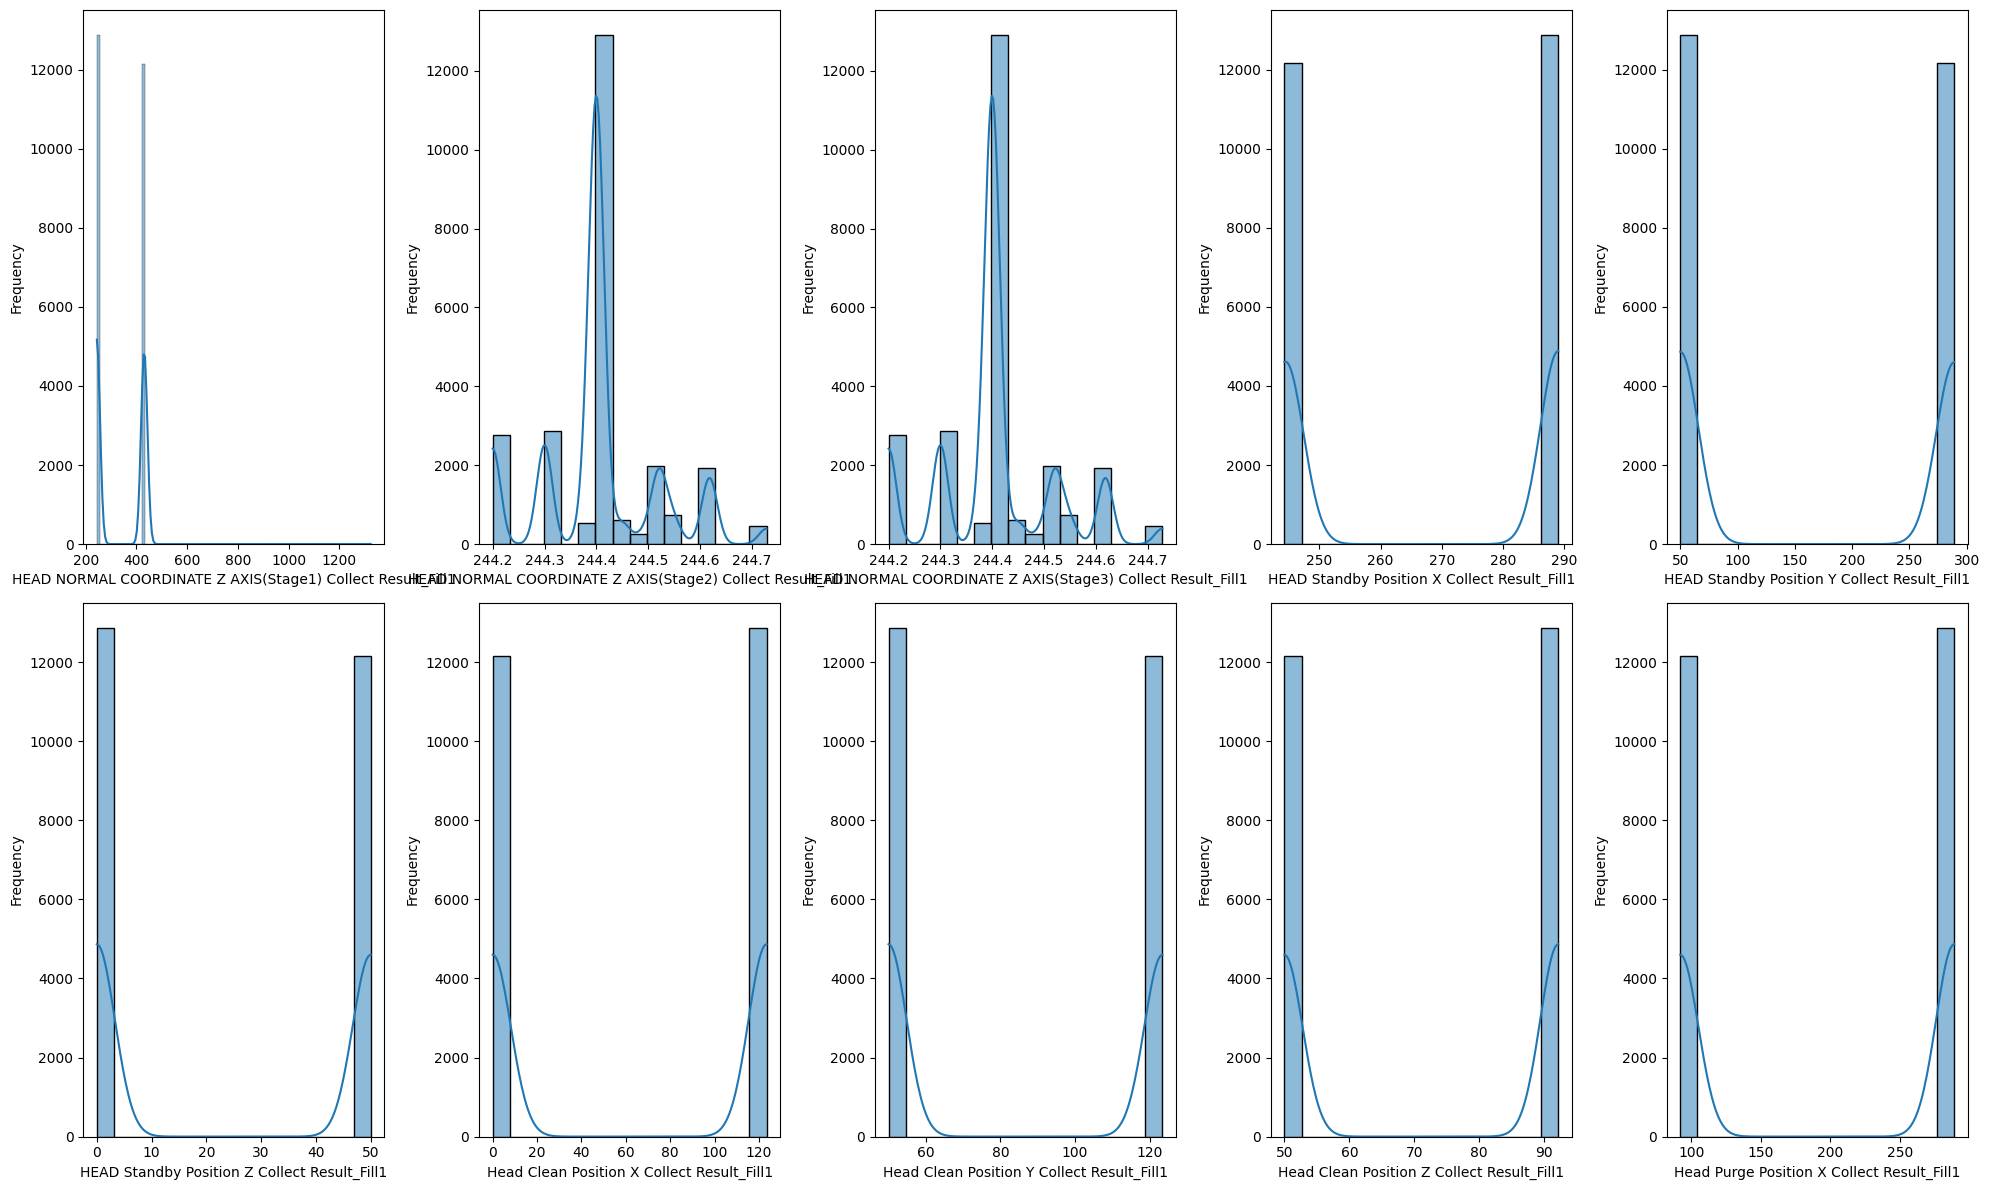

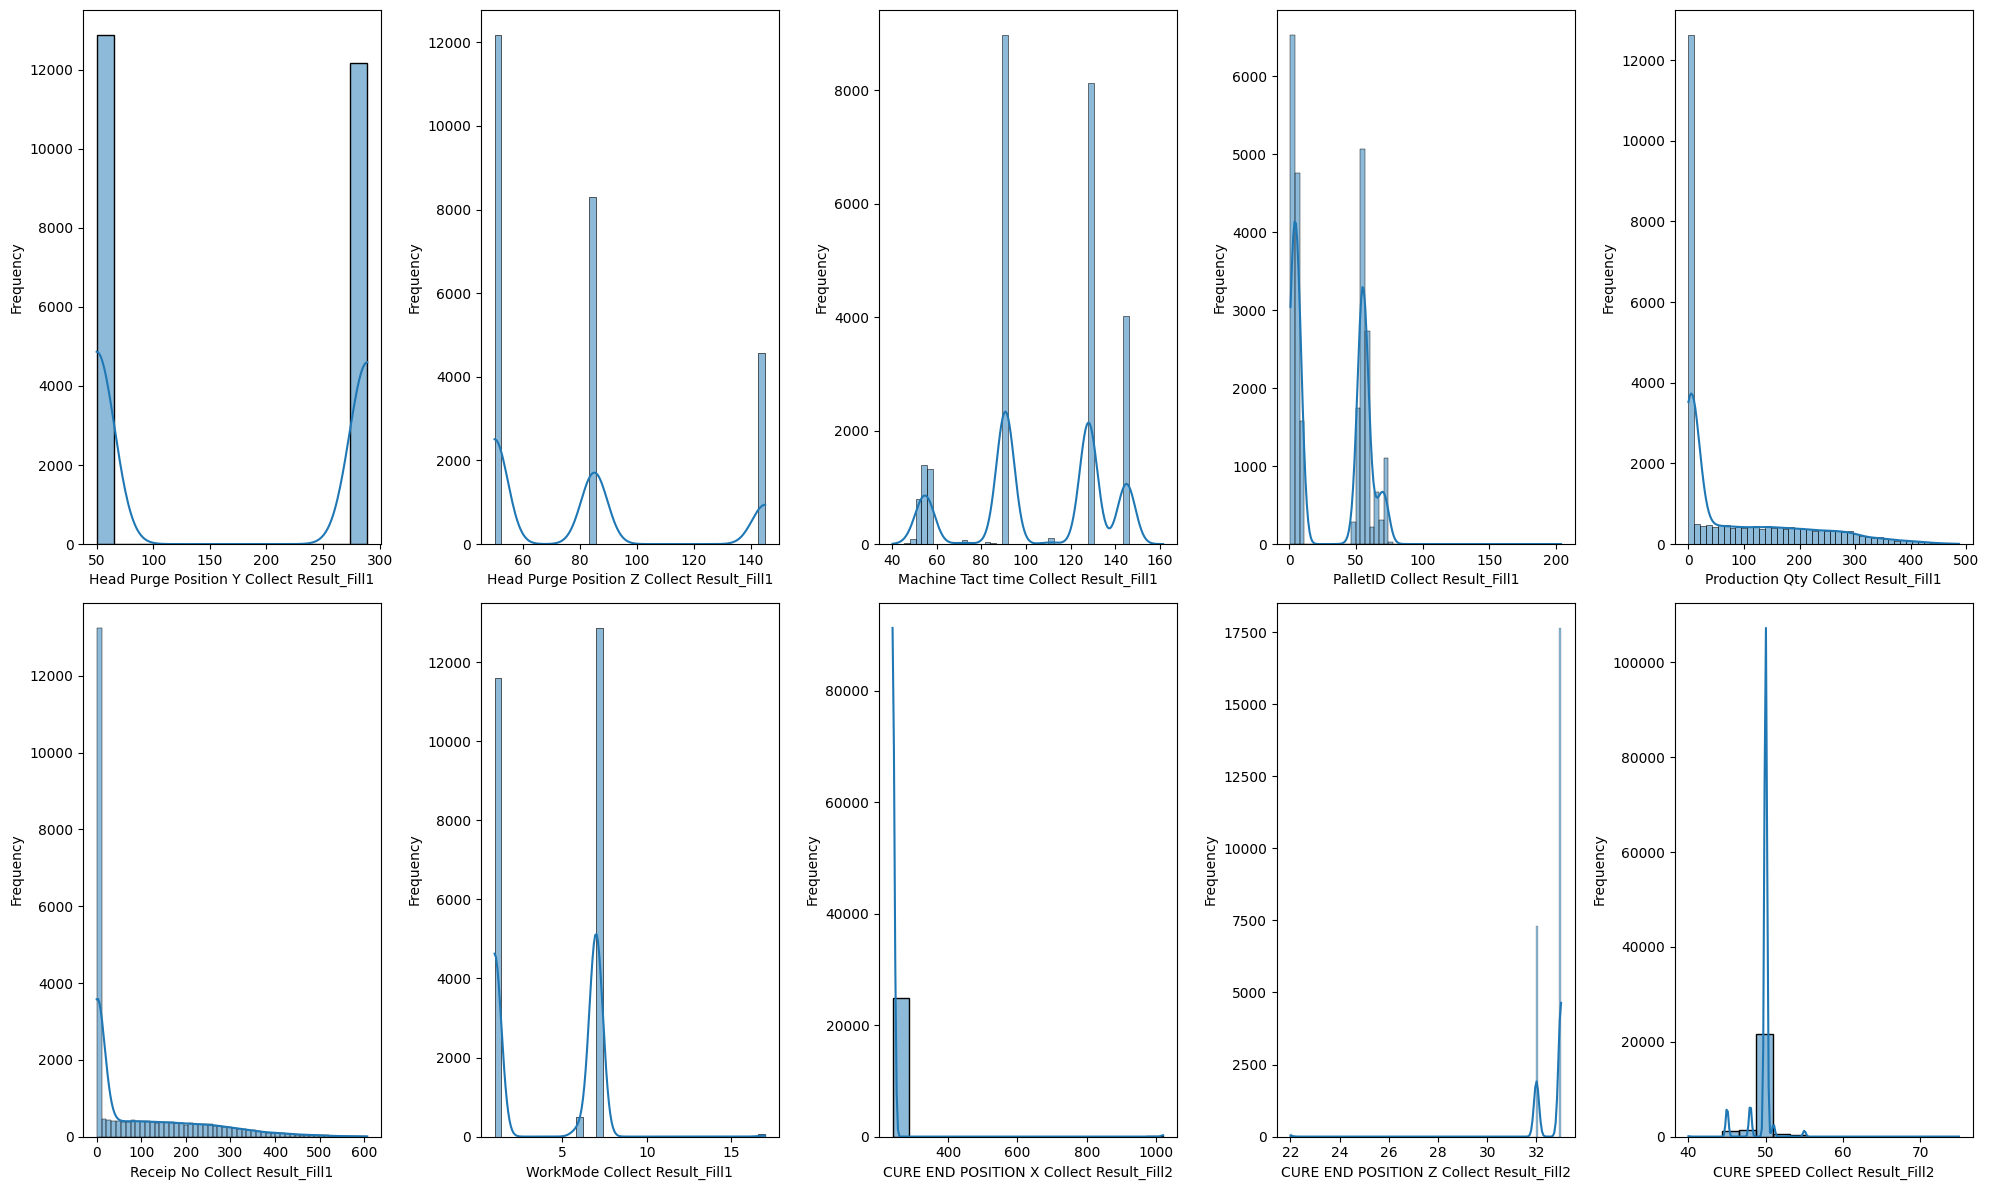

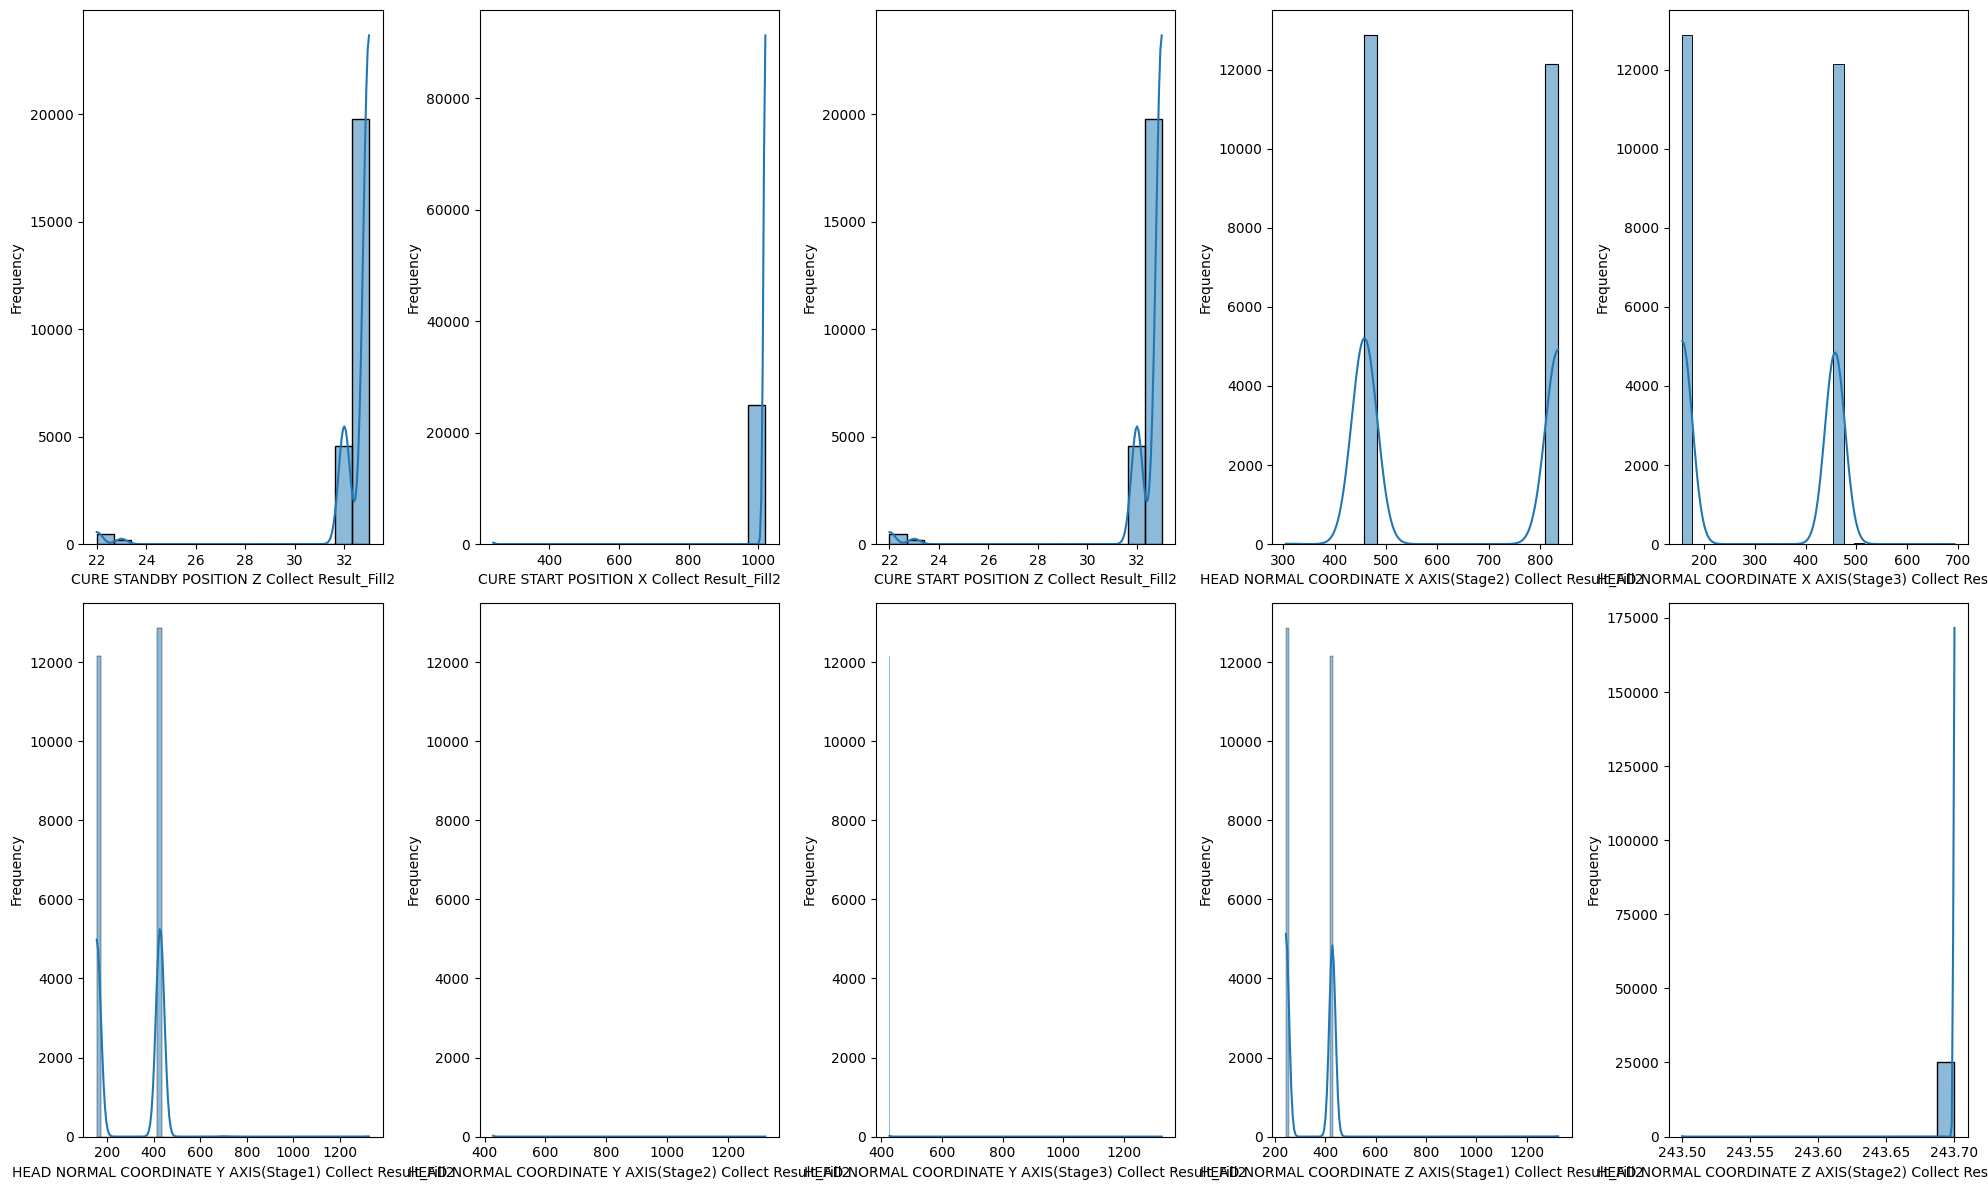

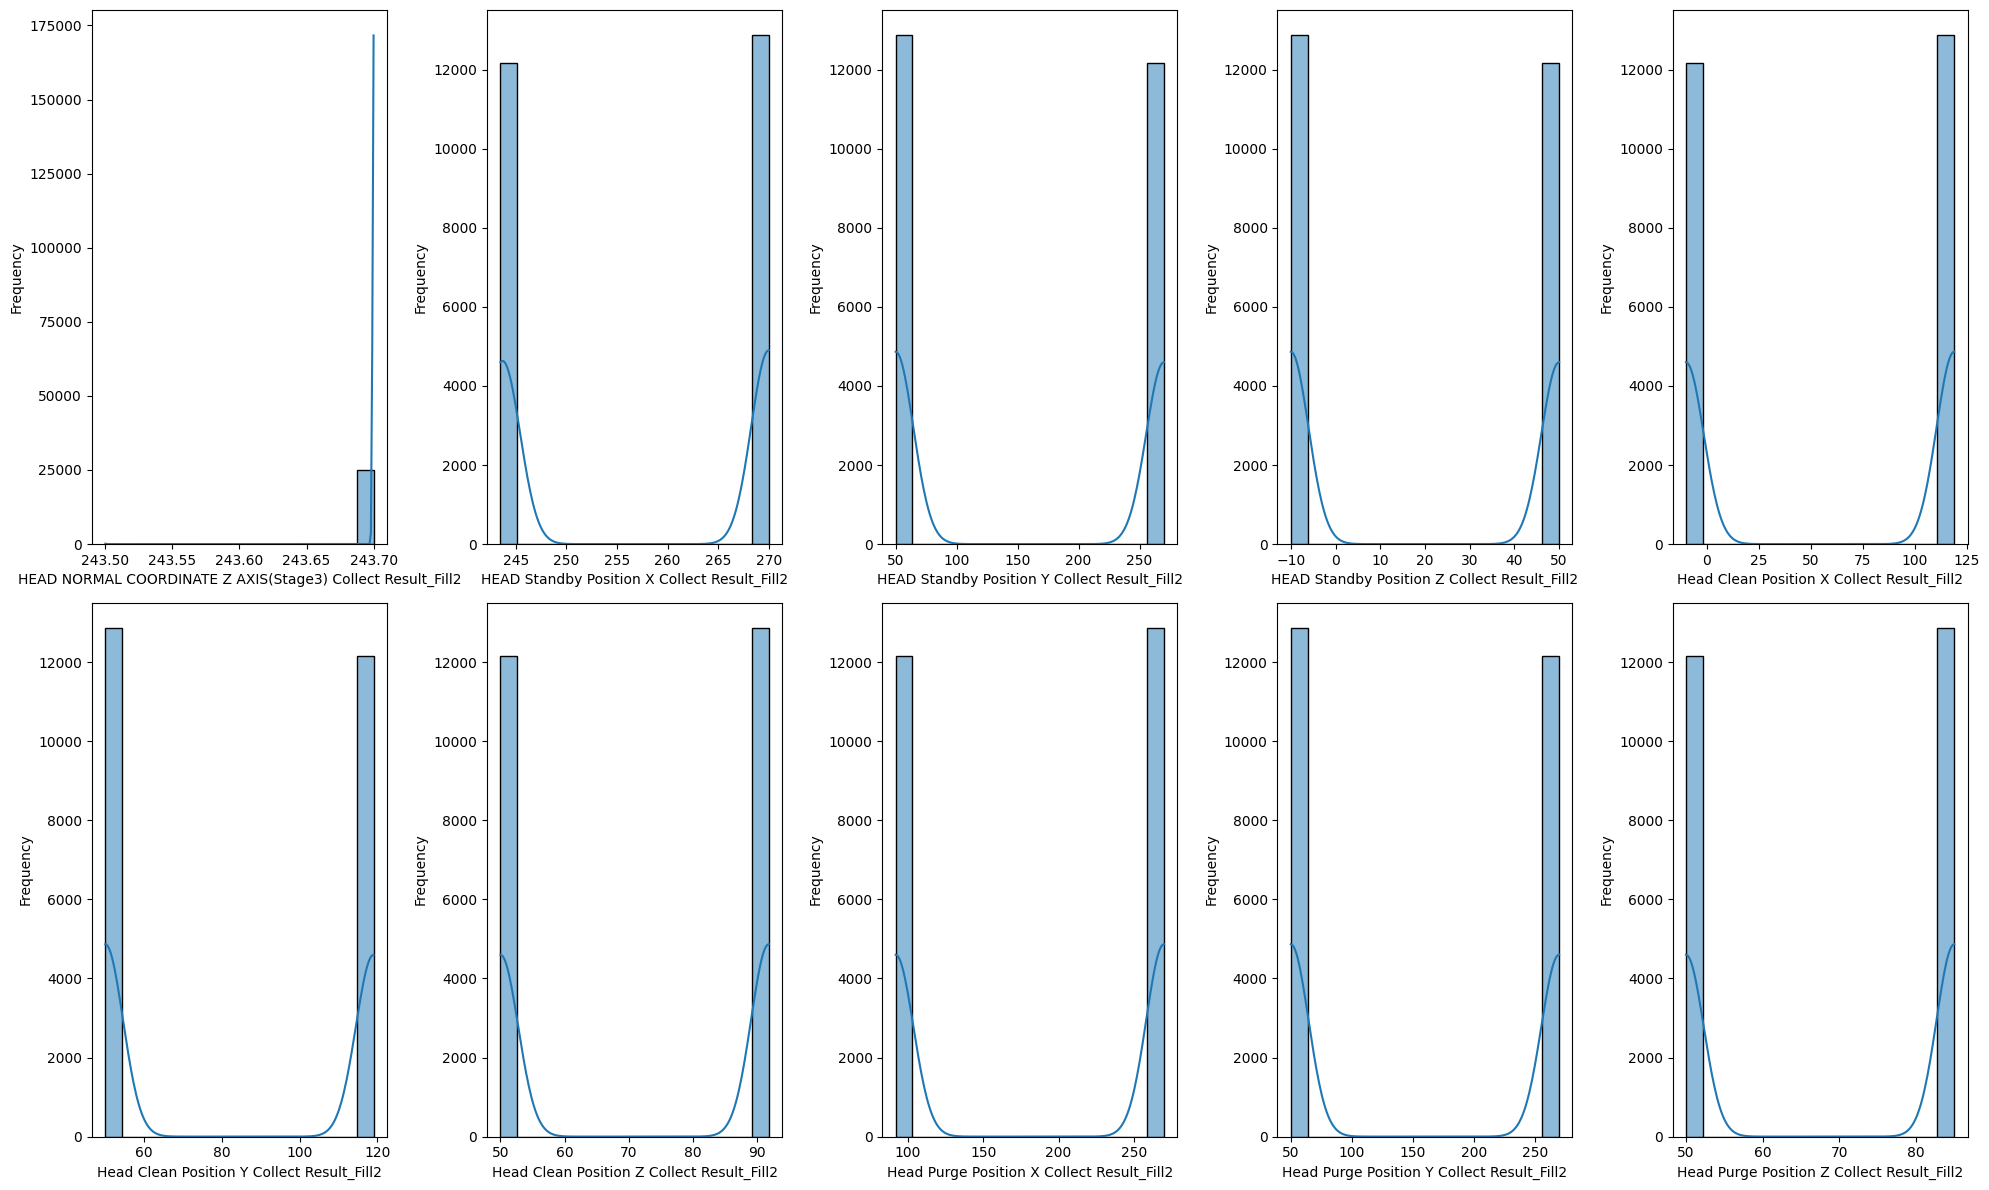

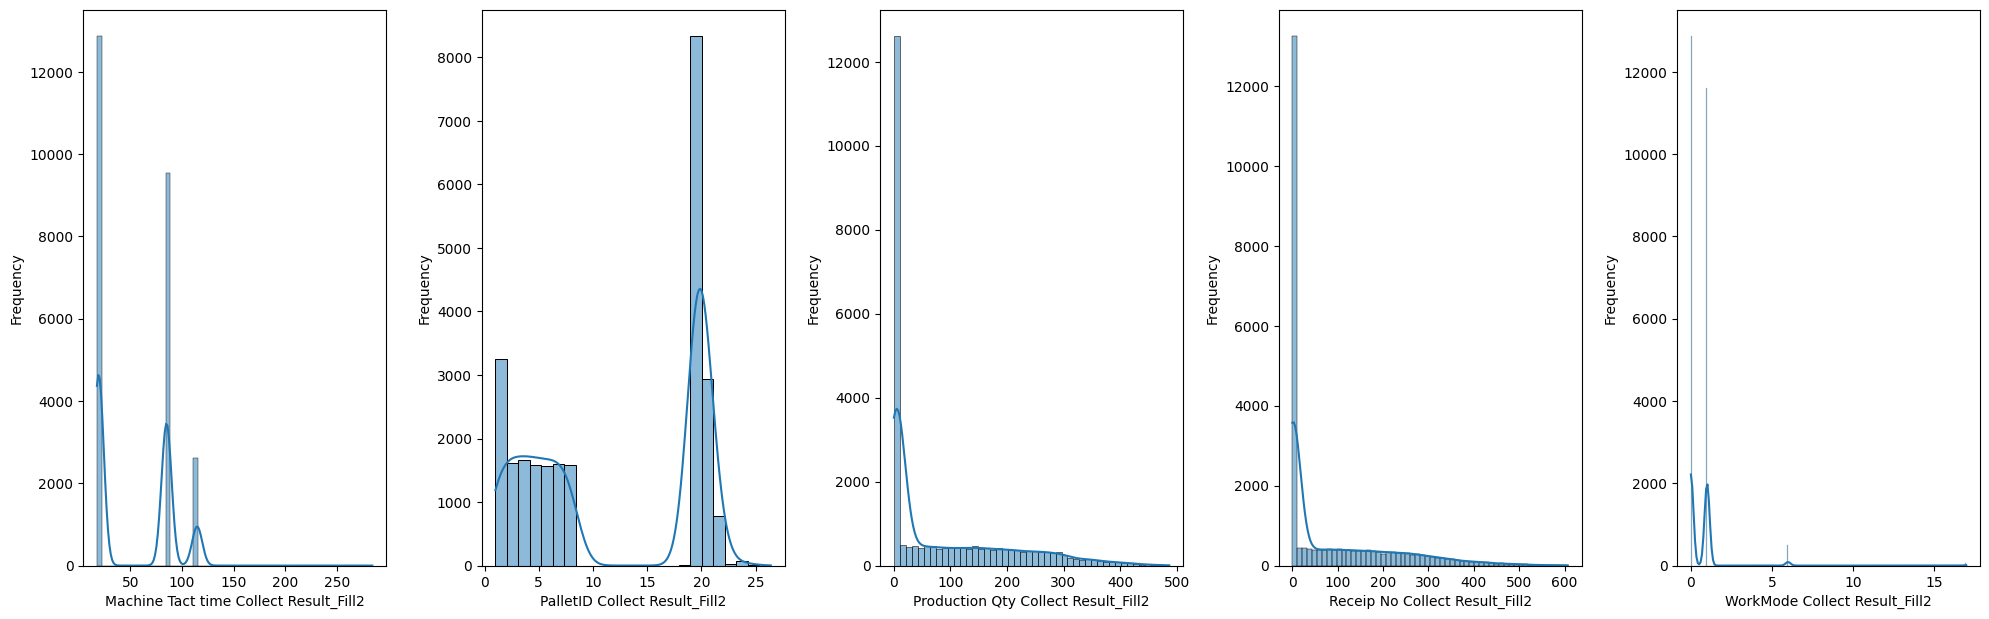

In [27]:
plot_distribution(train1_numeric, train1_numeric.columns)

In [28]:
few_unique_columns_1 = [col for col in train1.columns if train1[col].nunique() < 5]
len(few_unique_columns_1)

48

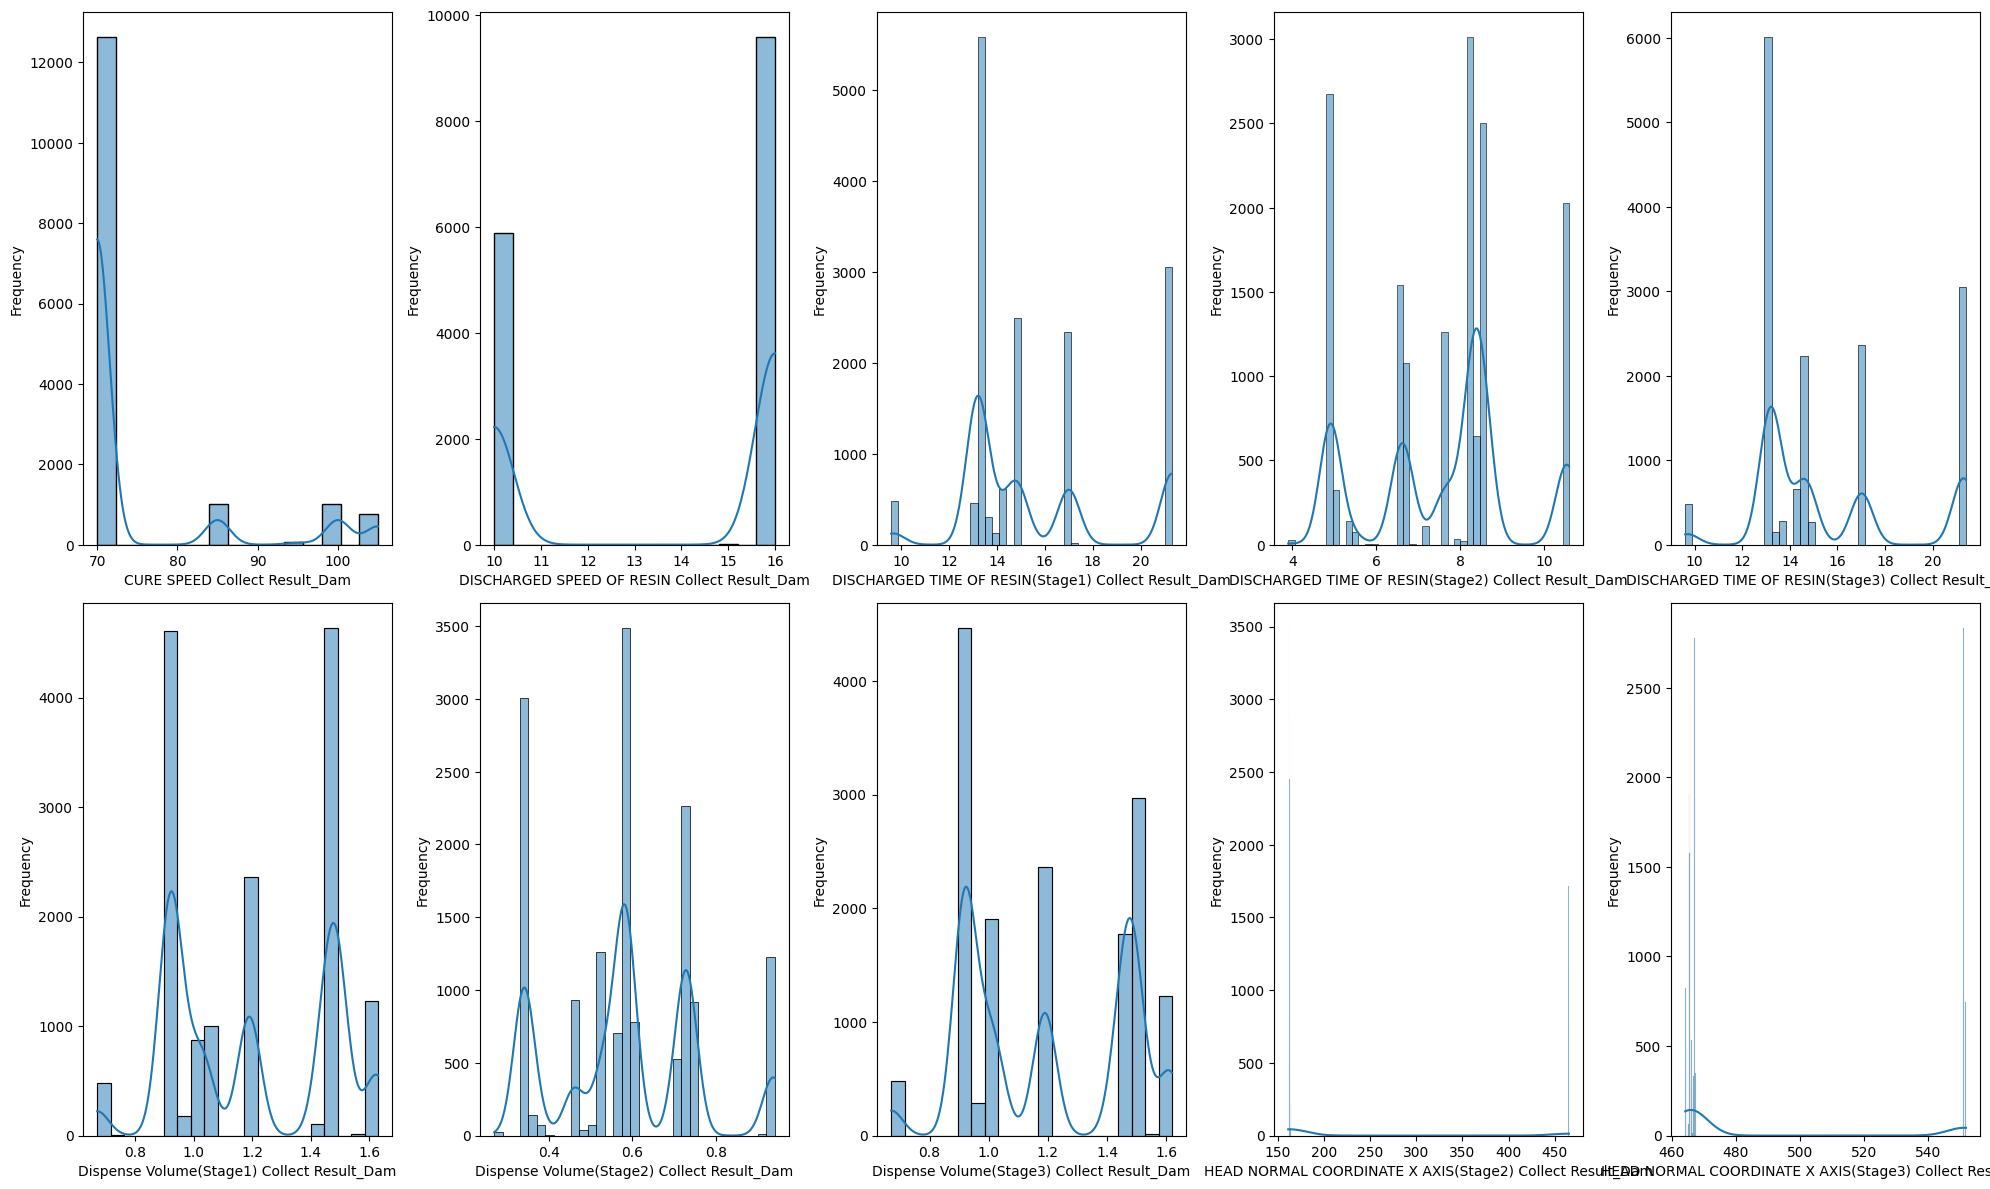

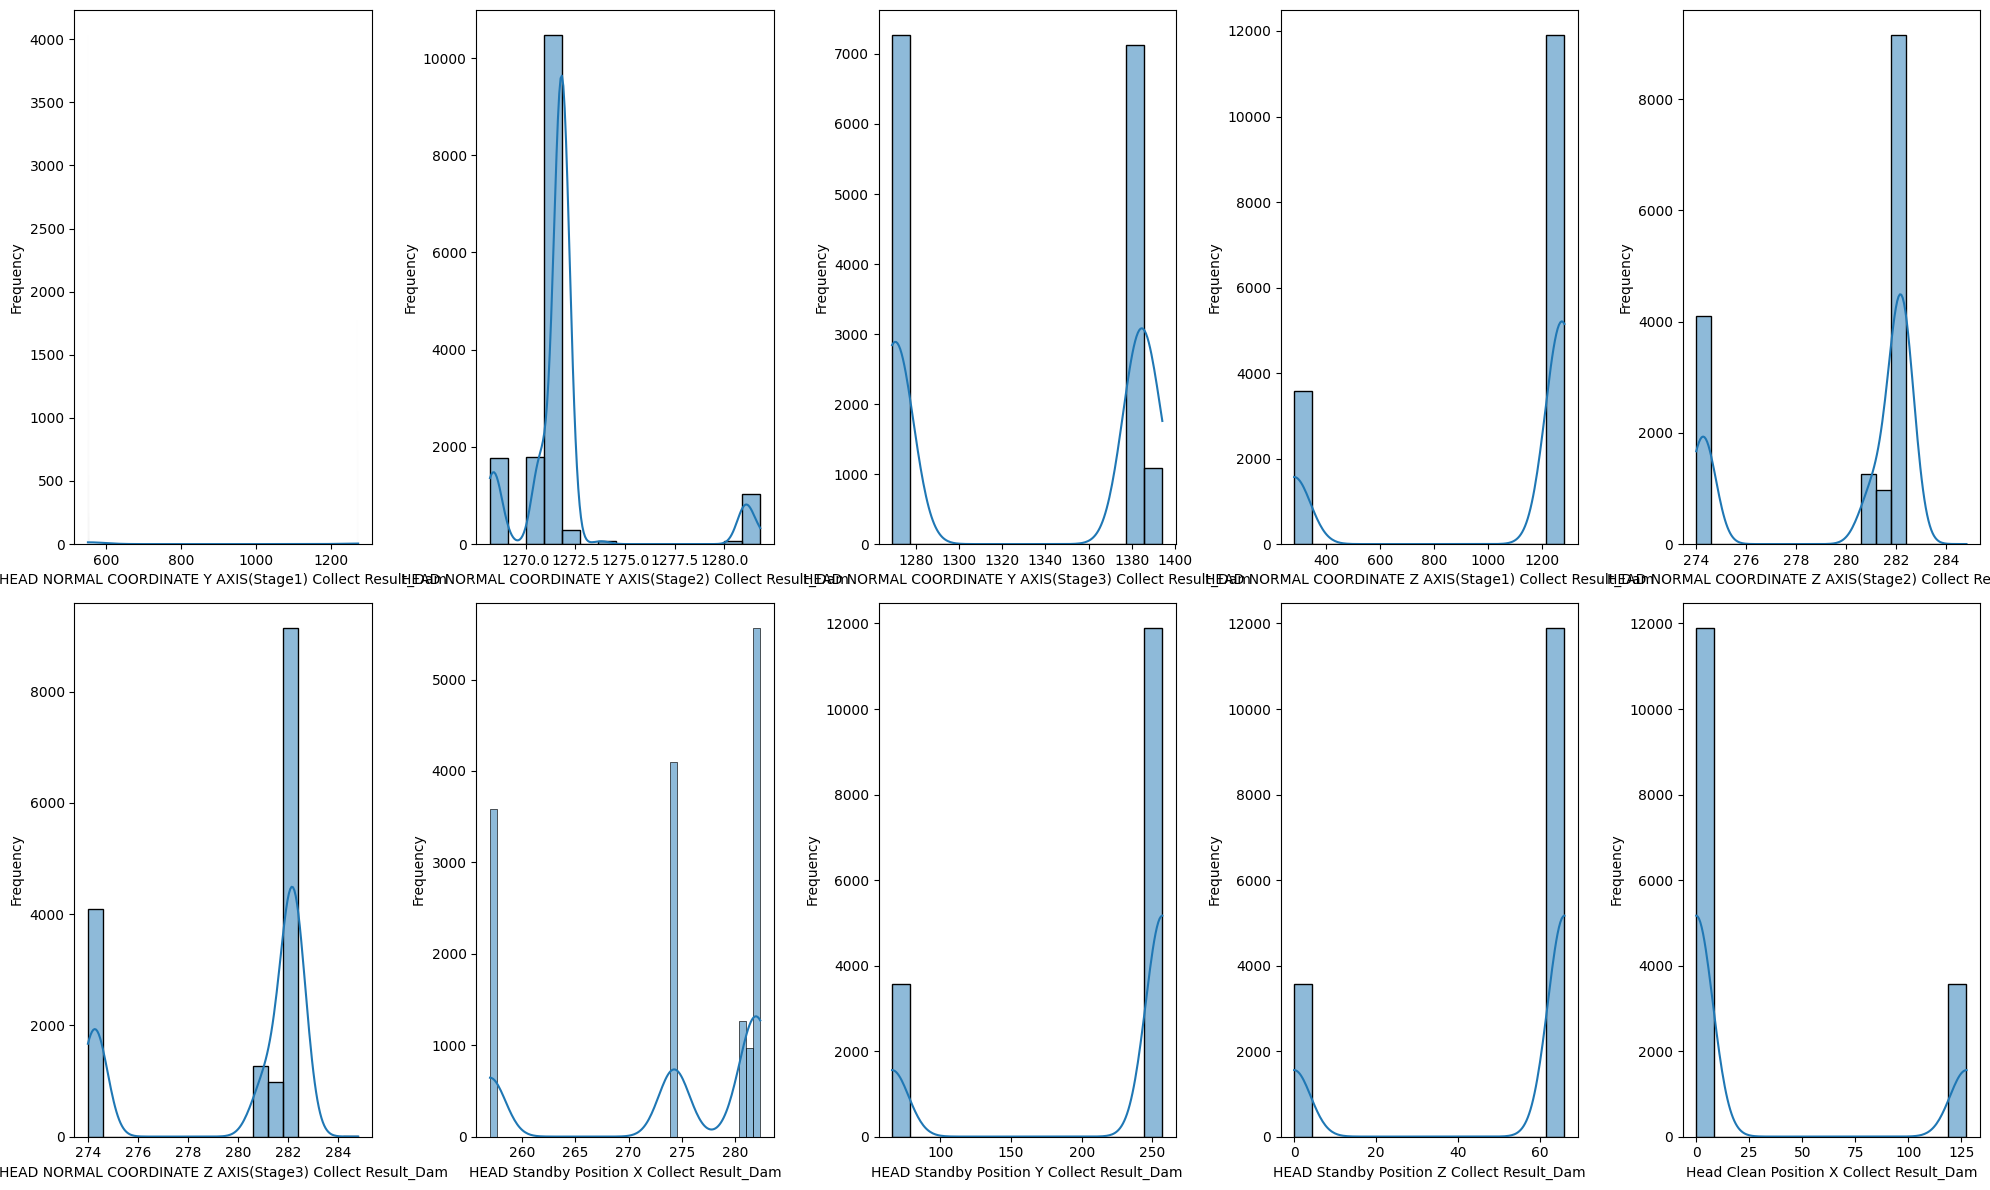

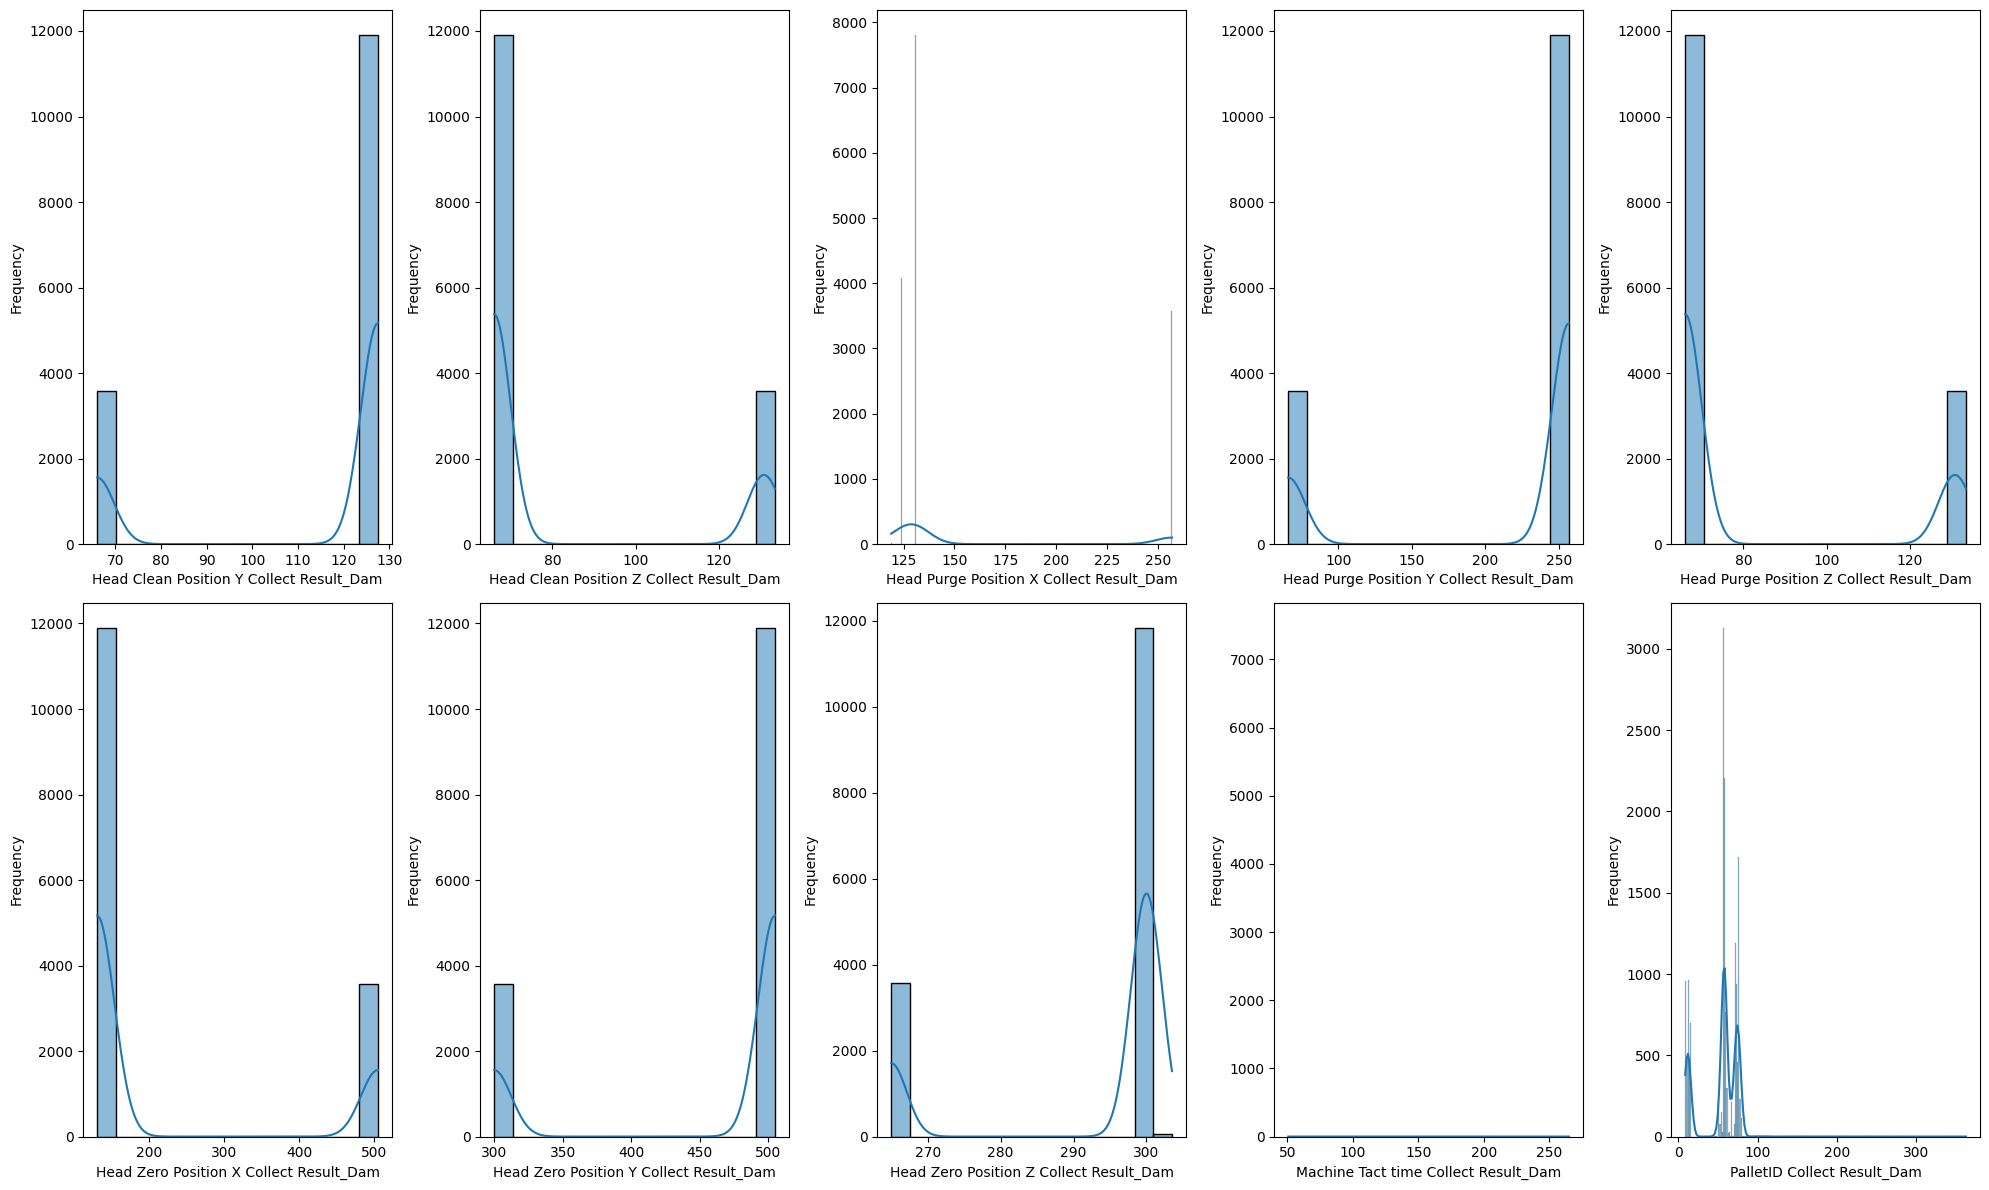

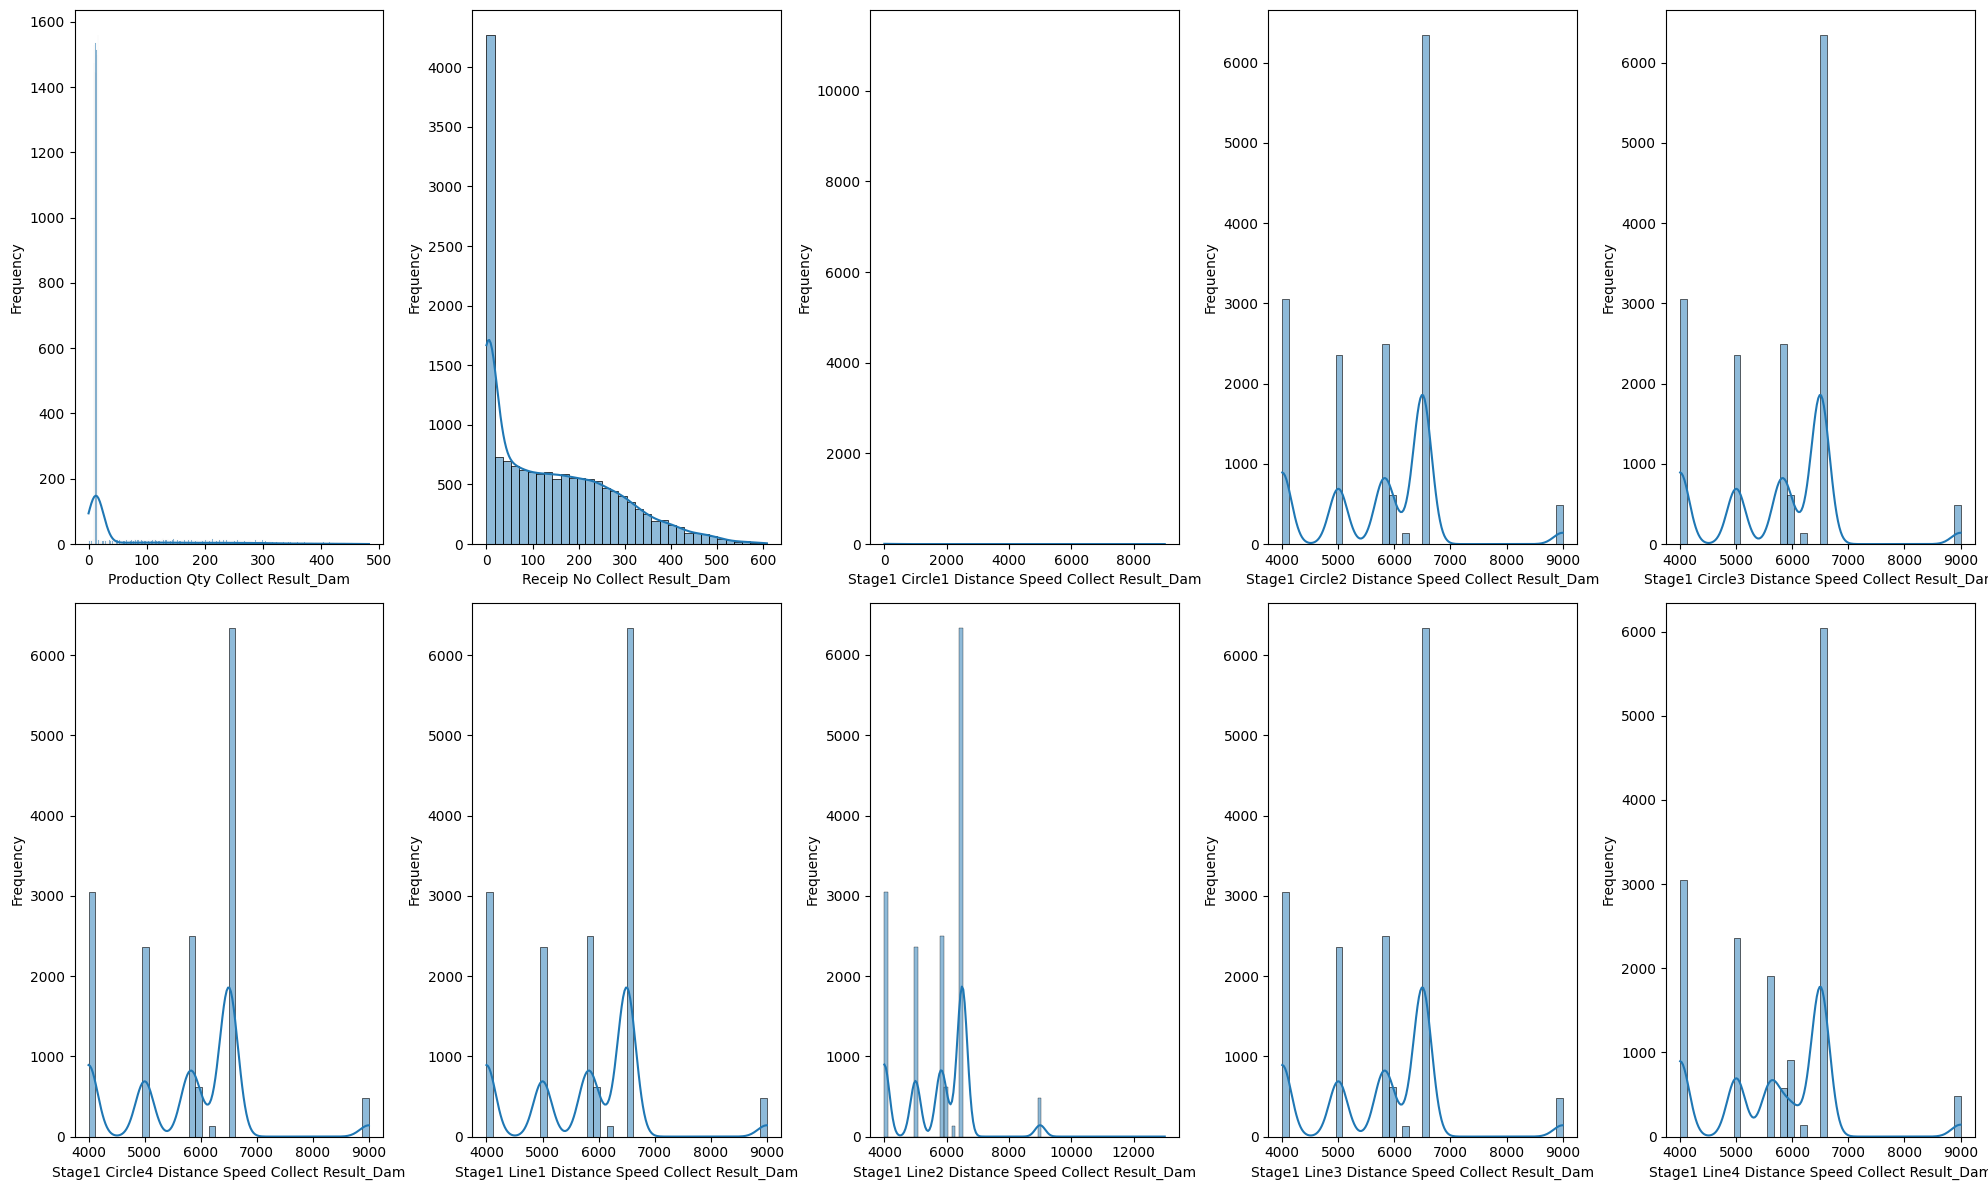

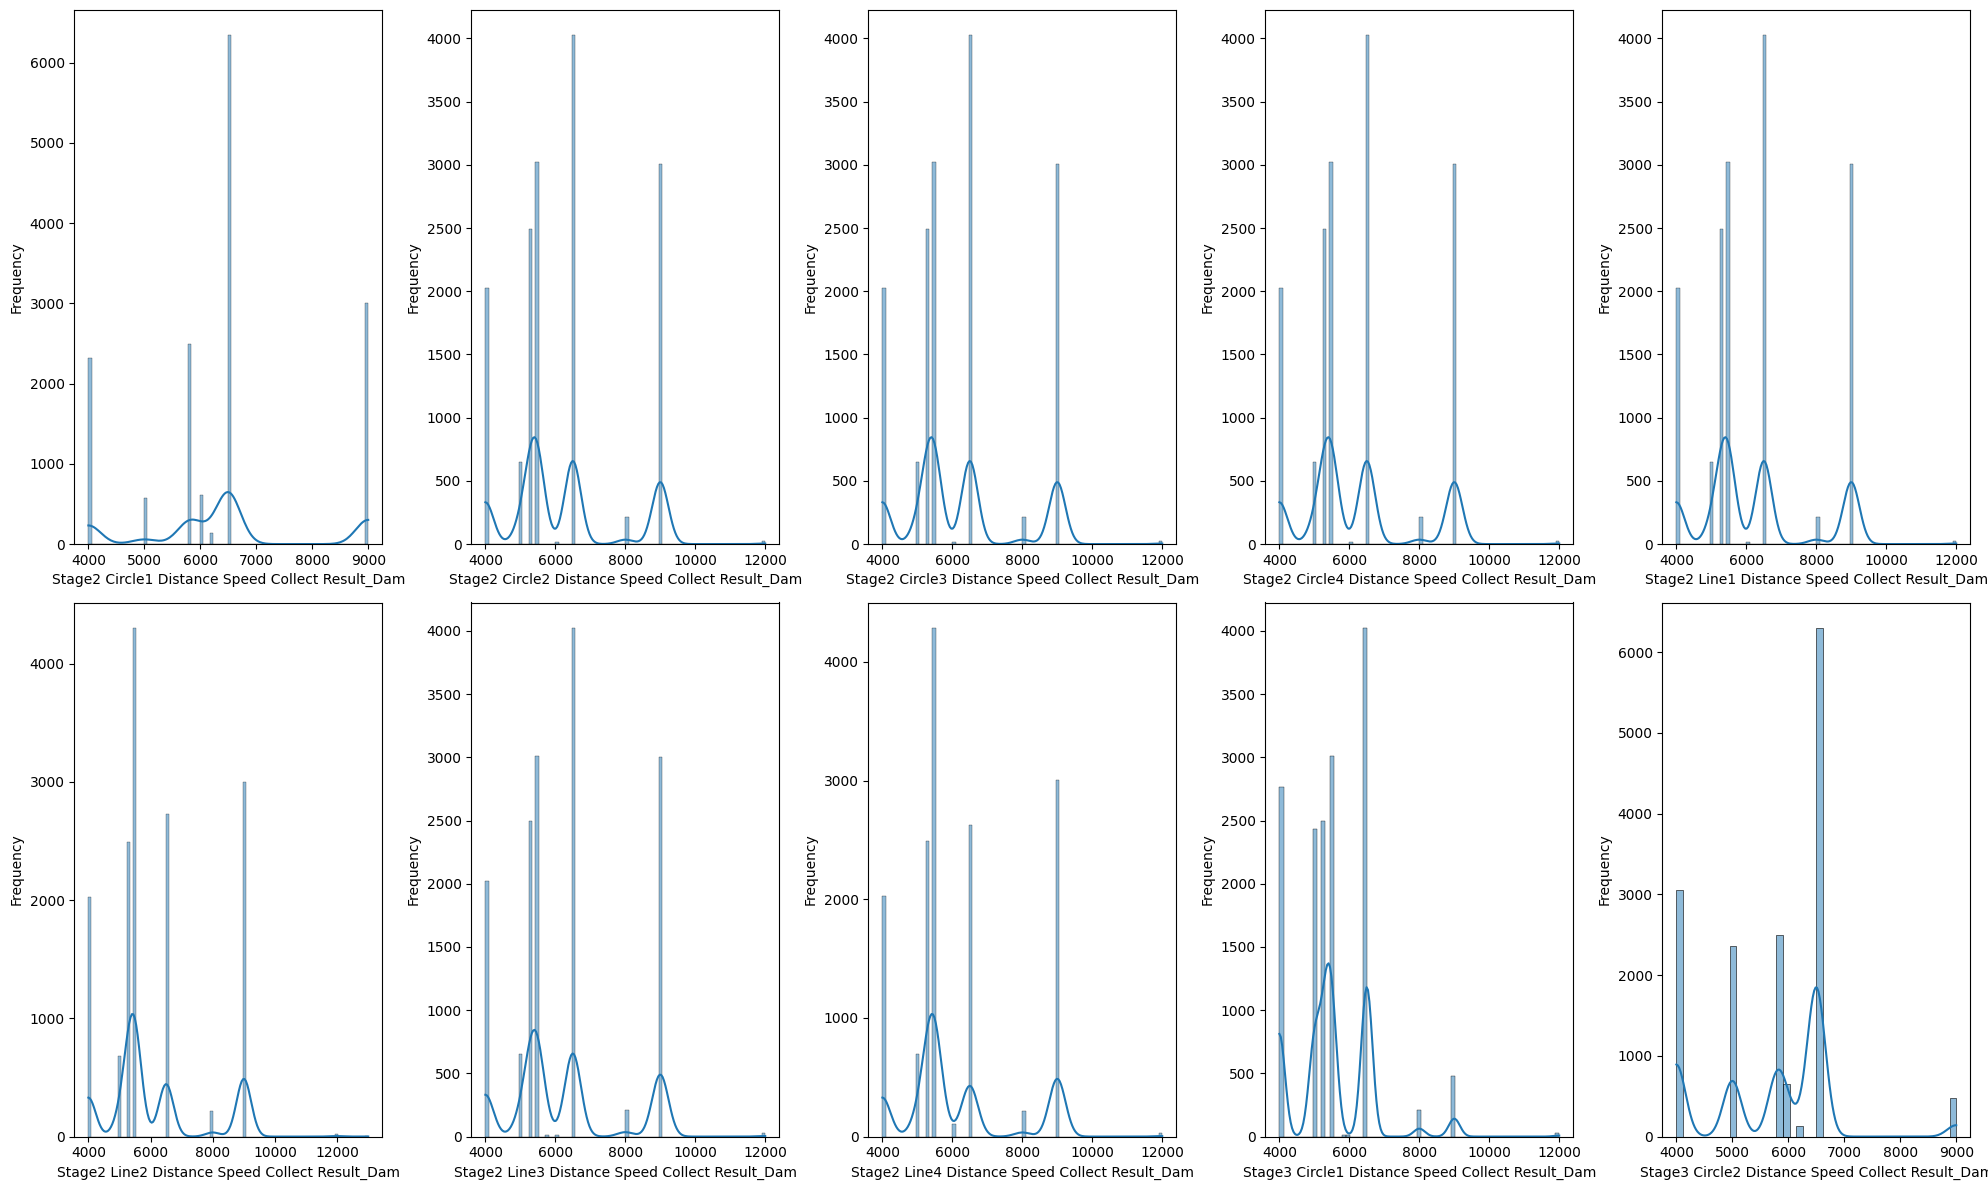

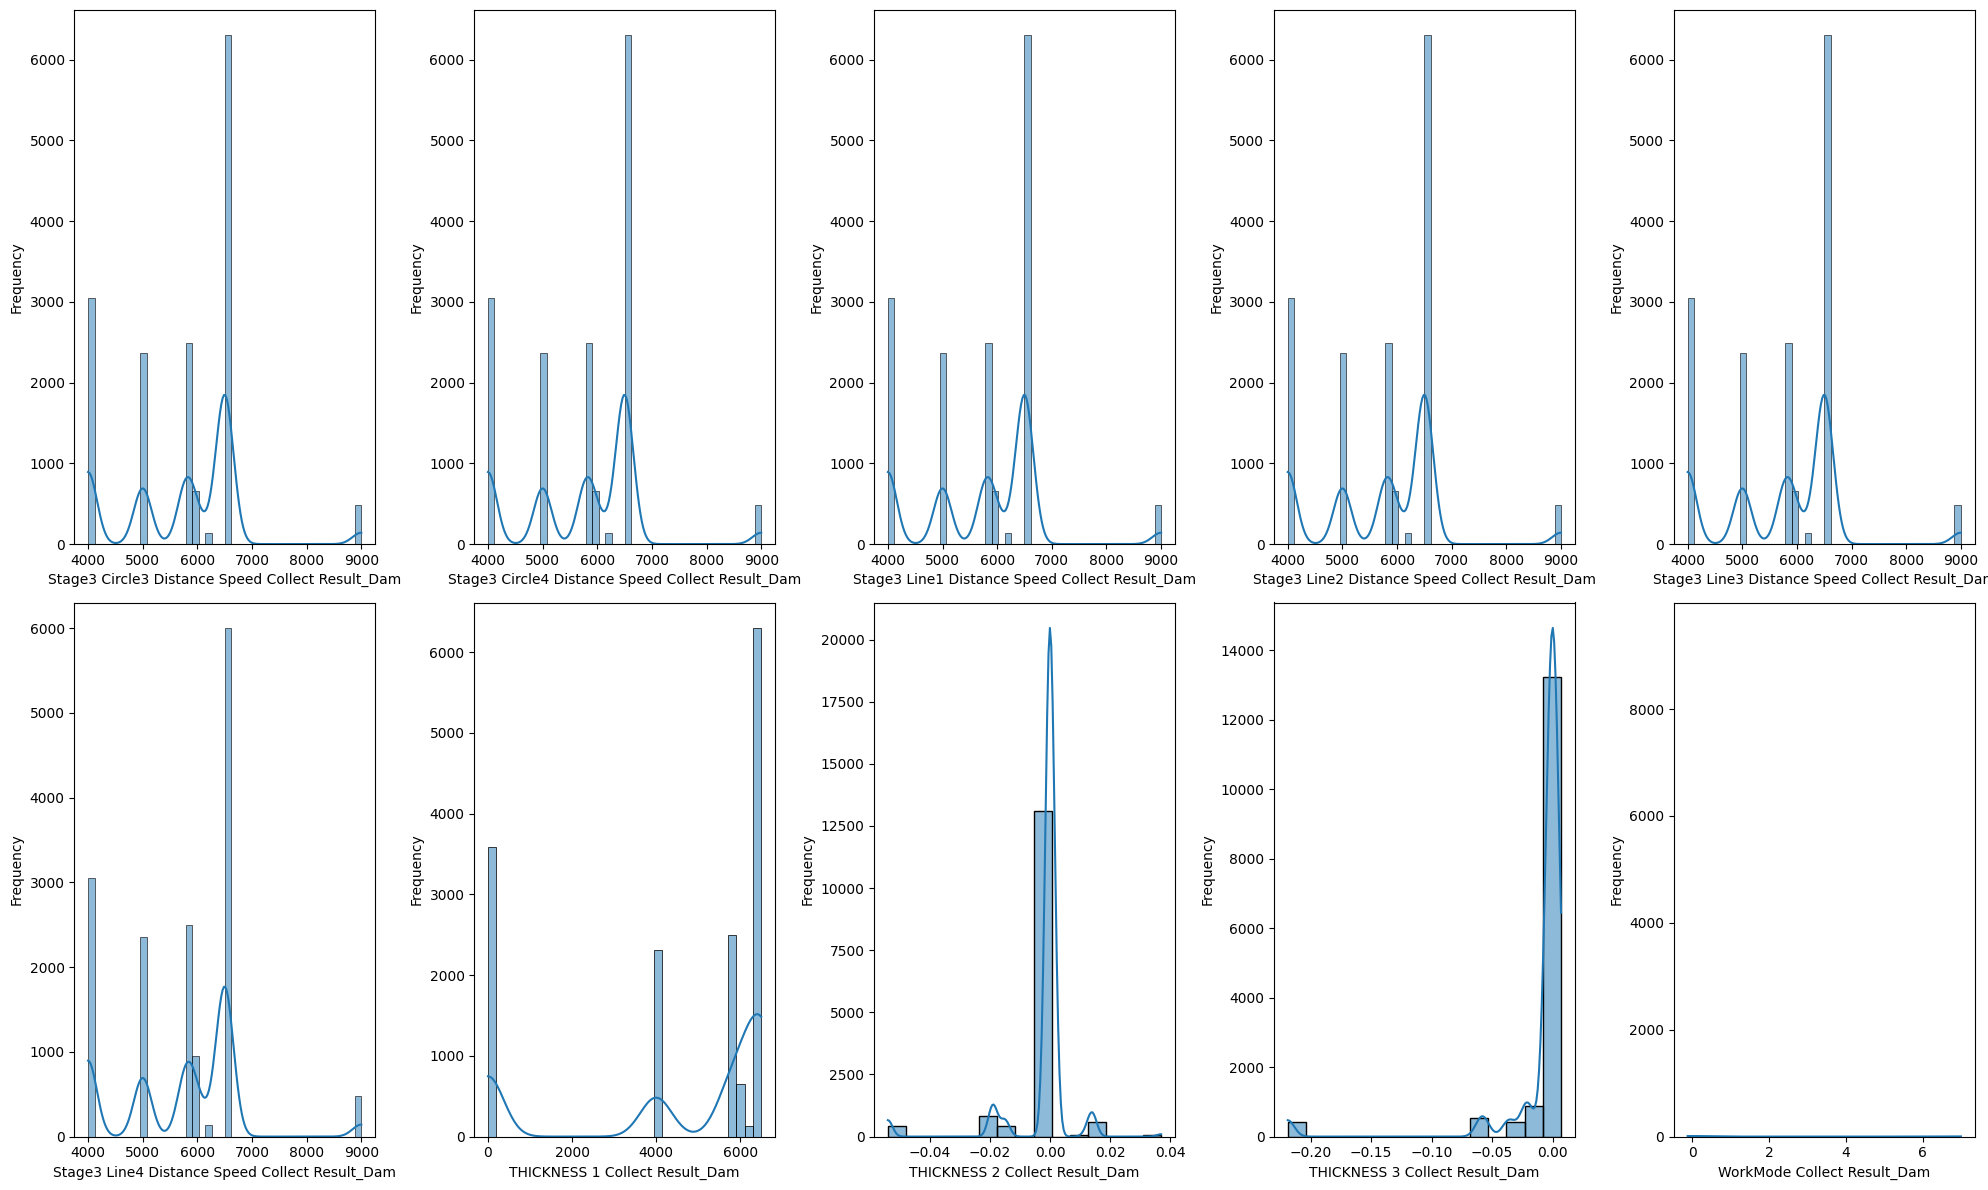

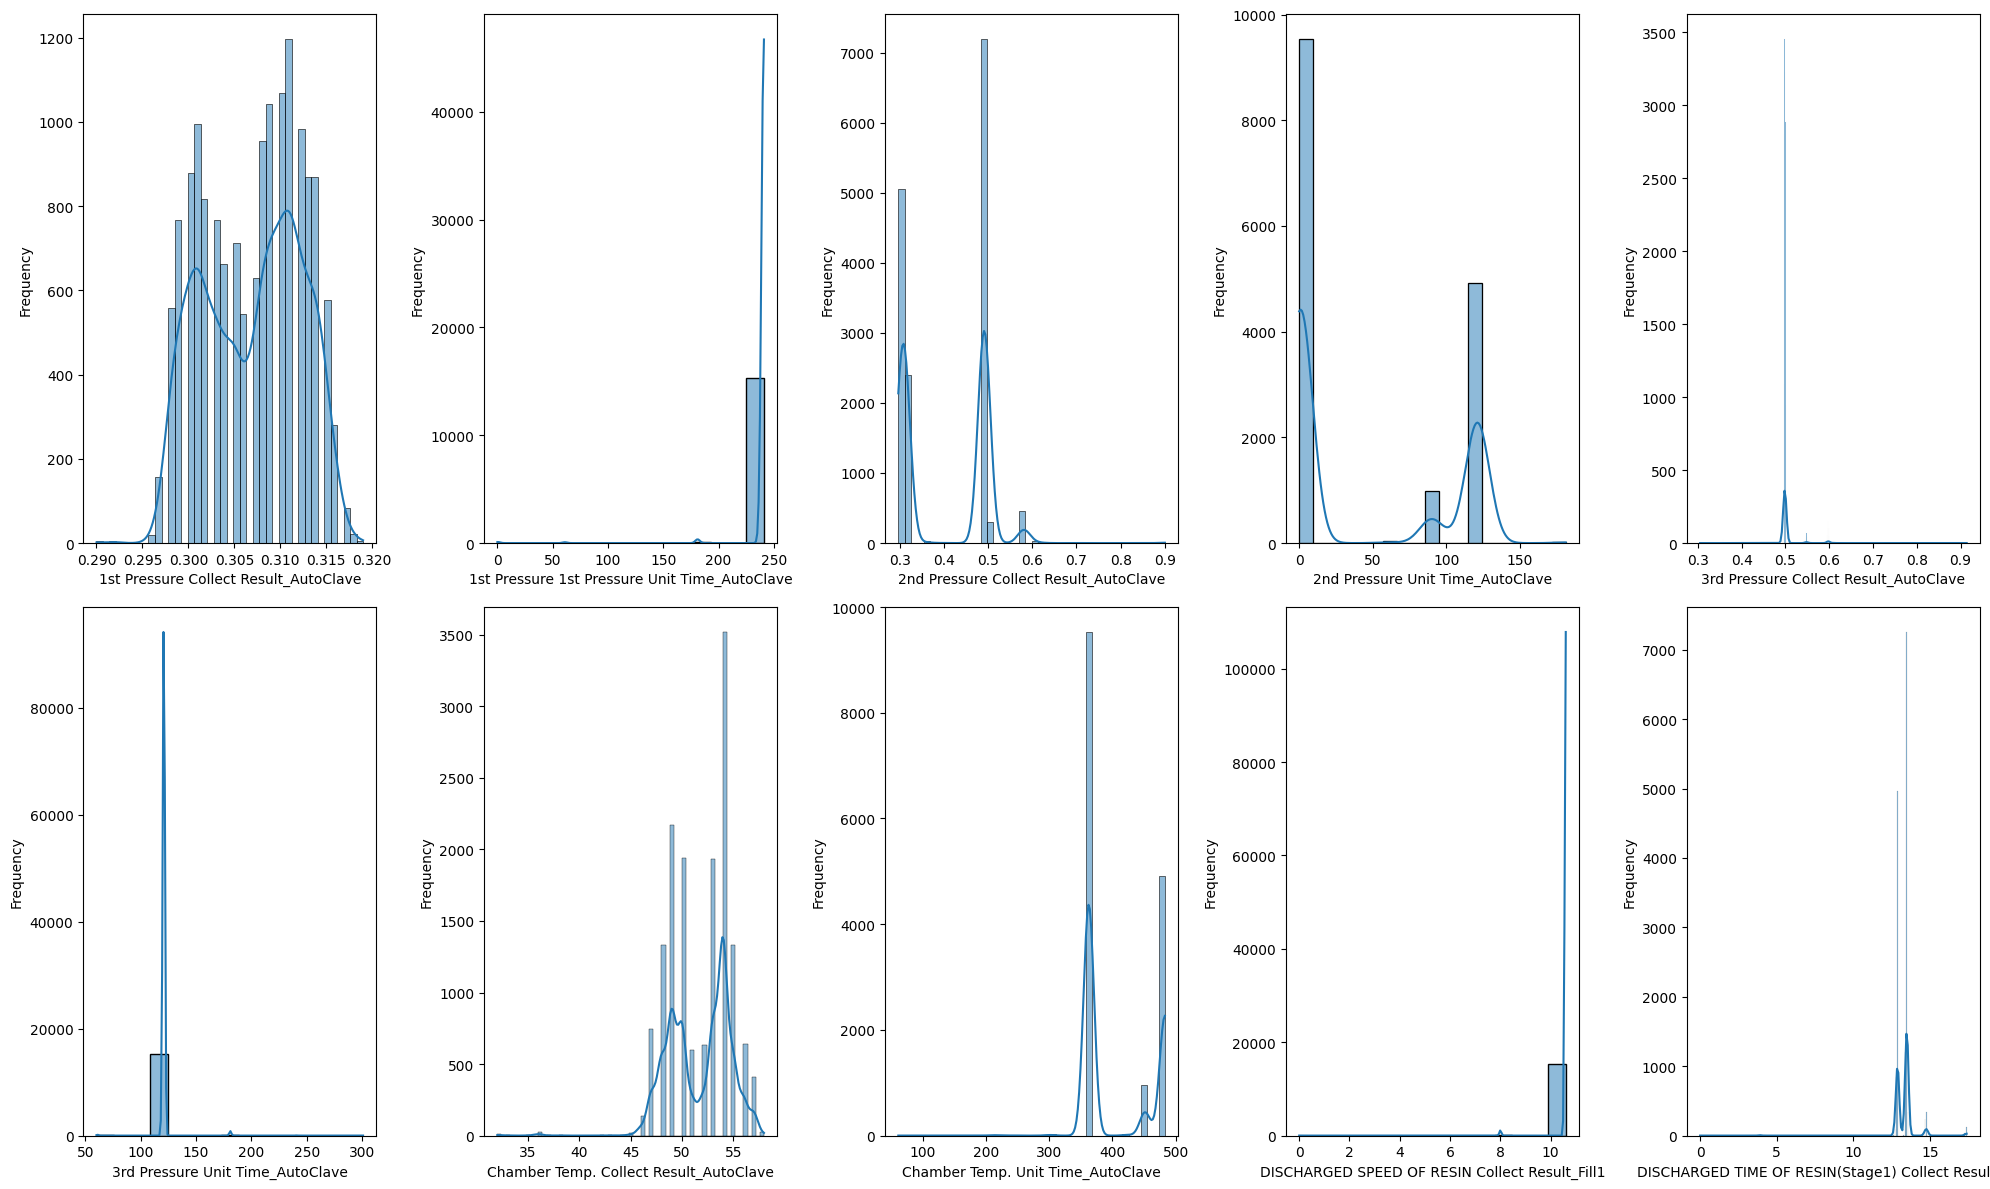

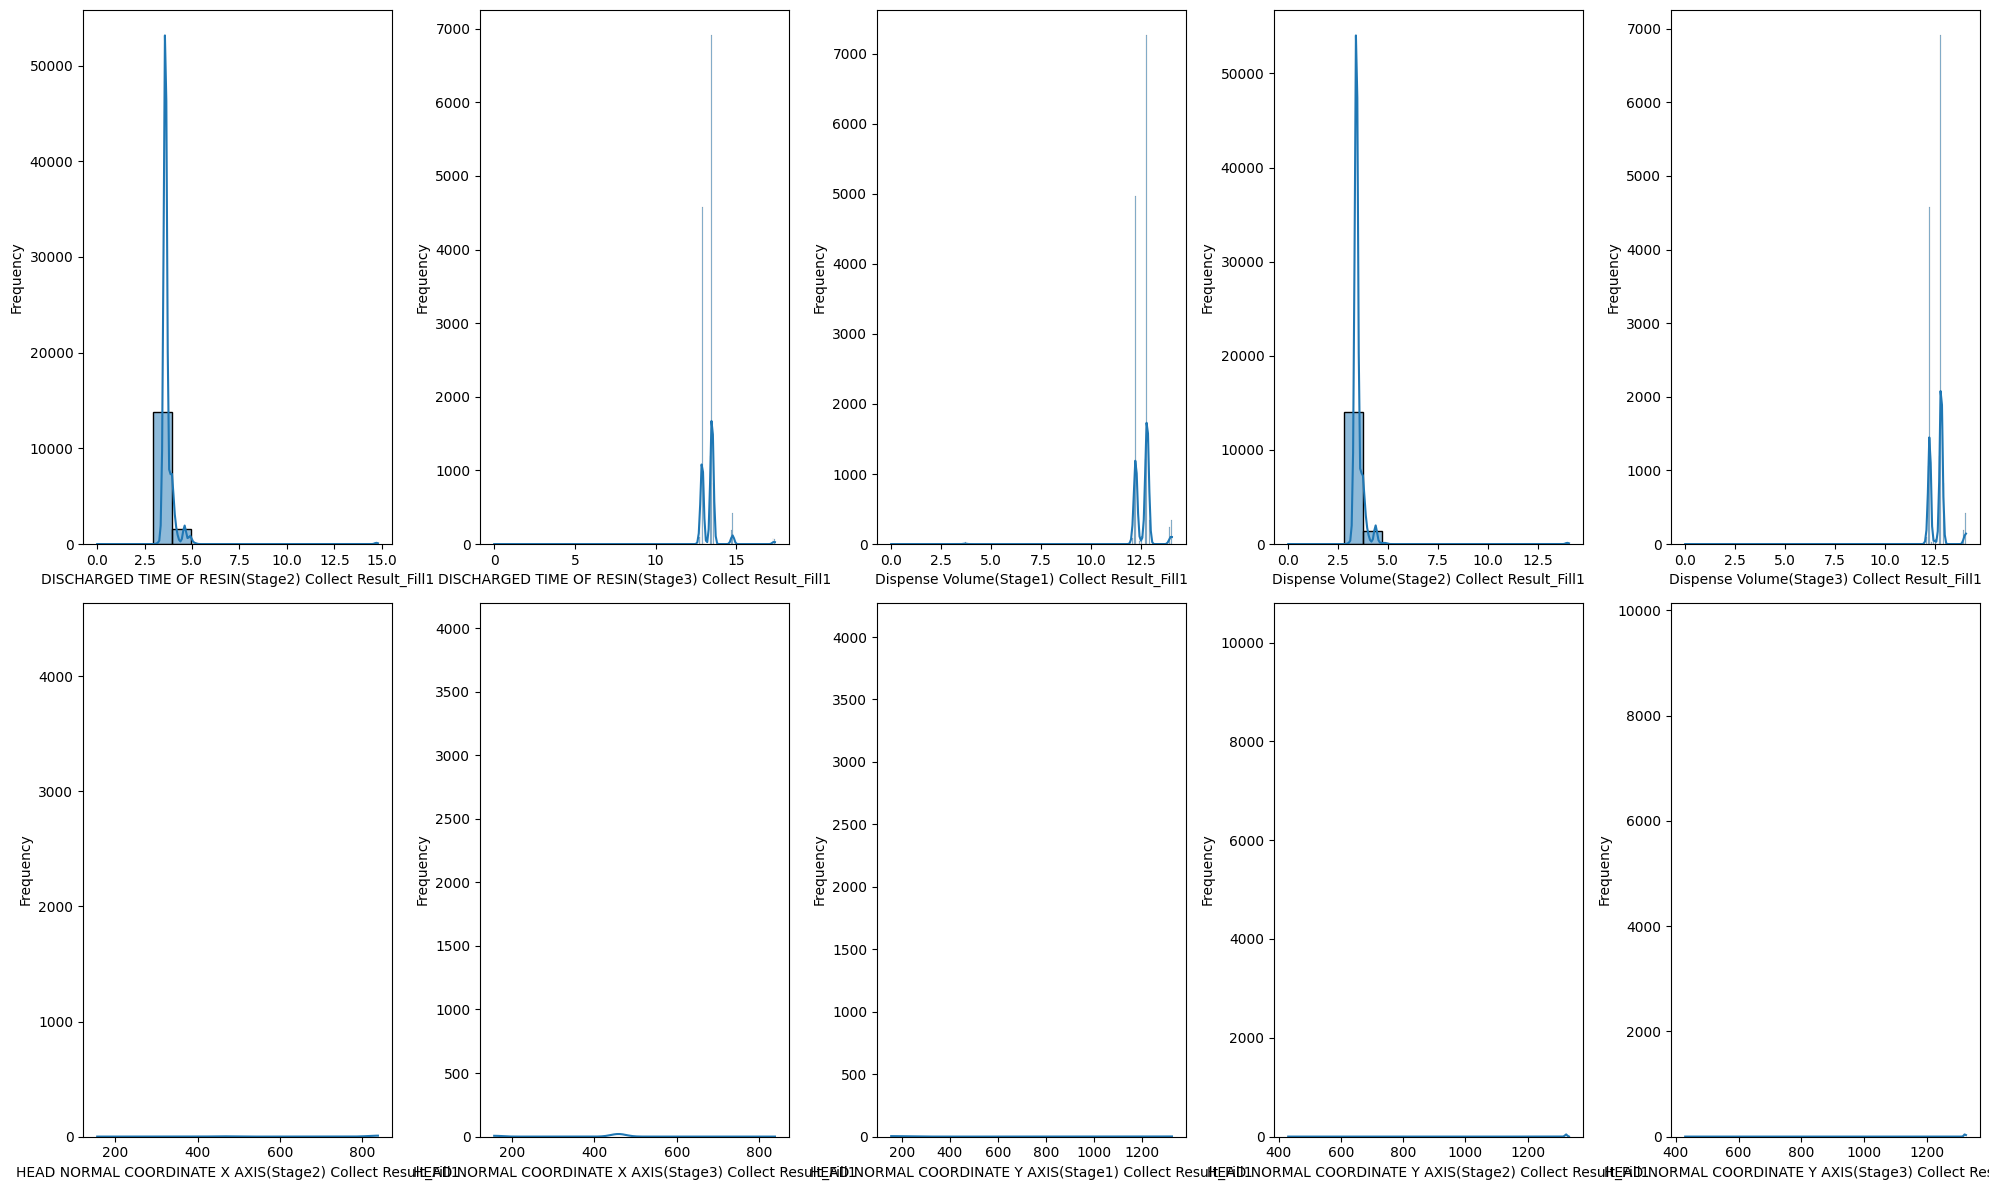

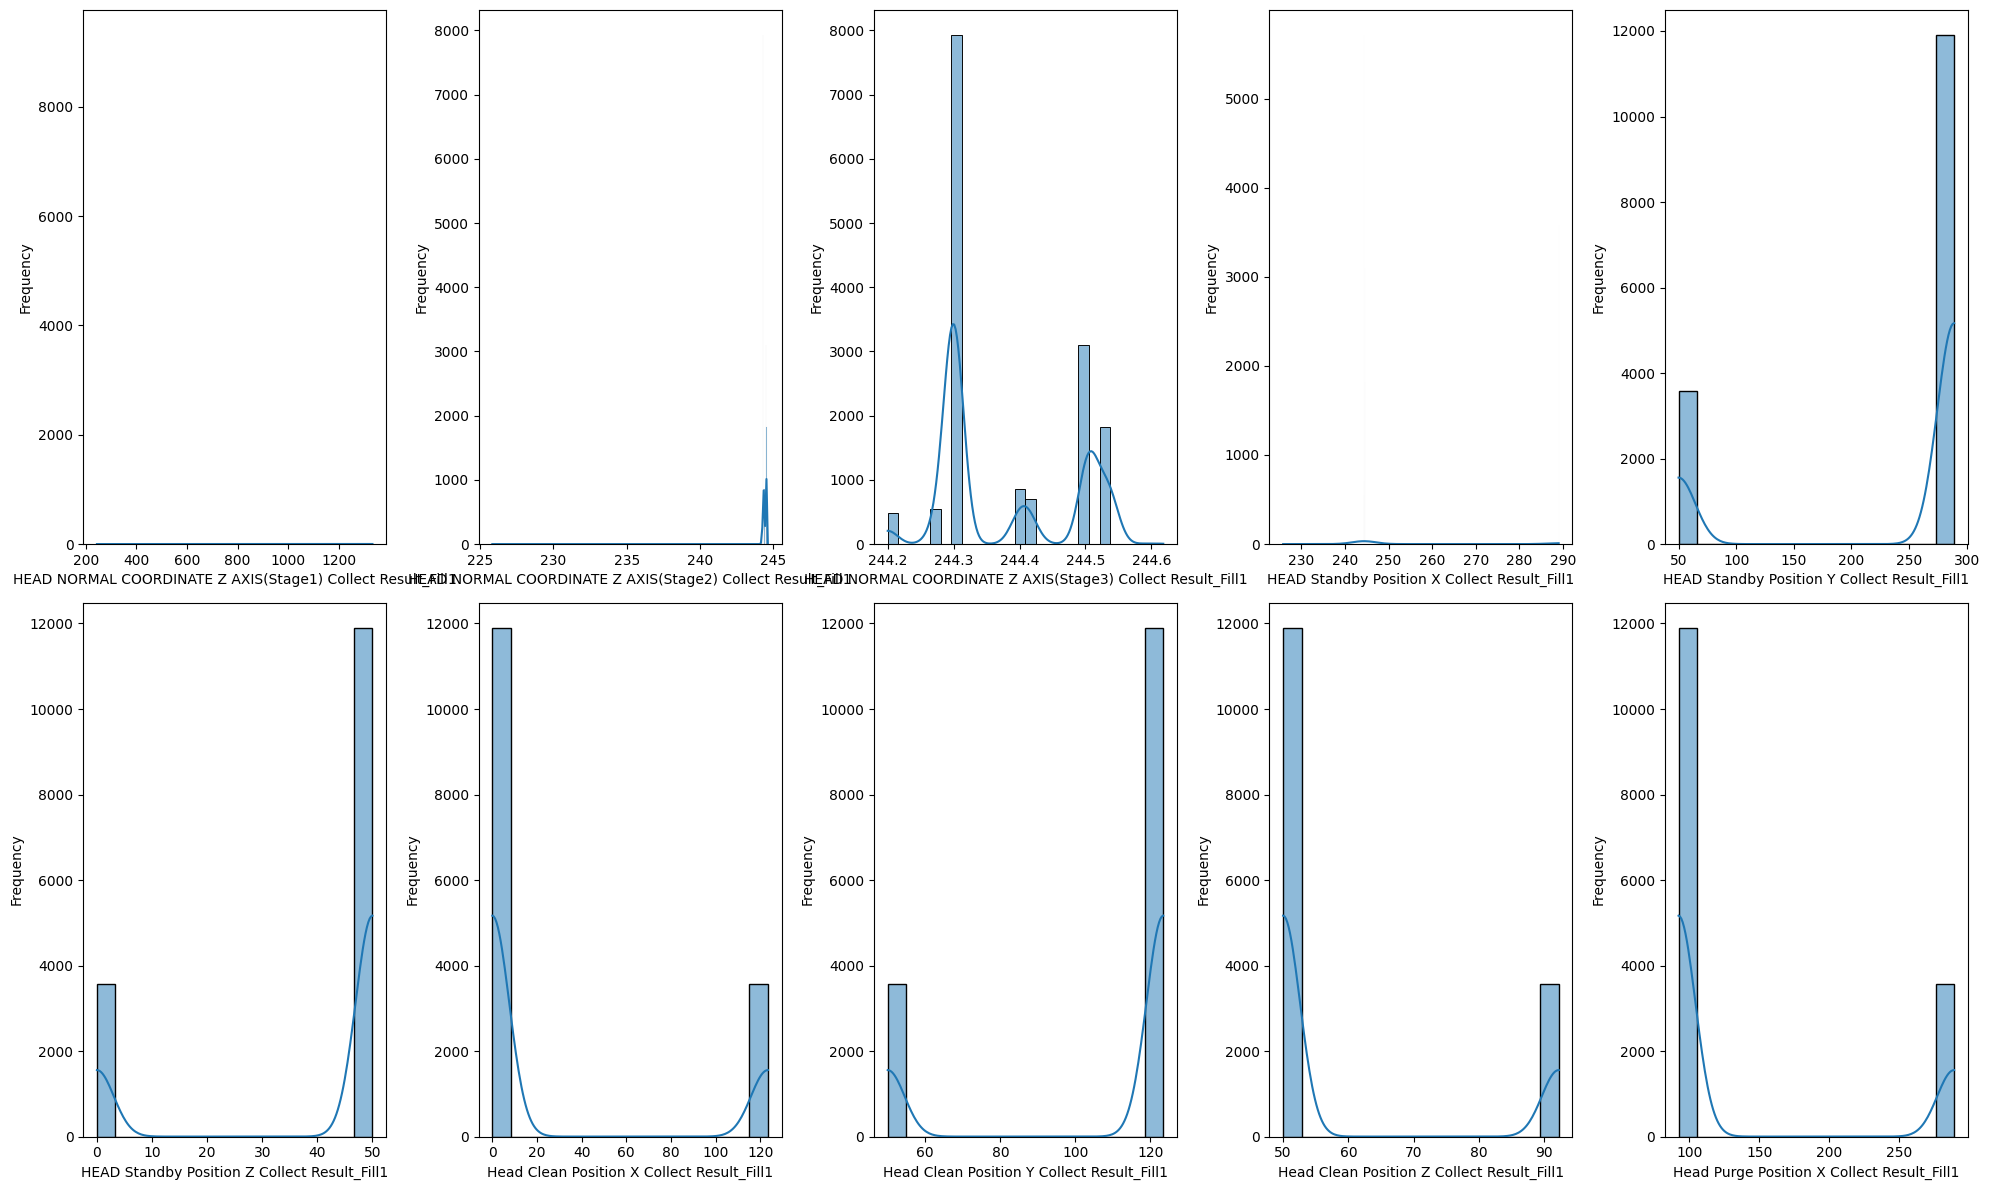

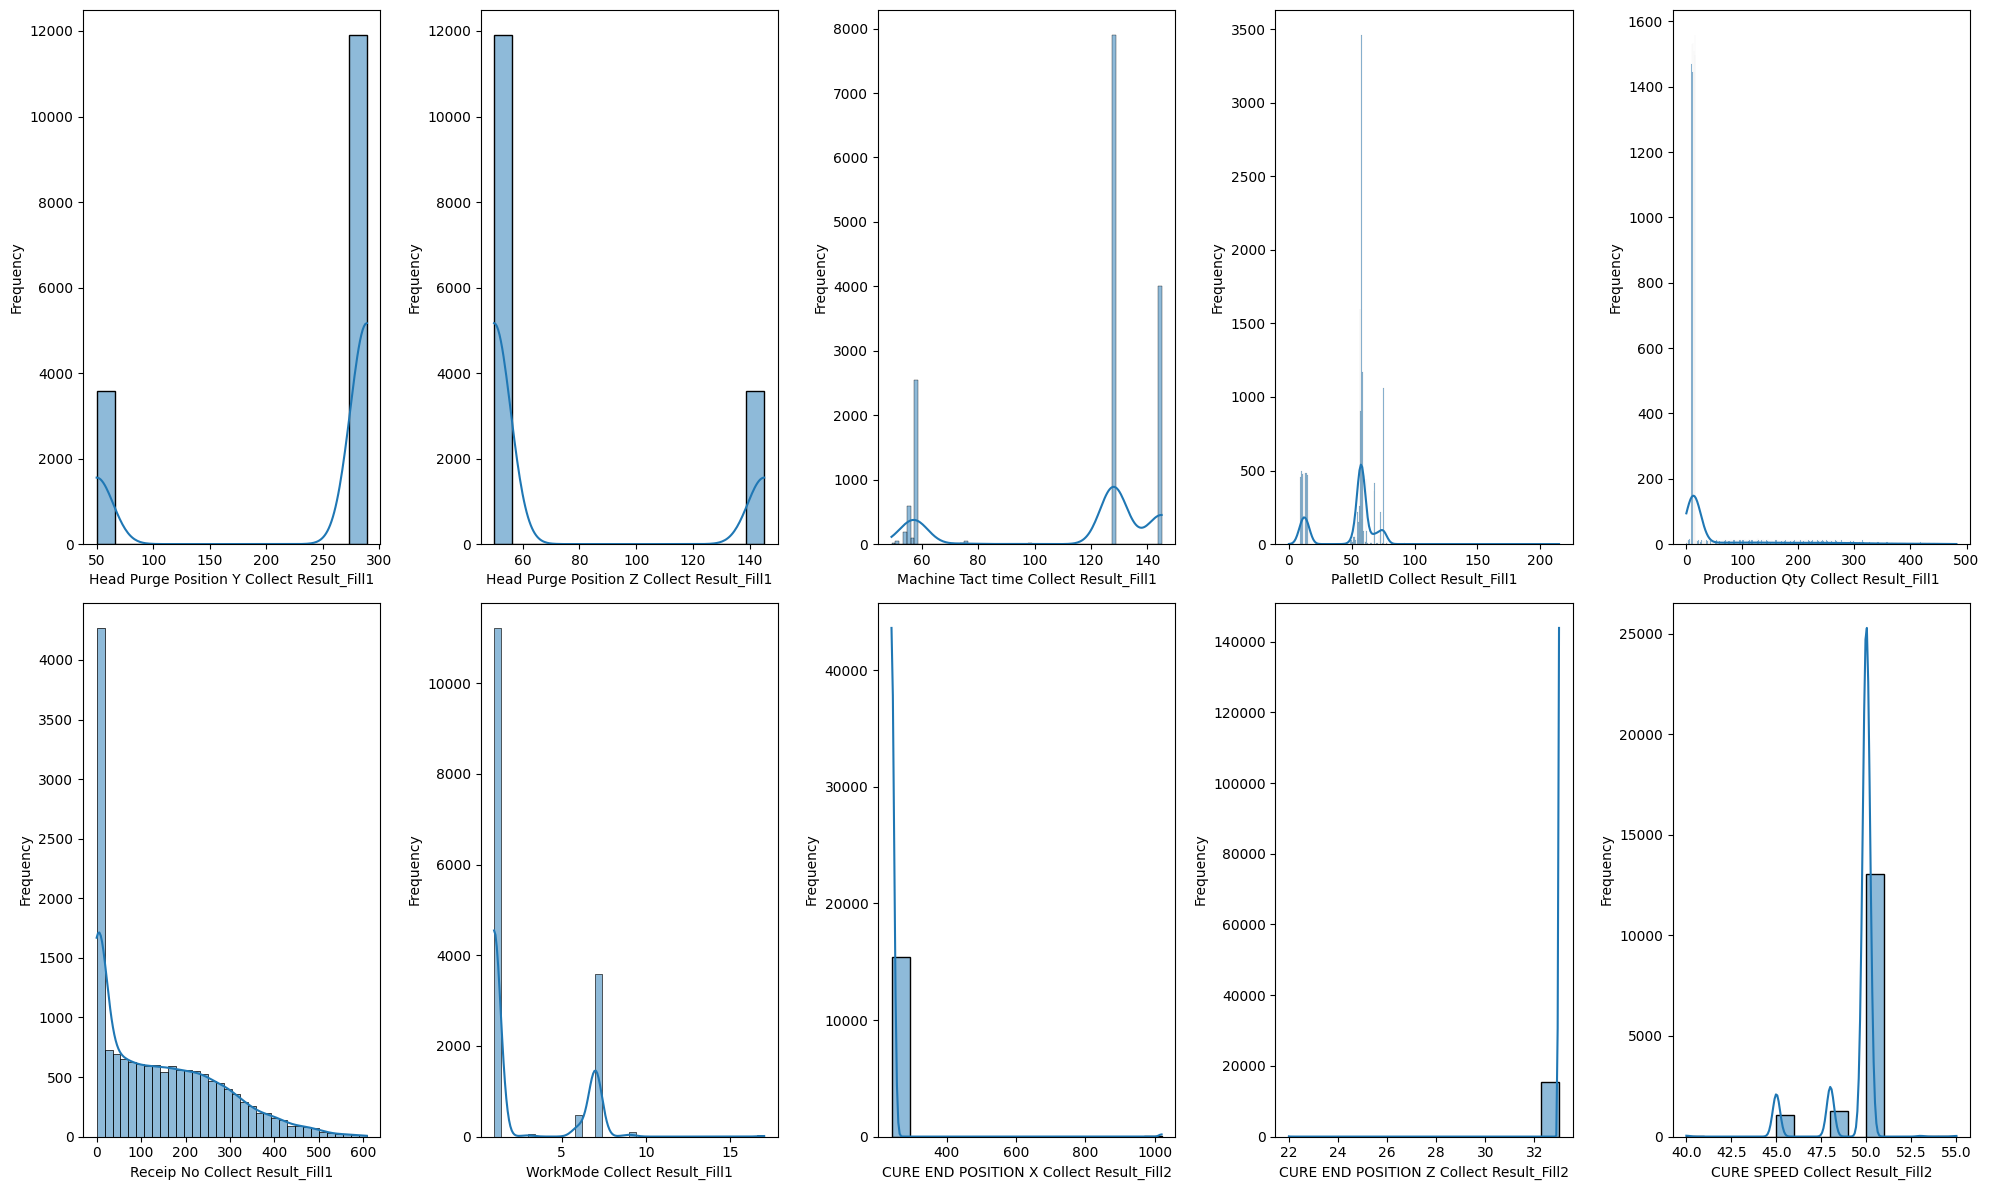

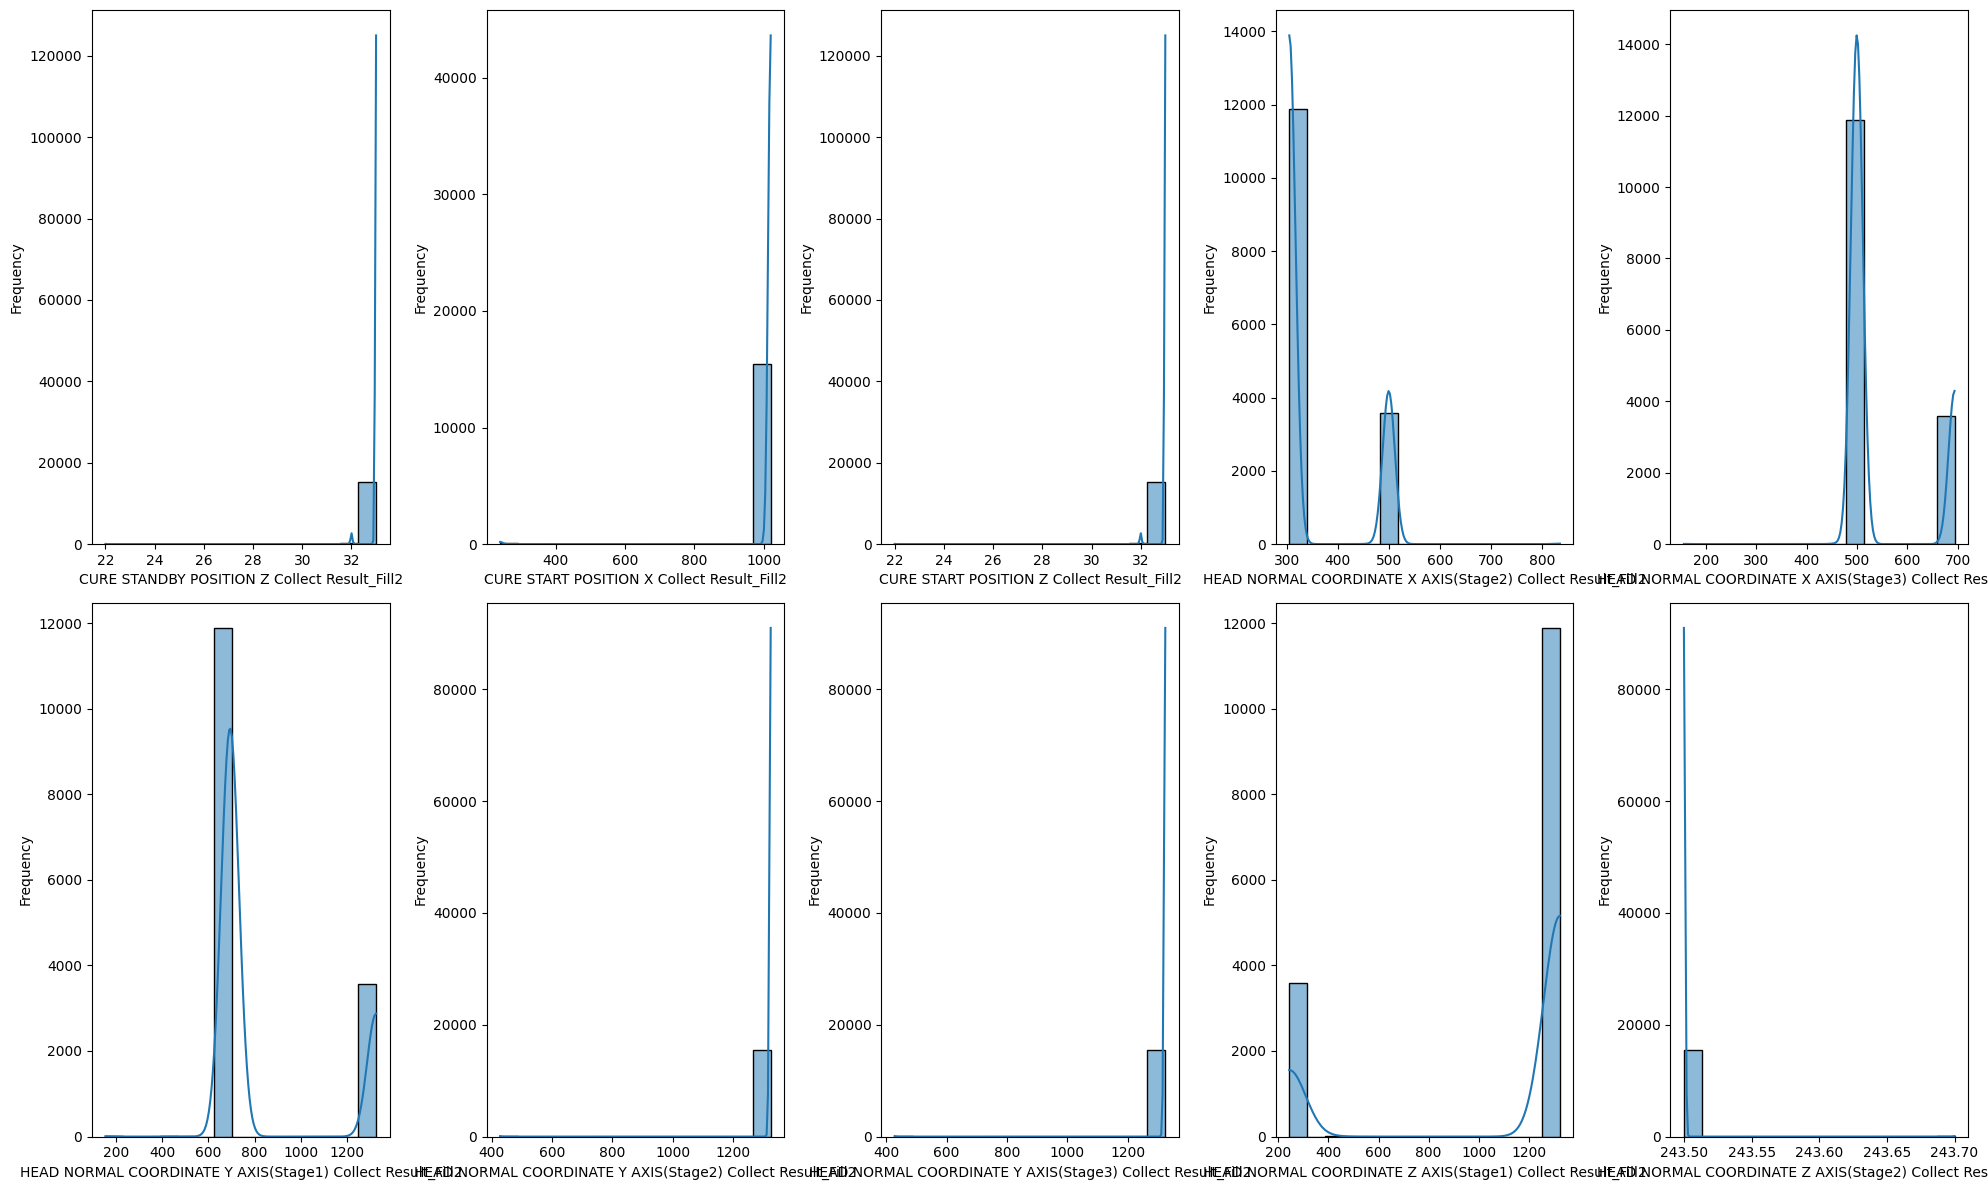

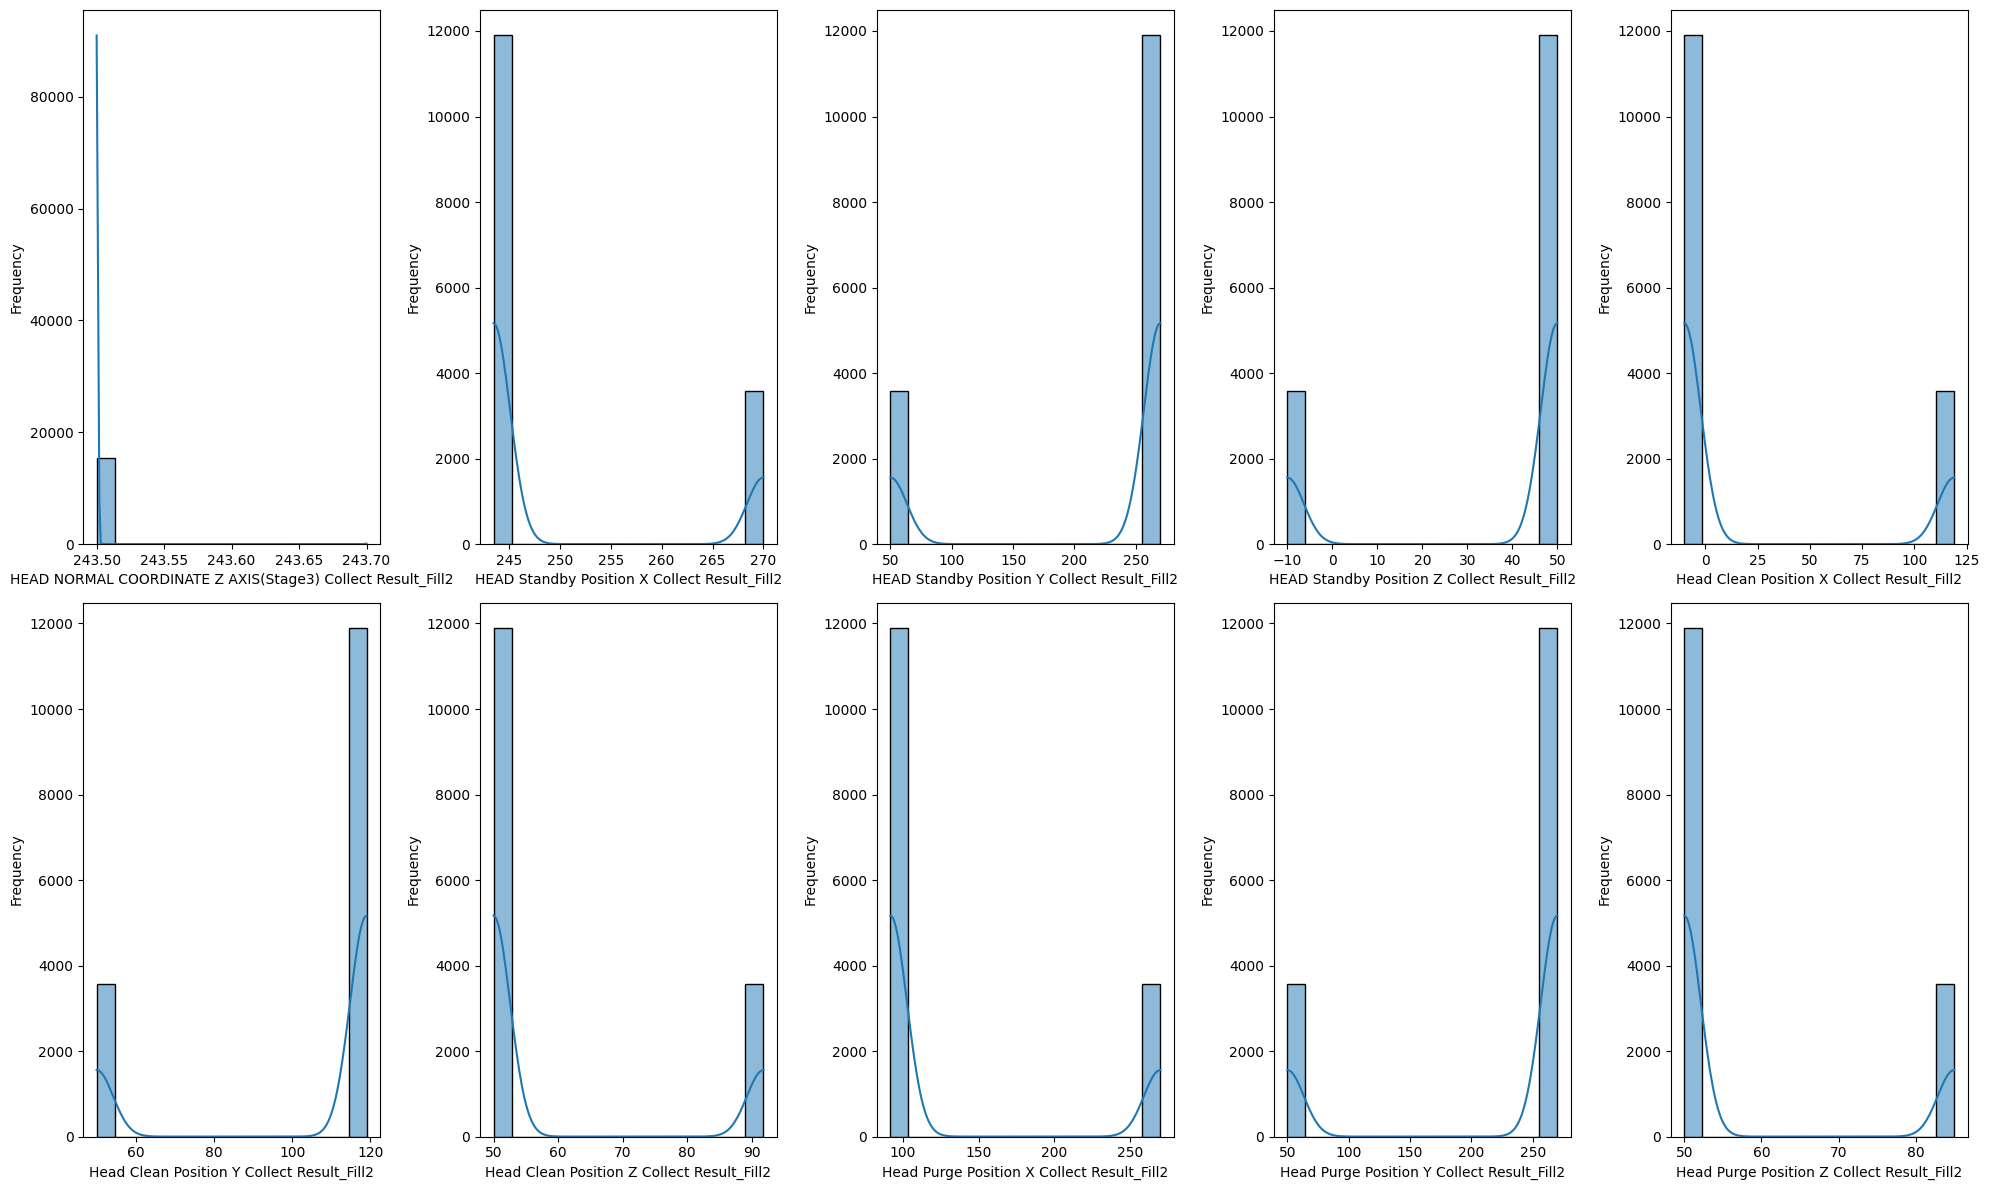

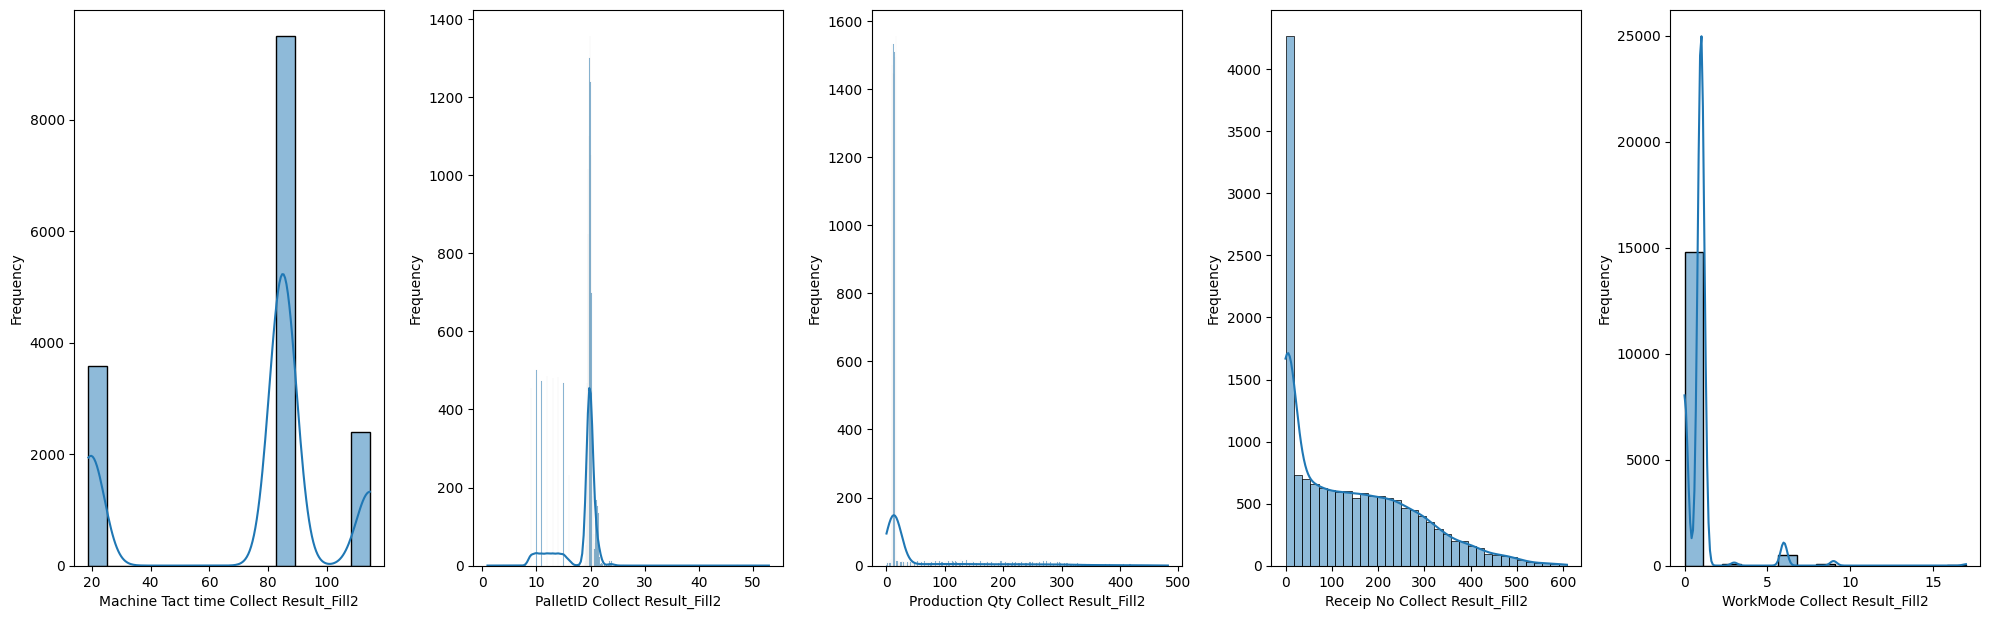

In [62]:
plot_distribution(train2_numeric, train2_numeric.columns)

In [120]:
few_unique_columns_2 = [col for col in train2.columns if train2[col].nunique() < 5]
len(few_unique_columns_2)

44

In [121]:
set(few_unique_columns_1) - set(few_unique_columns_2)

{'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam',
 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam',
 'WorkMode Collect Result_Fill1',
 'WorkMode Collect Result_Fill2'}

In [122]:
train1['WorkMode Collect Result_Fill1'].value_counts()

WorkMode Collect Result_Fill1
7     12867
1     11610
6       497
17       56
Name: count, dtype: int64

In [123]:
train2['WorkMode Collect Result_Fill1'].value_counts()

WorkMode Collect Result_Fill1
1     11219
7      3580
6       486
9        96
3        64
17       30
4         1
Name: count, dtype: int64

##### Heatmap (Correlation between Input Variables)

In [124]:
def plot_correlation_heatmap(df, columns):
    """
    Plots a heatmap for the correlation matrix of the specified columns in a DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    columns (list): A list of column names to include in the heatmap.
    
    Returns:
    None
    """
    # Calculate the correlation matrix for the specified columns
    corr_matrix = df[columns].corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix,cmap='coolwarm', fmt='.2f', square=True, linewidths=.5)
    plt.title('Correlation Heatmap')
    plt.show()

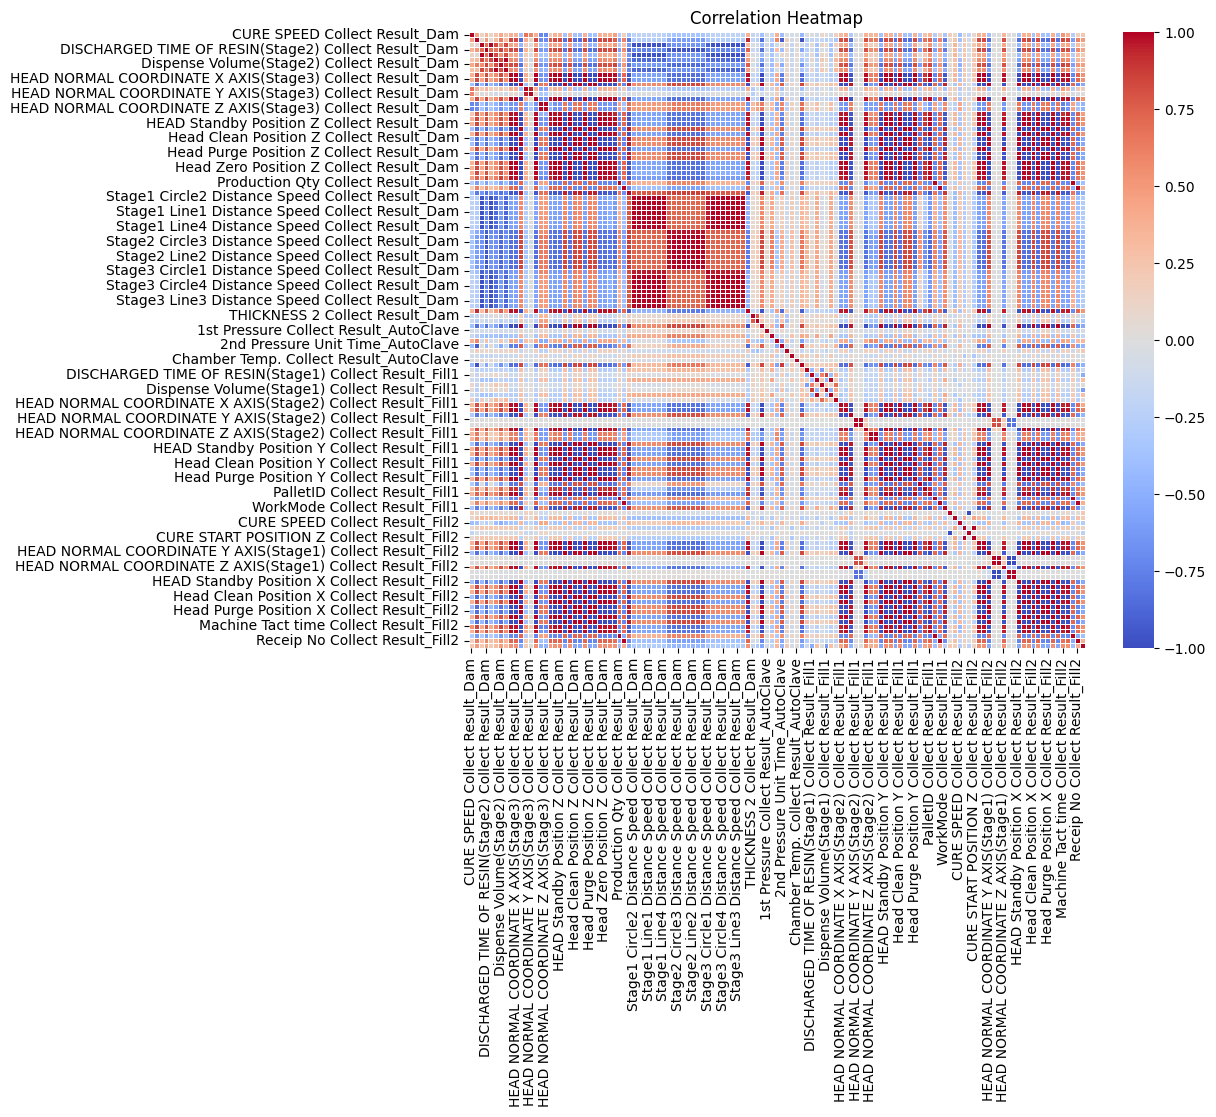

In [75]:
plot_correlation_heatmap(train1_numeric, train1_numeric.columns)

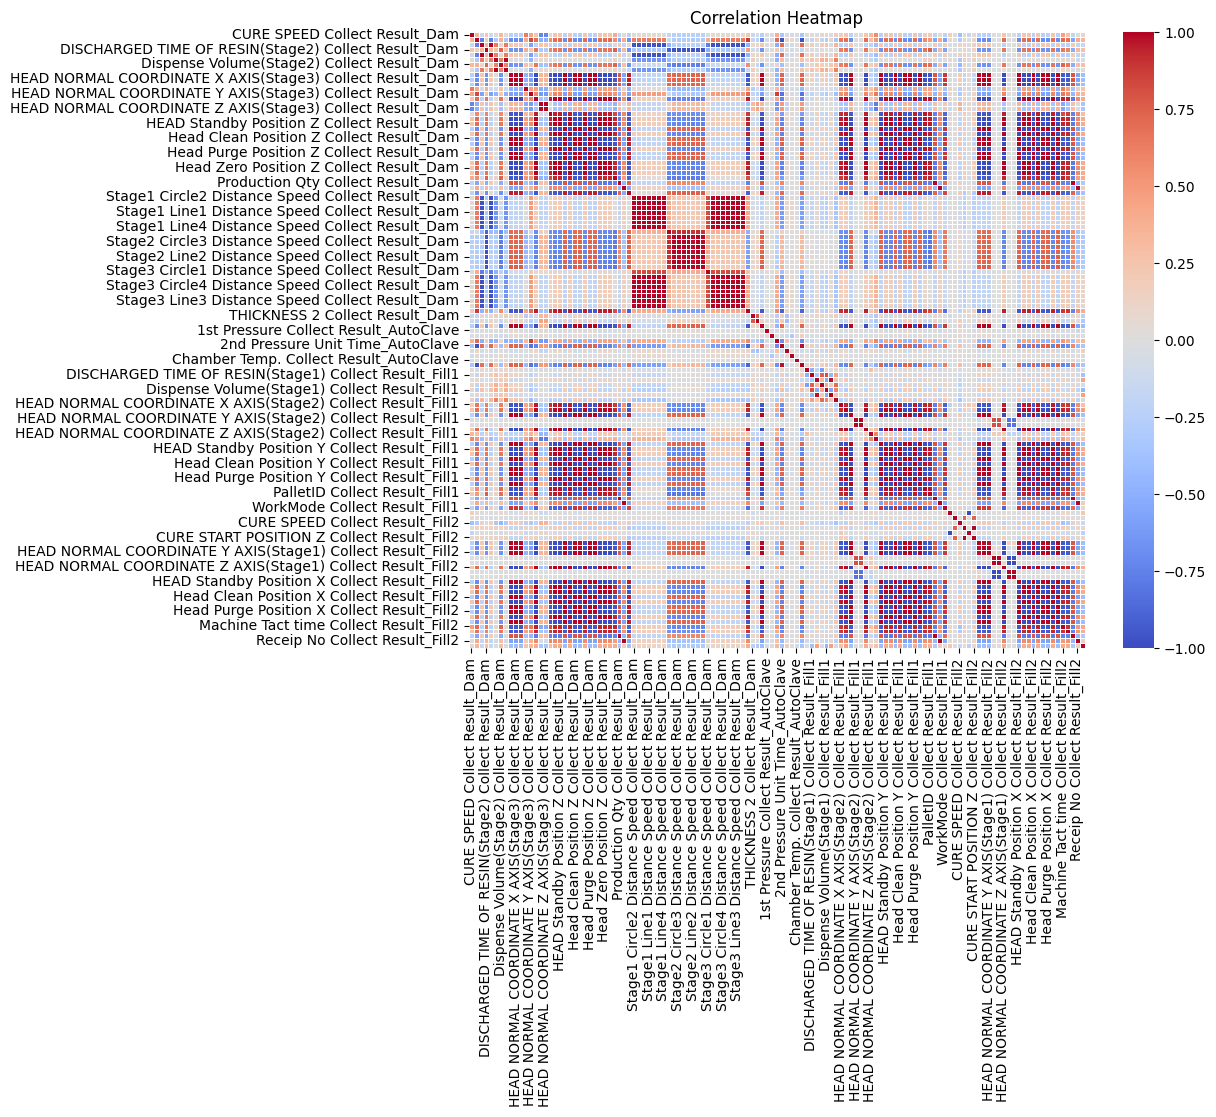

In [76]:
plot_correlation_heatmap(train2_numeric, train2_numeric.columns)

**Group by columns**
- HEAD NORMAL COORDINATE ~
- Stage ~
- Head ~


In [33]:
# Extract columns that start with "HEAD NORMAL COORDINATE"
head_normal_coordinate_columns = [col for col in train1.columns if col.startswith("HEAD NORMAL COORDINATE")]

# Extract columns that start with "Stage"
stage_columns = [col for col in train1.columns if col.startswith("Stage")]

# Extract columns that start with "Head"
head_columns = [col for col in train1.columns if col.startswith("Head")]

In [34]:
head_normal_coordinate_x_columns = [col for col in train1.columns if col.startswith("HEAD NORMAL COORDINATE X")]
head_normal_coordinate_y_columns = [col for col in train1.columns if col.startswith("HEAD NORMAL COORDINATE Y")]
head_normal_coordinate_z_columns = [col for col in train1.columns if col.startswith("HEAD NORMAL COORDINATE Z")]

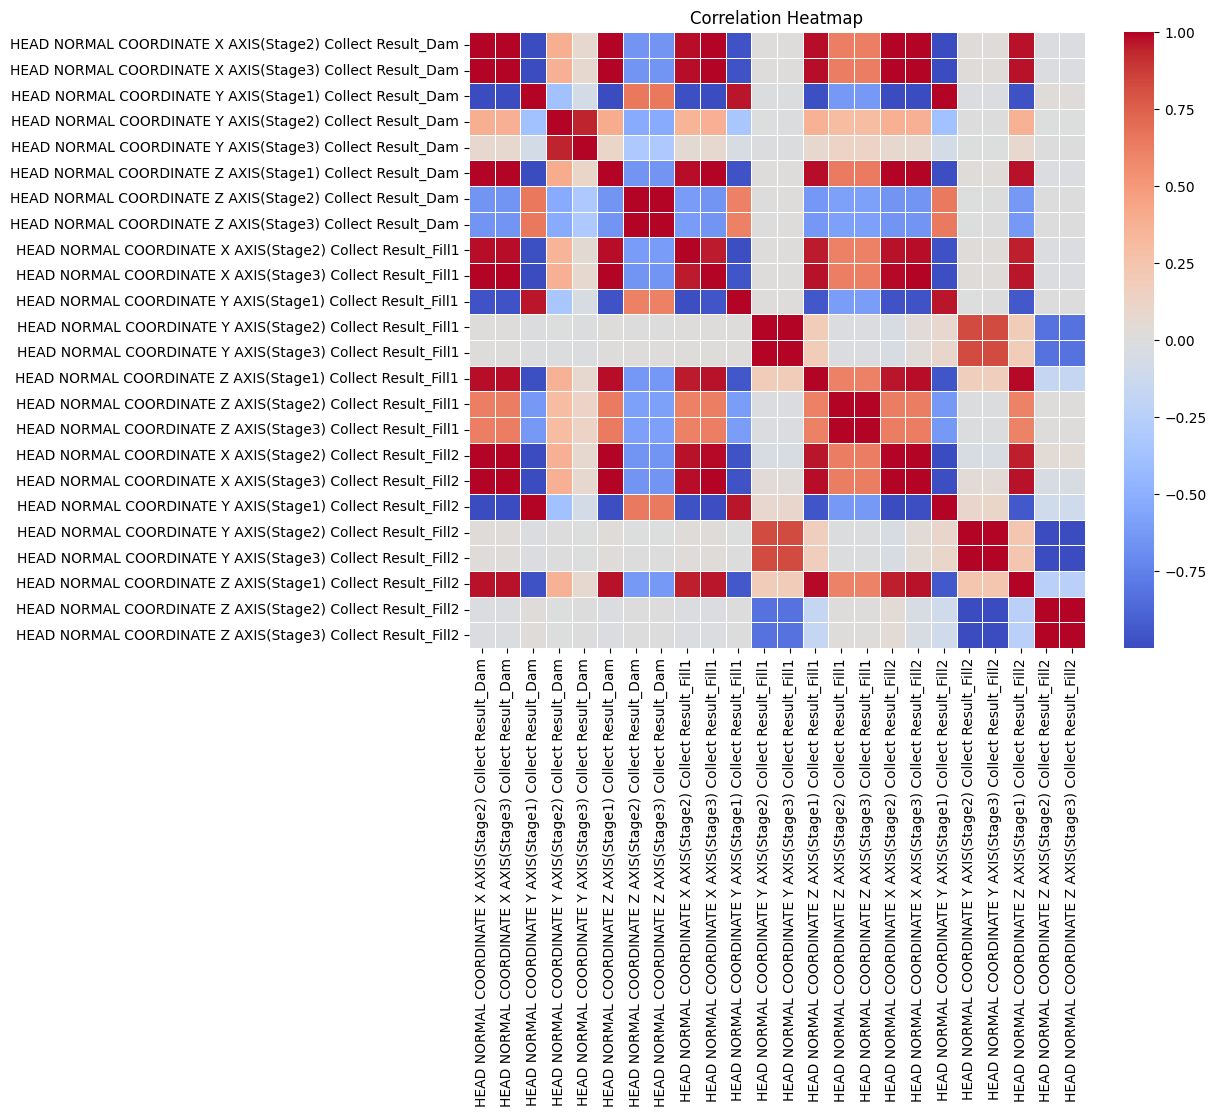

In [135]:
plot_correlation_heatmap(train1_numeric, head_normal_coordinate_columns)

- x좌표끼리 묶어서 Heatmap! 

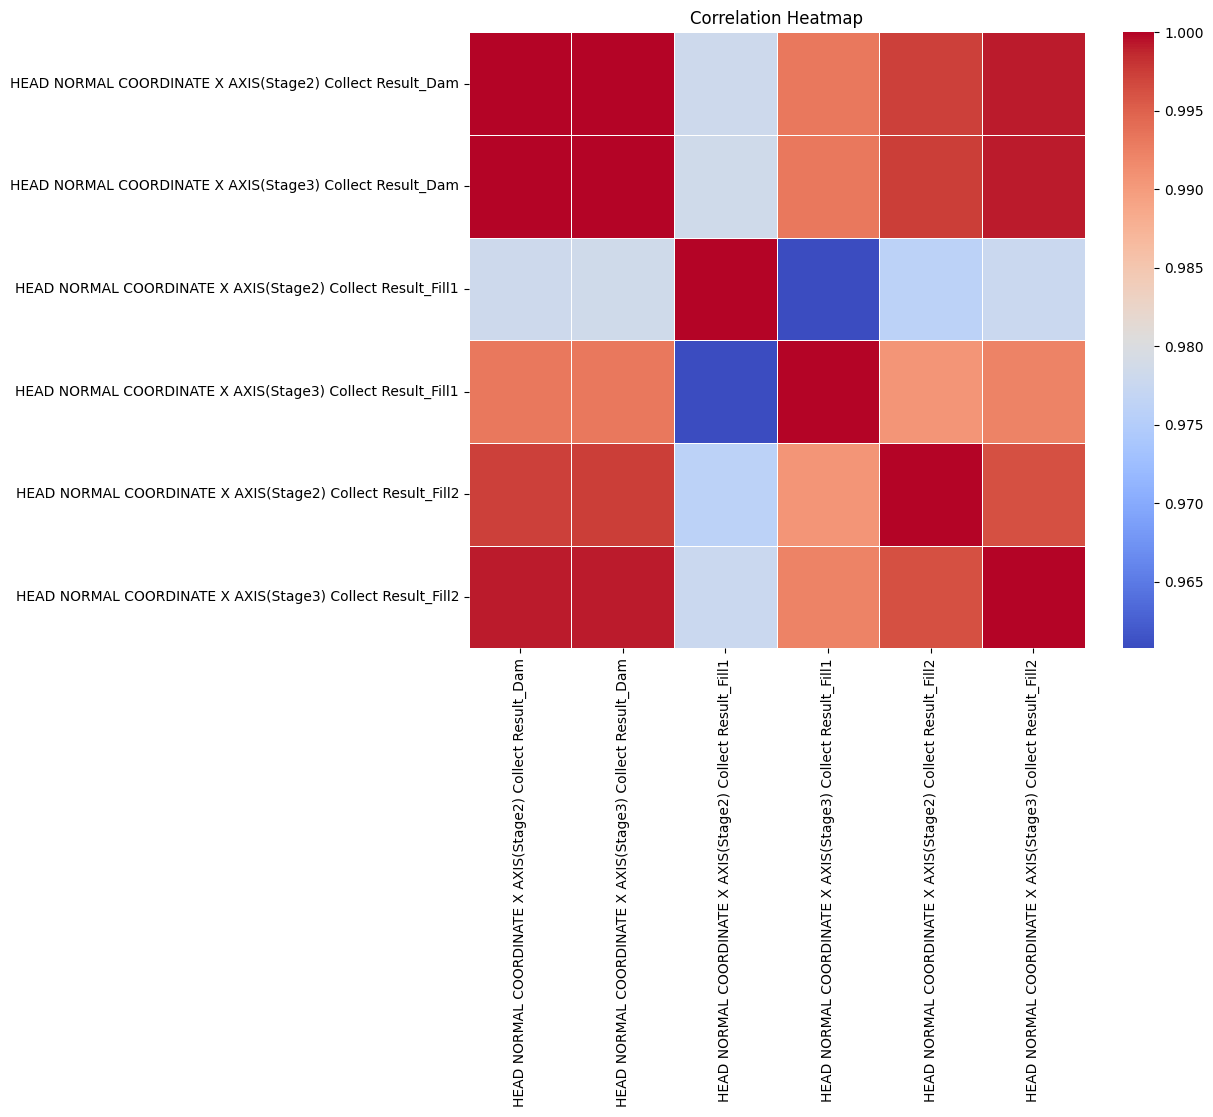

In [81]:
plot_correlation_heatmap(train1_numeric, head_normal_coordinate_x_columns)

- y좌표끼리 묶어서 Heatmap!

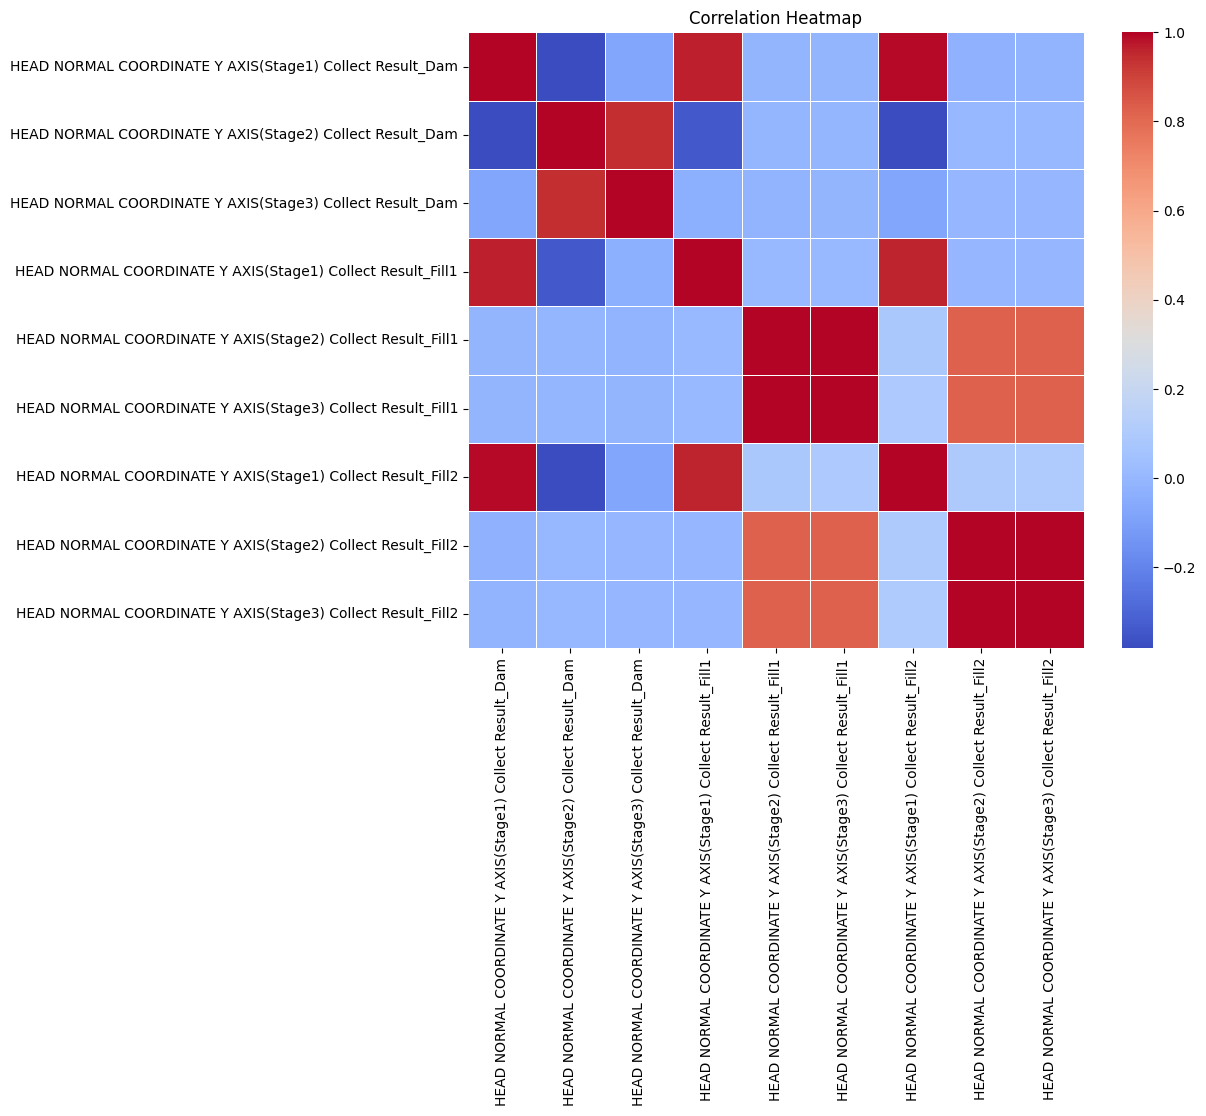

In [82]:
plot_correlation_heatmap(train1_numeric, head_normal_coordinate_y_columns)

- z좌표끼리 묶어서 Heatmap!

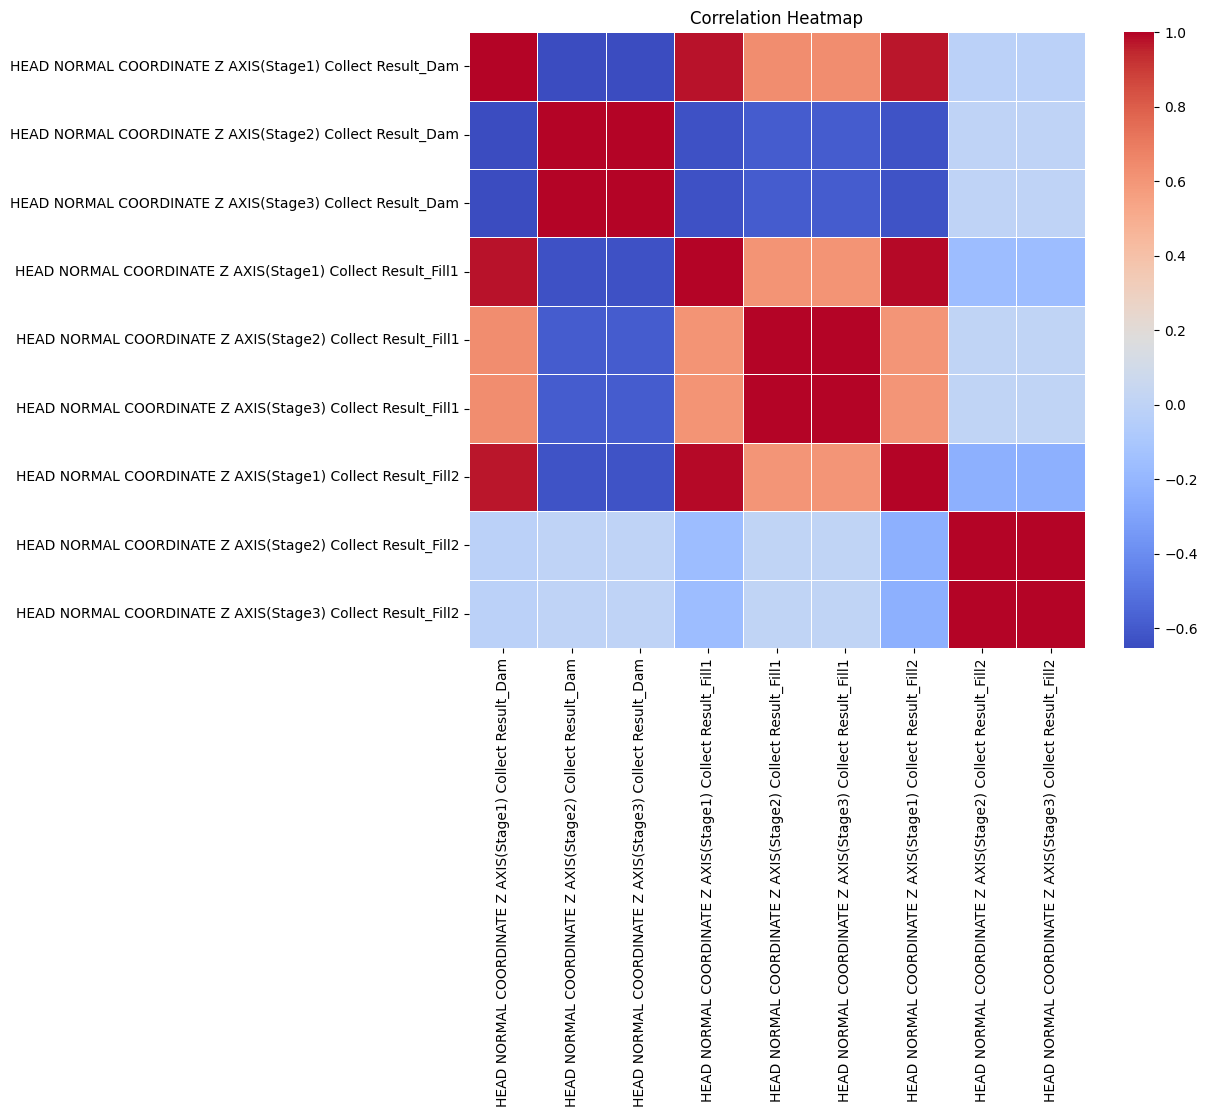

In [83]:
plot_correlation_heatmap(train1_numeric, head_normal_coordinate_z_columns)

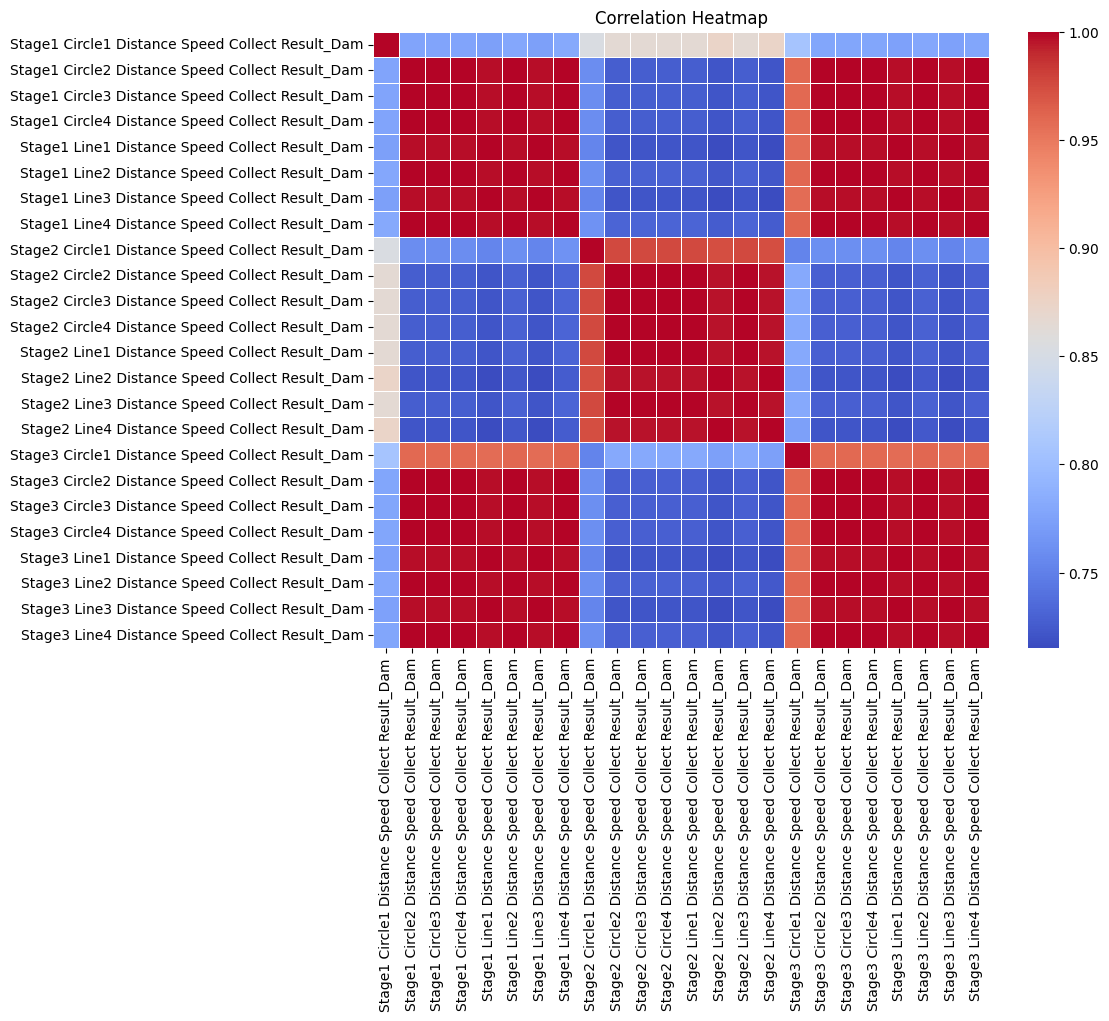

In [80]:
plot_correlation_heatmap(train1_numeric, stage_columns)

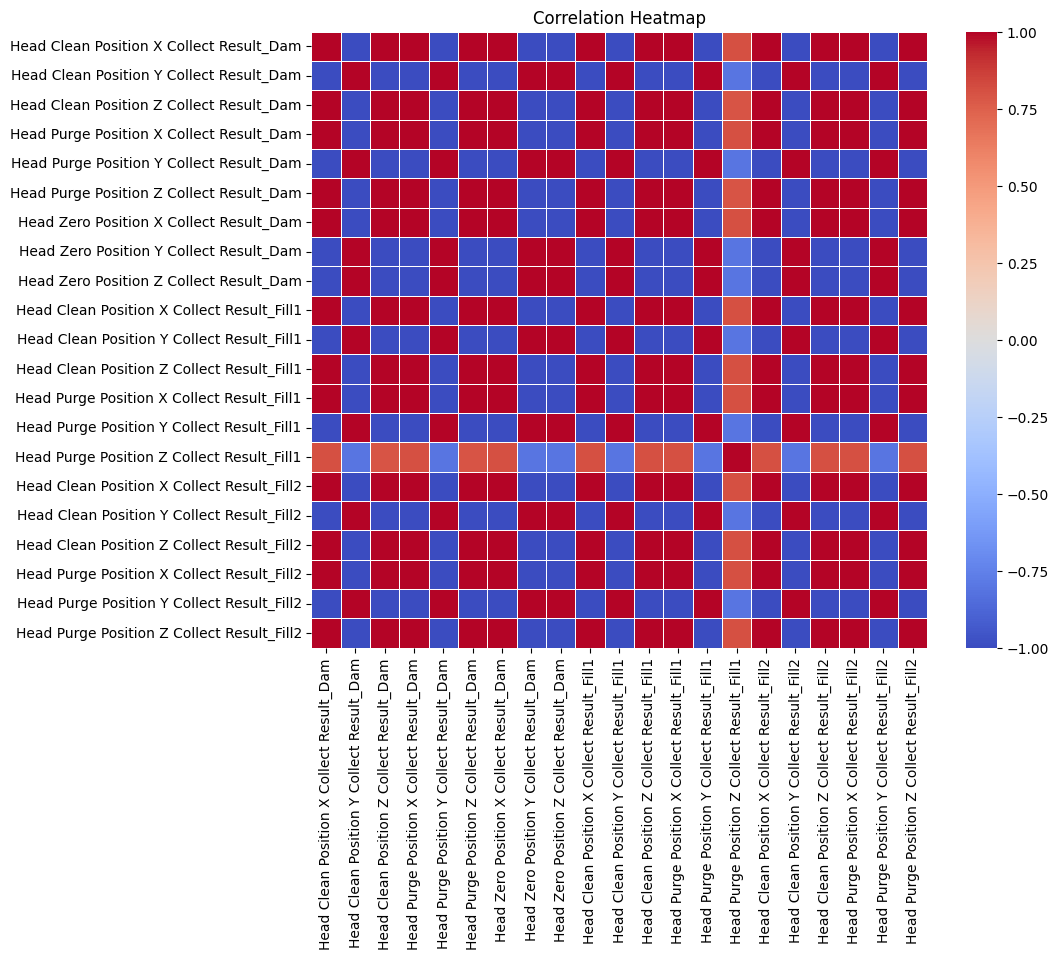

In [84]:
plot_correlation_heatmap(train1_numeric, head_columns)

# 5. PCA (Feature Extraction)

In [176]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [177]:
def perform_pca(df, columns, n_components=None):
    """
    Performs PCA on the specified columns of the DataFrame and returns the PCA-transformed DataFrame.

    Parameters:
    df (pandas.DataFrame): The input DataFrame.
    columns (list): The list of column names to apply PCA on.
    n_components (int, optional): The number of principal components to keep. If None, all components are kept.

    Returns:
    pd.DataFrame: The DataFrame with the selected principal components.
    pca: The fitted PCA object.
    """
    # Standardize the data
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df[columns])
    
    # Perform PCA
    pca = PCA(n_components=n_components)
    pca_components = pca.fit_transform(df_scaled)
    
    # Create a DataFrame for the PCA components
    pca_df = pd.DataFrame(data=pca_components, columns=[f'PC{i+1}_{columns[0].split()[0]}' for i in range(pca_components.shape[1])])
    
    return pca_df, pca

In [178]:
pca_df_1_1, pca_1_1 = perform_pca(train1, head_normal_coordinate_columns)

In [179]:
pca_df_1_1.head()

PC1_HEAD  PC2_HEAD  PC3_HEAD  PC4_HEAD  PC5_HEAD  PC6_HEAD  PC7_HEAD  \
0  5.193419 -0.362266  6.140480 -1.603639  0.829632 -0.060551 -0.210217   
1 -3.156533 -0.010456  0.580420  0.958172 -0.199273 -0.014763 -0.031028   
2 -3.464578  0.012378  0.129444  0.656936  0.660964 -0.020867  0.000521   
3 -3.456874  0.012083  0.127047  0.654497  0.661518 -0.020635 -0.000888   
4  3.098230 -0.089947 -1.351053 -1.056028  0.406221  0.007728  0.026367   

   PC8_HEAD  PC9_HEAD  PC10_HEAD  ...  PC15_HEAD  PC16_HEAD  PC17_HEAD  \
0 -0.020699  0.017681   0.003096  ...   0.000129  -0.000187  -0.000118   
1  0.011621 -0.006934  -0.177063  ...  -0.002118  -0.000133  -0.000011   
2 -0.018376 -0.001372   0.059626  ...  -0.003632   0.002040   0.001172   
3 -0.014954  0.000920   0.059737  ...   0.002094  -0.000349  -0.000062   
4  0.011657  0.004764  -0.035727  ...   0.000792   0.000564   0.000997   

      PC18_HEAD     PC19_HEAD     PC20_HEAD     PC21_HEAD     PC22_HEAD  \
0 -6.141632e-06  2.106403e-14  2.287343e-14  2.322777e-13  1.794463e-17   
1  3.872472e-08 -1.342497e-16  6.088327e-15  5.847876e-15  3.511641e-16   
2 -2.250124e-06 -4.186802e-16 -2.889961e-15  1.020147e-15 -7.115408e-16   
3  5.199806e-07 -3.993803e-15  1.943583e-15  7.711947e-17  1.248751e-16   
4 -1.800925e-07  2.116719e-14  6.292638e-15 -1.966974e-15  4.085062e-16   

      PC23_HEAD     PC24_HEAD  
0  1.718655e-16  4.066105e-16  
1  2.979439e-16  1.238884e-15  
2 -5.018191e-16 -1.107689e-16  
3 -3.080299e-16 -2.210345e-16  
4 -4.449917e-16  7.508157e-15  

[5 rows x 24 columns]

In [180]:
def plot_elbow(pca):
    """
    Plots an elbow plot to help determine the number of principal components to select.

    Parameters:
    pca: The fitted PCA object.
    """
    # Plot the explained variance ratio (cumulative)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Elbow Plot')
    plt.grid(True)
    plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

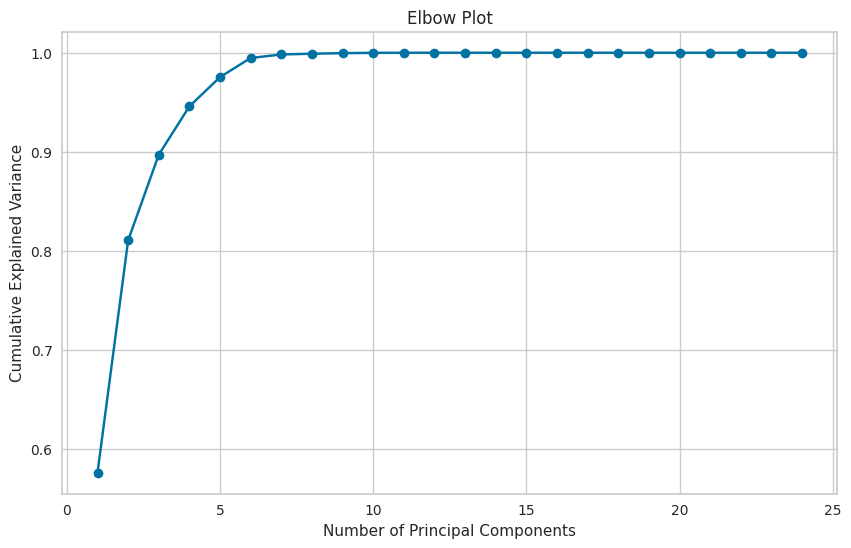

In [181]:
plot_elbow(pca_1_1)

In [182]:
def replace_with_pcs(df, original_columns, pca_df, n_pcs):
    """
    Replaces the specified original columns in the DataFrame with the selected principal components.

    Parameters:
    df (pandas.DataFrame): The original DataFrame.
    original_columns (list): The list of original columns that were used for PCA.
    pca_df (pd.DataFrame): The DataFrame containing the PCA components.
    n_pcs (int): The number of principal components to keep.

    Returns:
    pd.DataFrame: The DataFrame with the original columns replaced by the selected principal components.
    """
    # Keep only the selected principal components
    pca_selected_df = pca_df.iloc[:, :n_pcs]
    
    # Drop the original columns from the DataFrame
    df_dropped = df.drop(columns=original_columns, axis=1)
    
    # Concatenate the original DataFrame (with dropped columns) and the selected PCs
    df_final = pd.concat([df_dropped.reset_index(drop=True), pca_selected_df], axis=1)
    
    return df_final

In [183]:
train1 = replace_with_pcs(train1, head_normal_coordinate_columns, pca_df_1_1, 5)
train1.head()

Model.Suffix_Dam Workorder_Dam  CURE SPEED Collect Result_Dam  \
0      AJX75334505    4F1XA938-1                            100   
1      AJX75334505    3KPM0016-2                             70   
2      AJX75334501    3HPM0007-1                             70   
3      AJX75334501    3G1X8297-2                             70   
4      AJX75334501    3M1XH425-1                             70   

   DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                            16   
1                                            10   
2                                            10   
3                                            10   
4                                            16   

   DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                               14.9     
1                                               21.3     
2                                                9.7     
3                                                9.6     
4                                               13.2     

   DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
0                                                8.4     
1                                                4.9     
2                                                4.9     
3                                                4.9     
4                                                6.5     

   DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  \
0                                               14.7     
1                                               21.3     
2                                                9.6     
3                                                9.7     
4                                               13.2     

   Dispense Volume(Stage1) Collect Result_Dam  \
0                                        1.04   
1                                        1.49   
2                                        0.67   
3                                        0.67   
4                                        0.92   

   Dispense Volume(Stage2) Collect Result_Dam  \
0                                        0.58   
1                                        0.34   
2                                        0.34   
3                                        0.34   
4                                        0.45   

   Dispense Volume(Stage3) Collect Result_Dam  ...  \
0                                        1.02  ...   
1                                        1.49  ...   
2                                        0.67  ...   
3                                        0.67  ...   
4                                        0.92  ...   

   PalletID Collect Result_Fill2  Production Qty Collect Result_Fill2  \
0                           19.9                                    7   
1                            7.0                                  185   
2                            8.0                                  121   
3                            8.0                                  343   
4                           19.7                                    8   

   Receip No Collect Result_Fill2  WorkMode Collect Result_Fill2  target  \
0                             127                              1  Normal   
1                               1                              0  Normal   
2                               1                              0  Normal   
3                               1                              0  Normal   
4                             483                              1  Normal   

   PC1_HEAD  PC2_HEAD  PC3_HEAD  PC4_HEAD  PC5_HEAD  
0  5.193419 -0.362266  6.140480 -1.603639  0.829632  
1 -3.156533 -0.010456  0.580420  0.958172 -0.199273  
2 -3.464578  0.012378  0.129444  0.656936  0.660964  
3 -3.456874  0.012083  0.127047  0.654497  0.661518  
4  3.098230 -0.089947 -1.351053 -1.056028  0.406221  

[5 rows x 117 columns]

In [184]:
pca_df_1_2, pca_1_2 = perform_pca(train1, stage_columns)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

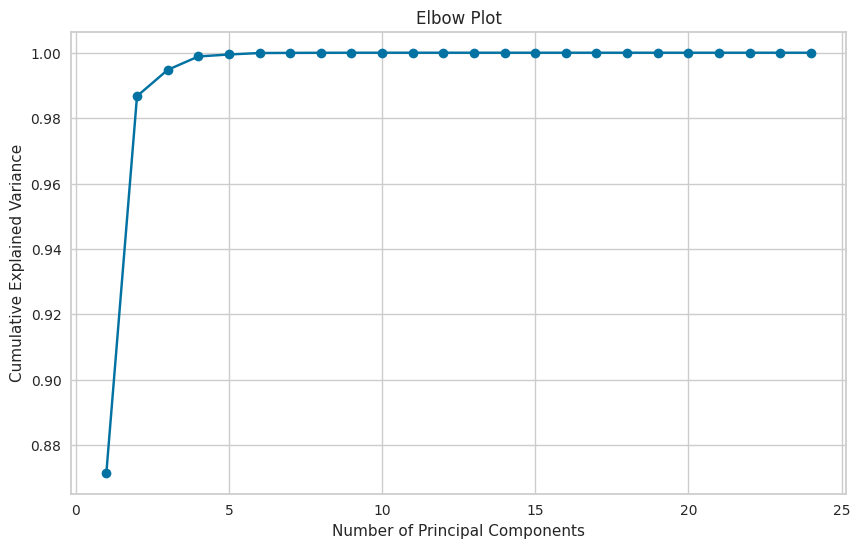

In [185]:
plot_elbow(pca_1_2)

In [186]:
train1 = replace_with_pcs(train1, stage_columns, pca_df_1_2, 4)
train1.head()

Model.Suffix_Dam Workorder_Dam  CURE SPEED Collect Result_Dam  \
0      AJX75334505    4F1XA938-1                            100   
1      AJX75334505    3KPM0016-2                             70   
2      AJX75334501    3HPM0007-1                             70   
3      AJX75334501    3G1X8297-2                             70   
4      AJX75334501    3M1XH425-1                             70   

   DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                            16   
1                                            10   
2                                            10   
3                                            10   
4                                            16   

   DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                               14.9     
1                                               21.3     
2                                                9.7     
3                                                9.6     
4                                               13.2     

   DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
0                                                8.4     
1                                                4.9     
2                                                4.9     
3                                                4.9     
4                                                6.5     

   DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  \
0                                               14.7     
1                                               21.3     
2                                                9.6     
3                                                9.7     
4                                               13.2     

   Dispense Volume(Stage1) Collect Result_Dam  \
0                                        1.04   
1                                        1.49   
2                                        0.67   
3                                        0.67   
4                                        0.92   

   Dispense Volume(Stage2) Collect Result_Dam  \
0                                        0.58   
1                                        0.34   
2                                        0.34   
3                                        0.34   
4                                        0.45   

   Dispense Volume(Stage3) Collect Result_Dam  ...  target  PC1_HEAD  \
0                                        1.02  ...  Normal  5.193419   
1                                        1.49  ...  Normal -3.156533   
2                                        0.67  ...  Normal -3.464578   
3                                        0.67  ...  Normal -3.456874   
4                                        0.92  ...  Normal  3.098230   

   PC2_HEAD  PC3_HEAD  PC4_HEAD  PC5_HEAD  PC1_Stage1  PC2_Stage1  PC3_Stage1  \
0 -0.362266  6.140480 -1.603639  0.829632    3.608114   -0.950636    0.164122   
1 -0.010456  0.580420  0.958172 -0.199273    4.188374    4.761878   -0.037081   
2  0.012378  0.129444  0.656936  0.660964   -4.767430   -1.120598   -0.471622   
3  0.012083  0.127047  0.654497  0.661518   -4.767430   -1.120598   -0.471622   
4 -0.089947 -1.351053 -1.056028  0.406221    1.589732   -0.761975    0.543753   

   PC4_Stage1  
0   -0.116688  
1   -0.277275  
2    0.067700  
3    0.067700  
4    0.222676  

[5 rows x 97 columns]

In [187]:
pca_df_1_3, pca_1_3 = perform_pca(train1, head_columns)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

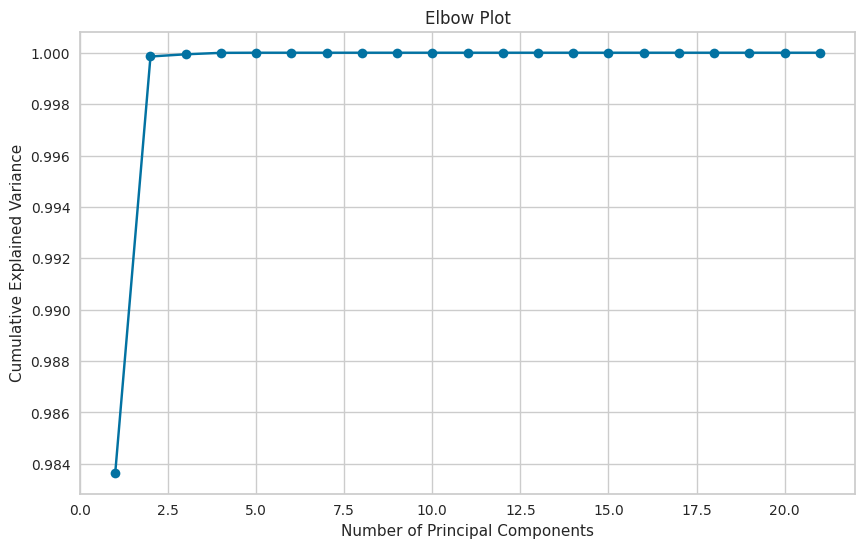

In [188]:
plot_elbow(pca_1_3)

In [189]:
train1 = replace_with_pcs(train1, head_columns, pca_df_1_3, 2)
train1.head()

Model.Suffix_Dam Workorder_Dam  CURE SPEED Collect Result_Dam  \
0      AJX75334505    4F1XA938-1                            100   
1      AJX75334505    3KPM0016-2                             70   
2      AJX75334501    3HPM0007-1                             70   
3      AJX75334501    3G1X8297-2                             70   
4      AJX75334501    3M1XH425-1                             70   

   DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                            16   
1                                            10   
2                                            10   
3                                            10   
4                                            16   

   DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                               14.9     
1                                               21.3     
2                                                9.7     
3                                                9.6     
4                                               13.2     

   DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
0                                                8.4     
1                                                4.9     
2                                                4.9     
3                                                4.9     
4                                                6.5     

   DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  \
0                                               14.7     
1                                               21.3     
2                                                9.6     
3                                                9.7     
4                                               13.2     

   Dispense Volume(Stage1) Collect Result_Dam  \
0                                        1.04   
1                                        1.49   
2                                        0.67   
3                                        0.67   
4                                        0.92   

   Dispense Volume(Stage2) Collect Result_Dam  \
0                                        0.58   
1                                        0.34   
2                                        0.34   
3                                        0.34   
4                                        0.45   

   Dispense Volume(Stage3) Collect Result_Dam  ...  PC2_HEAD  PC3_HEAD  \
0                                        1.02  ... -0.362266  6.140480   
1                                        1.49  ... -0.010456  0.580420   
2                                        0.67  ...  0.012378  0.129444   
3                                        0.67  ...  0.012083  0.127047   
4                                        0.92  ... -0.089947 -1.351053   

   PC4_HEAD  PC5_HEAD  PC1_Stage1  PC2_Stage1  PC3_Stage1  PC4_Stage1  \
0 -1.603639  0.829632    3.608114   -0.950636    0.164122   -0.116688   
1  0.958172 -0.199273    4.188374    4.761878   -0.037081   -0.277275   
2  0.656936  0.660964   -4.767430   -1.120598   -0.471622    0.067700   
3  0.654497  0.661518   -4.767430   -1.120598   -0.471622    0.067700   
4 -1.056028  0.406221    1.589732   -0.761975    0.543753    0.222676   

   PC1_Head  PC2_Head  
0  4.688391  0.015459  
1 -4.600469  1.084593  
2 -4.325185 -0.617705  
3 -4.317624 -0.616825  
4  4.664986  0.011506  

[5 rows x 78 columns]

In [190]:
pca_df_2_1, pca_2_1 = perform_pca(train2, head_normal_coordinate_columns)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

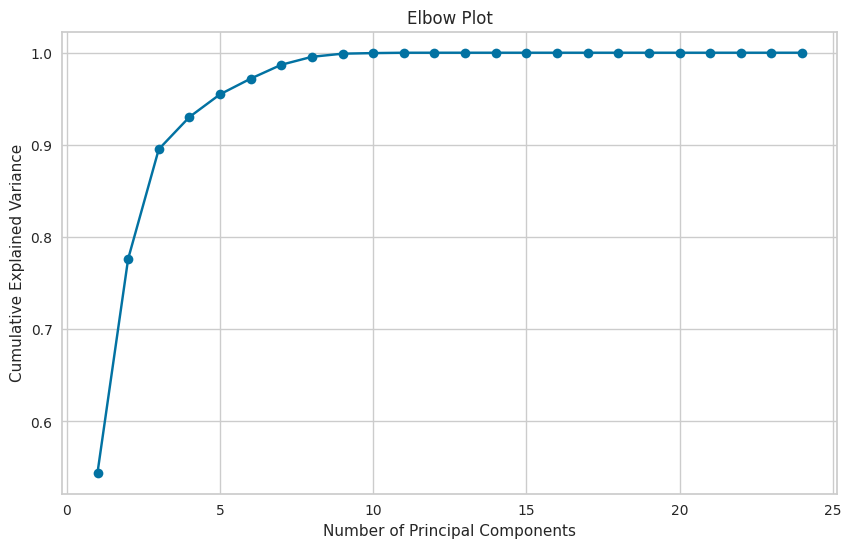

In [191]:
plot_elbow(pca_2_1)

In [192]:
train2 = replace_with_pcs(train2, head_normal_coordinate_columns, pca_df_2_1, 5)
train2.head()

Model.Suffix_Dam Workorder_Dam  CURE SPEED Collect Result_Dam  \
0      AJX75334501    4E1X9167-1                             85   
1      AJX75334501    3K1X0057-1                             70   
2      AJX75334501    4A1XB542-4                             70   
3      AJX75334501    4E1X9168-1                             85   
4      AJX75334501    4A1XC343-1                             70   

   DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                            16   
1                                            10   
2                                            16   
3                                            16   
4                                            16   

   DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                               14.7     
1                                               21.3     
2                                               13.2     
3                                               14.7     
4                                               13.2     

   DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
0                                                8.5     
1                                                8.4     
2                                                7.6     
3                                                8.5     
4                                                8.2     

   DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  \
0                                               14.7     
1                                               21.3     
2                                               13.2     
3                                               14.7     
4                                               13.2     

   Dispense Volume(Stage1) Collect Result_Dam  \
0                                        1.61   
1                                        1.49   
2                                        0.92   
3                                        1.02   
4                                        0.92   

   Dispense Volume(Stage2) Collect Result_Dam  \
0                                        0.93   
1                                        0.58   
2                                        0.53   
3                                        0.59   
4                                        0.57   

   Dispense Volume(Stage3) Collect Result_Dam  ...  \
0                                        1.61  ...   
1                                        1.49  ...   
2                                        0.92  ...   
3                                        1.02  ...   
4                                        0.92  ...   

   PalletID Collect Result_Fill2  Production Qty Collect Result_Fill2  \
0                           19.8                                   10   
1                           12.0                                  268   
2                           19.9                                   11   
3                           20.0                                   15   
4                           20.0                                   16   

   Receip No Collect Result_Fill2  WorkMode Collect Result_Fill2  target  \
0                              73                              1  Normal   
1                               1                              0  Normal   
2                             105                              1  Normal   
3                              78                              1  Normal   
4                             221                              1  Normal   

   PC1_HEAD  PC2_HEAD  PC3_HEAD  PC4_HEAD  PC5_HEAD  
0 -2.451407 -0.047820 -1.448244  0.460261  0.890000  
1  6.468809 -0.152674 -0.479424  0.191622 -0.386501  
2 -2.085849 -0.077489 -0.192406 -0.797495  0.335313  
3 -2.451407 -0.047820 -1.448244  0.460261  0.890000  
4 -2.097527 -0.077164 -0.188657 -0.797983  0.336089  

[5 rows x 117 columns]

In [193]:
pca_df_2_2, pca_2_2 = perform_pca(train2, stage_columns)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

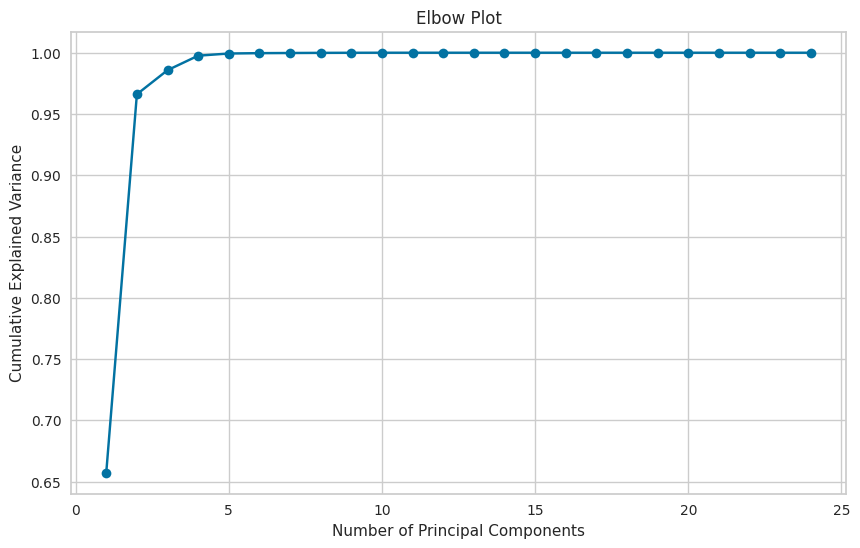

In [194]:
plot_elbow(pca_2_2)

In [195]:
train2 = replace_with_pcs(train2, stage_columns, pca_df_2_2, 4)
train2.head()

Model.Suffix_Dam Workorder_Dam  CURE SPEED Collect Result_Dam  \
0      AJX75334501    4E1X9167-1                             85   
1      AJX75334501    3K1X0057-1                             70   
2      AJX75334501    4A1XB542-4                             70   
3      AJX75334501    4E1X9168-1                             85   
4      AJX75334501    4A1XC343-1                             70   

   DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                            16   
1                                            10   
2                                            16   
3                                            16   
4                                            16   

   DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                               14.7     
1                                               21.3     
2                                               13.2     
3                                               14.7     
4                                               13.2     

   DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
0                                                8.5     
1                                                8.4     
2                                                7.6     
3                                                8.5     
4                                                8.2     

   DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  \
0                                               14.7     
1                                               21.3     
2                                               13.2     
3                                               14.7     
4                                               13.2     

   Dispense Volume(Stage1) Collect Result_Dam  \
0                                        1.61   
1                                        1.49   
2                                        0.92   
3                                        1.02   
4                                        0.92   

   Dispense Volume(Stage2) Collect Result_Dam  \
0                                        0.93   
1                                        0.58   
2                                        0.53   
3                                        0.59   
4                                        0.57   

   Dispense Volume(Stage3) Collect Result_Dam  ...  target  PC1_HEAD  \
0                                        1.61  ...  Normal -2.451407   
1                                        1.49  ...  Normal  6.468809   
2                                        0.92  ...  Normal -2.085849   
3                                        1.02  ...  Normal -2.451407   
4                                        0.92  ...  Normal -2.097527   

   PC2_HEAD  PC3_HEAD  PC4_HEAD  PC5_HEAD  PC1_Stage1  PC2_Stage1  PC3_Stage1  \
0 -0.047820 -1.448244  0.460261  0.890000   -0.361755   -1.629323   -0.105799   
1 -0.152674 -0.479424  0.191622 -0.386501   -6.230285    0.452168   -0.965089   
2 -0.077489 -0.192406 -0.797495  0.335313    2.557752   -1.072148    0.508713   
3 -0.047820 -1.448244  0.460261  0.890000   -0.361755   -1.629323   -0.105799   
4 -0.077164 -0.188657 -0.797983  0.336089    1.979108   -2.062289   -0.409835   

   PC4_Stage1  
0   -0.132314  
1    1.078825  
2   -0.098251  
3   -0.132314  
4   -0.408474  

[5 rows x 97 columns]

In [196]:
pca_df_2_3, pca_2_3 = perform_pca(train2, head_columns)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

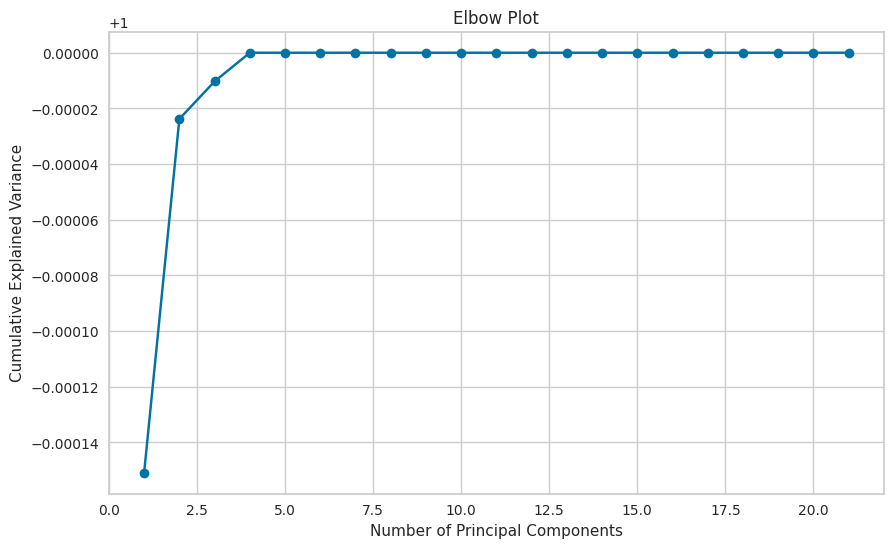

In [197]:
plot_elbow(pca_2_3)

🤔 여기서 왜 cumulative explained variance가 음수가 나오지...?

In [198]:
train2 = replace_with_pcs(train2, head_columns, pca_df_2_3, 2)

In [199]:
train2.head()

Model.Suffix_Dam Workorder_Dam  CURE SPEED Collect Result_Dam  \
0      AJX75334501    4E1X9167-1                             85   
1      AJX75334501    3K1X0057-1                             70   
2      AJX75334501    4A1XB542-4                             70   
3      AJX75334501    4E1X9168-1                             85   
4      AJX75334501    4A1XC343-1                             70   

   DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                            16   
1                                            10   
2                                            16   
3                                            16   
4                                            16   

   DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                               14.7     
1                                               21.3     
2                                               13.2     
3                                               14.7     
4                                               13.2     

   DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
0                                                8.5     
1                                                8.4     
2                                                7.6     
3                                                8.5     
4                                                8.2     

   DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  \
0                                               14.7     
1                                               21.3     
2                                               13.2     
3                                               14.7     
4                                               13.2     

   Dispense Volume(Stage1) Collect Result_Dam  \
0                                        1.61   
1                                        1.49   
2                                        0.92   
3                                        1.02   
4                                        0.92   

   Dispense Volume(Stage2) Collect Result_Dam  \
0                                        0.93   
1                                        0.58   
2                                        0.53   
3                                        0.59   
4                                        0.57   

   Dispense Volume(Stage3) Collect Result_Dam  ...  PC2_HEAD  PC3_HEAD  \
0                                        1.61  ... -0.047820 -1.448244   
1                                        1.49  ... -0.152674 -0.479424   
2                                        0.92  ... -0.077489 -0.192406   
3                                        1.02  ... -0.047820 -1.448244   
4                                        0.92  ... -0.077164 -0.188657   

   PC4_HEAD  PC5_HEAD  PC1_Stage1  PC2_Stage1  PC3_Stage1  PC4_Stage1  \
0  0.460261  0.890000   -0.361755   -1.629323   -0.105799   -0.132314   
1  0.191622 -0.386501   -6.230285    0.452168   -0.965089    1.078825   
2 -0.797495  0.335313    2.557752   -1.072148    0.508713   -0.098251   
3  0.460261  0.890000   -0.361755   -1.629323   -0.105799   -0.132314   
4 -0.797983  0.336089    1.979108   -2.062289   -0.409835   -0.408474   

   PC1_Head  PC2_Head  
0 -2.531444  0.080625  
1  8.353002  0.000270  
2 -2.503933 -0.042536  
3 -2.531444  0.080625  
4 -2.503933 -0.042536  

[5 rows x 78 columns]

In [200]:
train1.shape, train2.shape

((25030, 78), (15476, 78))

In [201]:
test_path = os.path.join(ROOT, 'test.csv')
test = pd.read_csv(test_path)

# test1: Equipment_Dam 값이 'Dam dispenser #1'인 경우
test1 = test[test['Equipment_Dam'] == 'Dam dispenser #1']

# test2: Equipment_Dam 값이 'Dam dispenser #2'인 경우
test2 = test[test['Equipment_Dam'] == 'Dam dispenser #2']

In [203]:
scaler = StandardScaler()
test1_1 = scaler.fit_transform(test1[head_normal_coordinate_columns])
test1_2 = scaler.fit_transform(test1[stage_columns])
test1_3 = scaler.fit_transform(test1[head_columns])
test2_1 = scaler.fit_transform(test2[head_normal_coordinate_columns])
test2_2 = scaler.fit_transform(test2[stage_columns])
test2_3 = scaler.fit_transform(test2[head_columns])

test1_1 = pca_1_1.transform(test1_1)
test1_2 = pca_1_2.transform(test1_2)
test1_3 = pca_1_3.transform(test1_3)
test2_1 = pca_2_1.transform(test2_1)
test2_2 = pca_2_2.transform(test2_2)
test2_3 = pca_2_3.transform(test2_3)

pca_df_test1_1 = pd.DataFrame(data=test1_1, columns=[f'PC{i+1}_HEAD' for i in range(test1_1.shape[1])])
pca_df_test1_2 = pd.DataFrame(data=test1_2, columns=[f'PC{i+1}_Stage1' for i in range(test1_2.shape[1])])
pca_df_test1_3 = pd.DataFrame(data=test1_3, columns=[f'PC{i+1}_Head' for i in range(test1_3.shape[1])])
pca_df_test2_1 = pd.DataFrame(data=test2_1, columns=[f'PC{i+1}_HEAD' for i in range(test2_1.shape[1])])
pca_df_test2_2 = pd.DataFrame(data=test2_2, columns=[f'PC{i+1}_Stage1' for i in range(test2_2.shape[1])])
pca_df_test2_3 = pd.DataFrame(data=test2_3, columns=[f'PC{i+1}_Head' for i in range(test2_3.shape[1])])

test1 = replace_with_pcs(test1, head_normal_coordinate_columns, pca_df_test1_1, 5)
test1 = replace_with_pcs(test1, stage_columns, pca_df_test1_2, 4)
test1 = replace_with_pcs(test1, head_columns, pca_df_test1_3, 2)

test2 = replace_with_pcs(test2, head_normal_coordinate_columns, pca_df_test2_1, 5)
test2 = replace_with_pcs(test2, stage_columns, pca_df_test2_2, 4)
test2 = replace_with_pcs(test2, head_columns, pca_df_test2_3, 2)


In [206]:
train1.shape, train2.shape

((25030, 78), (15476, 78))

In [205]:
test1.shape, test2.shape

((10734, 78), (6627, 78))

# 6. Undersampling & Oversampling

In [68]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [244]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

def balance_classes(df, target_column='target', smote_ratio=1.0, undersample_size=None, random_state=42, n_neighbors=5):
    """
    Balances the classes in the target column by applying SMOTE to oversample the minority class
    on numeric columns and using SimpleImputer to handle non-numeric columns. Optionally undersamples
    the majority class.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame.
    target_column (str): The name of the target column containing class labels. Default is 'target'.
    smote_ratio (float): The desired ratio of the number of samples in the minority class after SMOTE.
    undersample_size (int, optional): If specified, the number of samples to undersample the majority class to.
    random_state (int): Seed for reproducibility.
    n_neighbors (int): Number of neighbors to use for KNN Imputer.
    
    Returns:
    pd.DataFrame: The balanced DataFrame.
    dict: A dictionary containing the fitted LabelEncoders for non-numeric columns.
    """
    # Separate the features and the target
    X = df.drop(columns=[target_column])
    y = df[target_column]
    
    # Separate numeric and non-numeric columns
    numeric_columns = X.select_dtypes(include=['number']).columns
    non_numeric_columns = X.select_dtypes(exclude=['number']).columns
    
    # Apply SMOTE to oversample the minority class on numeric data only
    smote = SMOTE(sampling_strategy=smote_ratio, random_state=random_state)
    X_smote_numeric, y_smote = smote.fit_resample(X[numeric_columns], y)
    
    # Handle non-numeric columns using LabelEncoder and SimpleImputer
    label_encoders = {}
    if len(non_numeric_columns) > 0:
        non_numeric_data = X[non_numeric_columns].copy()
        for col in non_numeric_columns:
            if non_numeric_data[col].dtype == 'object':
                le = LabelEncoder()
                non_numeric_data[col] = le.fit_transform(non_numeric_data[col].astype(str))
                label_encoders[col] = le
        
        # Use SimpleImputer for missing values in non-numeric data
        simple_imputer = SimpleImputer(strategy='most_frequent')
        X_imputed_non_numeric = simple_imputer.fit_transform(non_numeric_data)
        X_imputed_non_numeric = pd.DataFrame(X_imputed_non_numeric, columns=non_numeric_columns)
        
        # Duplicate non-numeric data to match the number of rows in SMOTE output
        X_imputed_non_numeric_resampled = pd.DataFrame(
            [X_imputed_non_numeric.iloc[i % len(X_imputed_non_numeric)] for i in range(len(X_smote_numeric))],
            columns=non_numeric_columns
        )
    else:
        X_imputed_non_numeric_resampled = pd.DataFrame(index=X_smote_numeric.index)  # Empty DataFrame if no non-numeric columns
    
    # Optionally apply undersampling to the majority class
    if undersample_size is not None:
        undersampler = RandomUnderSampler(sampling_strategy={target_column: undersample_size}, random_state=random_state)
        X_resampled_numeric, y_resampled = undersampler.fit_resample(X_smote_numeric, y_smote)
        # Align the duplicated non-numeric data with the undersampled data
        X_imputed_non_numeric_resampled = X_imputed_non_numeric_resampled.iloc[:len(X_resampled_numeric)].reset_index(drop=True)
    else:
        X_resampled_numeric, y_resampled = X_smote_numeric, y_smote
    
    # Ensure no duplicate columns before concatenation and reset the indices
    X_resampled_numeric = pd.DataFrame(X_resampled_numeric, columns=numeric_columns).reset_index(drop=True)
    X_imputed_non_numeric_resampled = X_imputed_non_numeric_resampled.reset_index(drop=True)
    
    # Combine the numeric and non-numeric data
    X_resampled = pd.concat([X_resampled_numeric, X_imputed_non_numeric_resampled], axis=1)
    
    # Combine with the target column
    df_resampled = pd.concat([X_resampled, pd.DataFrame(y_resampled, columns=[target_column]).reset_index(drop=True)], axis=1)
    
    return df_resampled, label_encoders

**😎 코드 사용 예시**
1. Before SMOTE and Undersampling:
- Normal: 10,000 samples
- AbNormal: 1,000 samples
2. After SMOTE (smote_ratio=1.0):
- Normal: 10,000 samples
- AbNormal: 10,000 samples
3. After RandomUnderSampler (undersample_size=7,500):
- Normal: 7,500 samples
- AbNormal: 10,000 samples

*SMOTE는 numeric column에 대해서만 imputation 가능해서, non-numeric column은 KNN imputer 이용함!*

In [245]:
train1_balanced, label_encoder1 = balance_classes(train1, target_column='target', smote_ratio=1.0)
train2_balanced, label_encoder2 = balance_classes(train2, target_column='target', smote_ratio=1.0)

In [246]:
# Function to safely transform test data
def safe_transform(test_df, label_encoders):
    for col in test_df.columns:
        if col in label_encoders:
            le = label_encoders[col]
            # Map unseen labels to -1
            test_df[col] = test_df[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)
    return test_df

In [247]:
# Apply label encoding to non-numeric columns of test1 and test2
test1_non_numeric = test1.select_dtypes(exclude=['number'])
test2_non_numeric = test2.select_dtypes(exclude=['number'])

test1_non_numeric = safe_transform(test1_non_numeric, label_encoder1)
test2_non_numeric = safe_transform(test2_non_numeric, label_encoder2)

In [250]:
def replace_non_numeric_columns(test_df, non_numeric_df):
    """
    Replaces the non-numeric columns in test_df with the corresponding columns from non_numeric_df.
    
    Parameters:
    test_df (pandas.DataFrame): The original test DataFrame.
    non_numeric_df (pandas.DataFrame): The DataFrame containing transformed non-numeric data.
    
    Returns:
    pandas.DataFrame: The test DataFrame with updated non-numeric columns.
    """
    # Ensure the columns in non_numeric_df are in test_df
    for col in non_numeric_df.columns:
        if col in test_df.columns:
            test_df[col] = non_numeric_df[col]
    
    return test_df

In [ ]:
# Replace non-numeric columns in test1 and test2
test1 = replace_non_numeric_columns(test1, test1_non_numeric)
test2 = replace_non_numeric_columns(test2, test2_non_numeric)

In [251]:
test1.shape, test2.shape

((10734, 77), (6627, 78))

In [253]:
test2.drop(columns='target', inplace=True)

In [249]:
test1_non_numeric.head()

Model.Suffix_Dam  Workorder_Dam  Model.Suffix_AutoClave  \
0                 0            127                       0   
1                 0            413                       0   
2                 0             52                       0   
3                 0             27                       0   
4                 0             87                       0   

   Workorder_AutoClave  Equipment_Fill1  Model.Suffix_Fill1  Workorder_Fill1  \
0                  127                0                   0              127   
1                  413                0                   0              413   
2                   52                0                   0               52   
3                   27                0                   0               27   
4                   87                0                   0               87   

   Equipment_Fill2  Model.Suffix_Fill2  Workorder_Fill2  
0                0                   0              127  
1                0                   0              413  
2                0                   0               52  
3                0                   0               27  
4                0                   0               87

In [71]:
train1_balanced.shape, train2_balanced.shape

((47090, 78), (29222, 78))

In [254]:
train1_balanced.head()

CURE SPEED Collect Result_Dam  \
0                            100   
1                             70   
2                             70   
3                             70   
4                             70   

   DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                            16   
1                                            10   
2                                            10   
3                                            10   
4                                            16   

   DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                               14.9     
1                                               21.3     
2                                                9.7     
3                                                9.6     
4                                               13.2     

   DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
0                                                8.4     
1                                                4.9     
2                                                4.9     
3                                                4.9     
4                                                6.5     

   DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  \
0                                               14.7     
1                                               21.3     
2                                                9.6     
3                                                9.7     
4                                               13.2     

   Dispense Volume(Stage1) Collect Result_Dam  \
0                                        1.04   
1                                        1.49   
2                                        0.67   
3                                        0.67   
4                                        0.92   

   Dispense Volume(Stage2) Collect Result_Dam  \
0                                        0.58   
1                                        0.34   
2                                        0.34   
3                                        0.34   
4                                        0.45   

   Dispense Volume(Stage3) Collect Result_Dam  \
0                                        1.02   
1                                        1.49   
2                                        0.67   
3                                        0.67   
4                                        0.92   

   HEAD Standby Position X Collect Result_Dam  \
0                                      274.51   
1                                      257.00   
2                                      257.00   
3                                      257.00   
4                                      282.50   

   HEAD Standby Position Y Collect Result_Dam  ...  Workorder_Dam  \
0                                         257  ...            653   
1                                          66  ...            281   
2                                          66  ...            142   
3                                          66  ...             24   
4                                         257  ...            398   

   Model.Suffix_AutoClave  Workorder_AutoClave  Equipment_Fill1  \
0                       3                  653                0   
1                       3                  281                0   
2                       0                  142                0   
3                       0                   24                0   
4                       0                  398                0   

   Model.Suffix_Fill1  Workorder_Fill1  Equipment_Fill2  Model.Suffix_Fill2  \
0                   3              653                0                   3   
1                   3              281                0                   3   
2                   0              142                0                   0   
3                   0               24                0                   0   
4                   0              398 

In [255]:
train2_balanced.head()

CURE SPEED Collect Result_Dam  \
0                             85   
1                             70   
2                             70   
3                             85   
4                             70   

   DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                            16   
1                                            10   
2                                            16   
3                                            16   
4                                            16   

   DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                               14.7     
1                                               21.3     
2                                               13.2     
3                                               14.7     
4                                               13.2     

   DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
0                                                8.5     
1                                                8.4     
2                                                7.6     
3                                                8.5     
4                                                8.2     

   DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  \
0                                               14.7     
1                                               21.3     
2                                               13.2     
3                                               14.7     
4                                               13.2     

   Dispense Volume(Stage1) Collect Result_Dam  \
0                                        1.61   
1                                        1.49   
2                                        0.92   
3                                        1.02   
4                                        0.92   

   Dispense Volume(Stage2) Collect Result_Dam  \
0                                        0.93   
1                                        0.58   
2                                        0.53   
3                                        0.59   
4                                        0.57   

   Dispense Volume(Stage3) Collect Result_Dam  \
0                                        1.61   
1                                        1.49   
2                                        0.92   
3                                        1.02   
4                                        0.92   

   HEAD Standby Position X Collect Result_Dam  \
0                                     274.330   
1                                     257.000   
2                                     280.894   
3                                     274.330   
4                                     280.894   

   HEAD Standby Position Y Collect Result_Dam  ...  Workorder_Dam  \
0                                         257  ...            445   
1                                          66  ...            117   
2                                         257  ...            294   
3                                         257  ...            446   
4                                         257  ...            312   

   Model.Suffix_AutoClave  Workorder_AutoClave  Equipment_Fill1  \
0                       0                  445                1   
1                       0                  117                1   
2                       0                  294                1   
3                       0                  446                1   
4                       0                  312                1   

   Model.Suffix_Fill1  Workorder_Fill1  Equipment_Fill2  Model.Suffix_Fill2  \
0                   0              445                1                   0   
1                   0              117                1                   0   
2                   0              294                1                   0   
3                   0              446                1                   0   
4                   0              312 

# 7. Pycaret

In [256]:
import pycaret
pycaret.__version__

'3.3.2'

##### option 1) init setup!

In [257]:
from pycaret.classification import *
s1 = setup(train1_balanced, target = 'target', session_id = 123, use_gpu = True)
s2 = setup(train2_balanced, target = 'target', session_id = 123, use_gpu = True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


##### option 2) import ClassificationExperiment and init the class

In [258]:
from pycaret.classification import ClassificationExperiment
exp1 = ClassificationExperiment()
exp2 = ClassificationExperiment()
type(exp1), type(exp2)

(pycaret.classification.oop.ClassificationExperiment,
 pycaret.classification.oop.ClassificationExperiment)

In [259]:
# init setup on exp
exp1.setup(train1_balanced, target='target', session_id=123, use_gpu = True)
exp2.setup(train2_balanced, target='target', session_id=123, use_gpu = True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1
[LightGBM] [Fatal] CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1


##### Compare models!

In [260]:
best1 = exp1.compare_models()

Initiated  . . . . . . . . . . . . . . . . . .             09:49:17
Status     . . . . . . . . . . . . . . . . . .    Loading Estimator
Estimator  . . . . . . . . . . . . . . . . . .  Logistic Regression

In [261]:
best2 = exp2.compare_models()

Initiated  . . . . . . . . . . . . . . . . . .           09:57:32
Status     . . . . . . . . . . . . . . . . . .  Loading Estimator
Estimator  . . . . . . . . . . . . . . . . . .  Compiling Library

##### Analyze Model

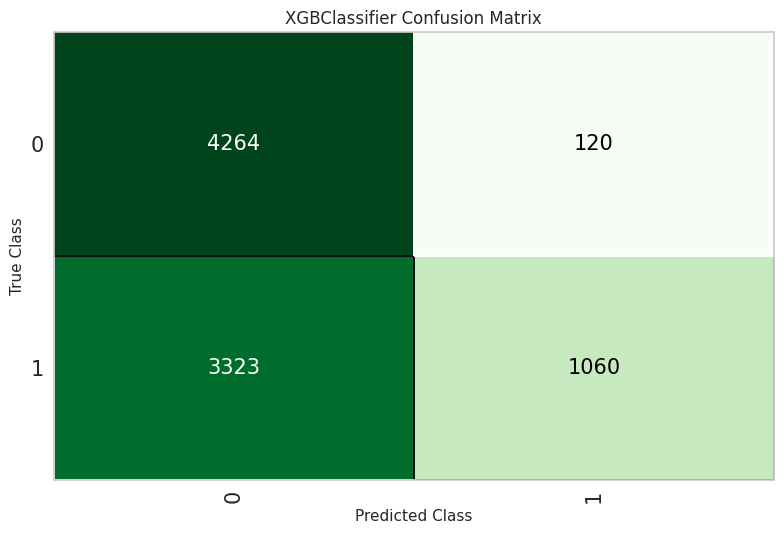

In [262]:
# plot confusion matrix 
plot_model(best1, plot='confusion_matrix')

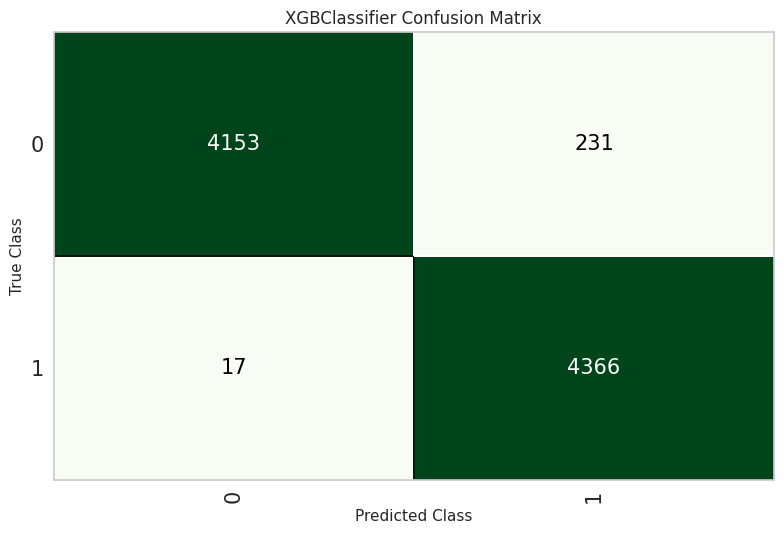

In [263]:
# plot confusion matrix 
plot_model(best2, plot='confusion_matrix')

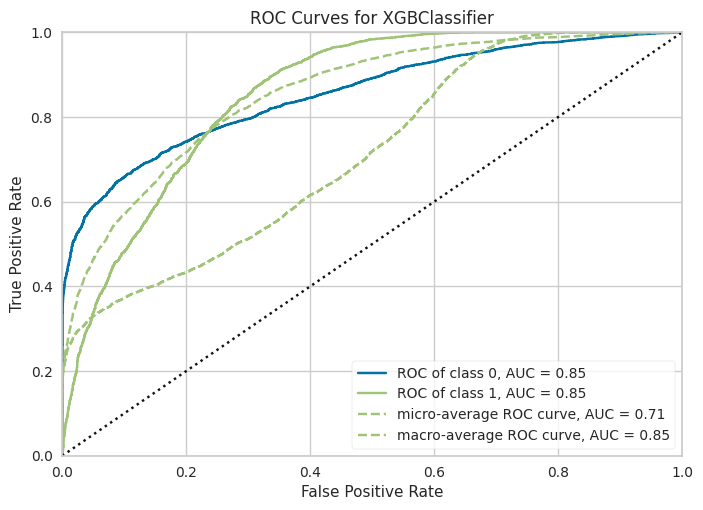

In [264]:
# plot AUC 
plot_model(best1, plot = 'auc')

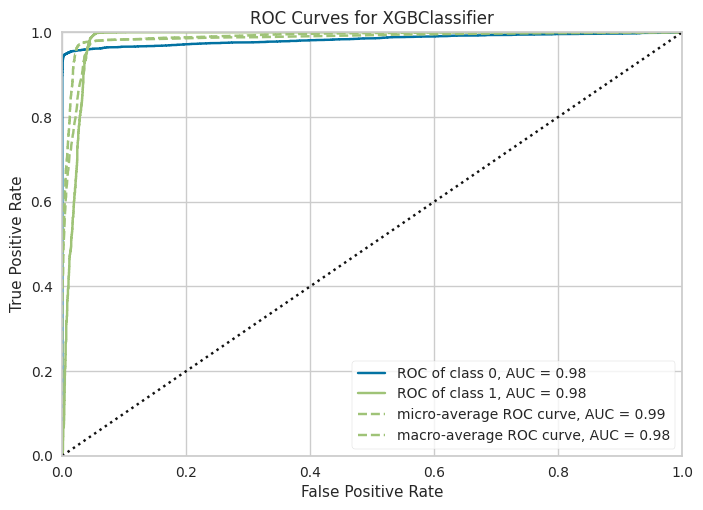

In [265]:
plot_model(best2, plot = 'auc')

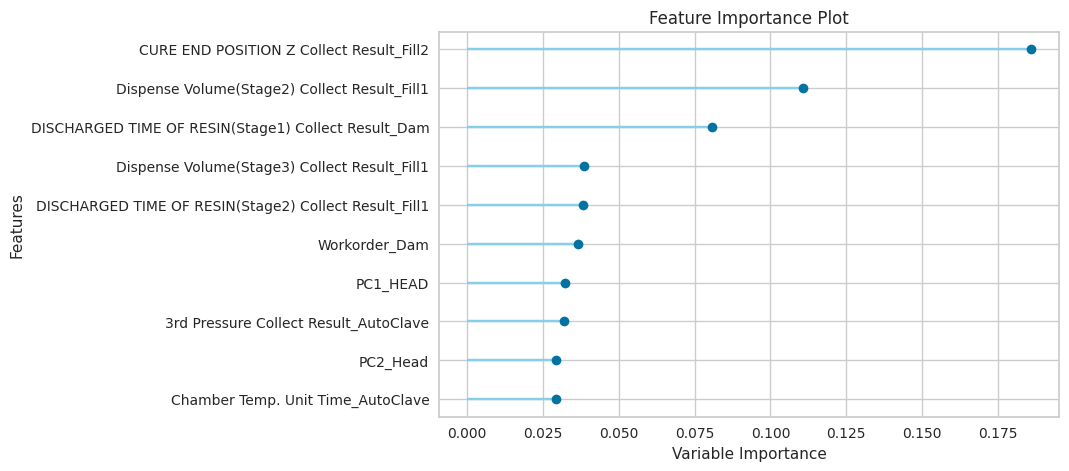

In [266]:
# plot feature importace 
plot_model(best1, plot='feature')

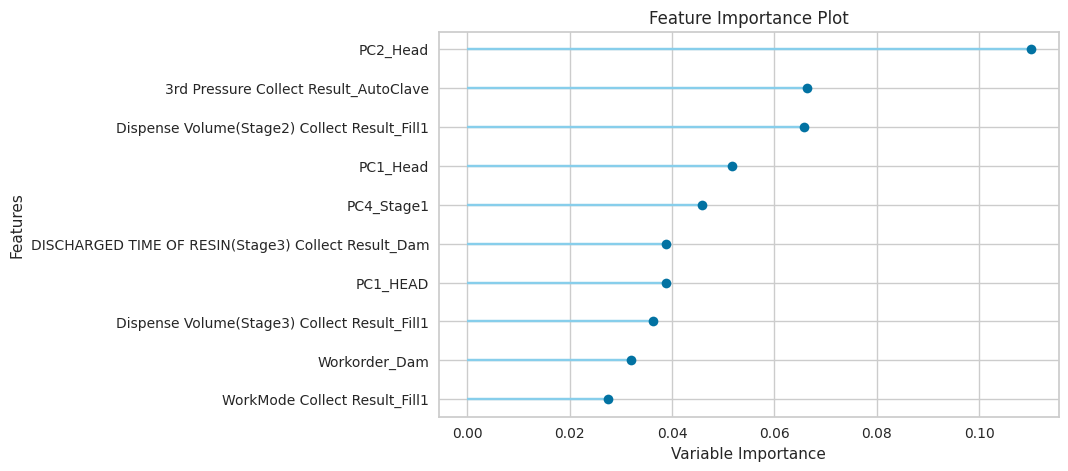

In [267]:
plot_model(best2, plot='feature')

In [268]:
evaluate_model(best1)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [269]:
evaluate_model(best2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

➡️ plot_model function을 대신한 function으로 interactive하게 모델 비교할 수 있는 것 같은데 어떻게 쓰는지 잘 모르겠음 😅 (어쩔땐 잘되고 어쩔땐 안되는듯?)

##### Prediction

In [271]:
test1.head()

CURE SPEED Collect Result_Dam  \
0                             70   
1                             70   
2                             70   
3                             70   
4                             70   

   DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                            10   
1                                            16   
2                                            10   
3                                            10   
4                                            10   

   DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                                9.7     
1                                               13.2     
2                                                9.6     
3                                                9.6     
4                                                9.7     

   DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
0                                                4.9     
1                                                7.5     
2                                                4.9     
3                                                4.9     
4                                                4.9     

   DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  \
0                                                9.7     
1                                               13.2     
2                                                9.7     
3                                                9.7     
4                                                9.7     

   Dispense Volume(Stage1) Collect Result_Dam  \
0                                        0.67   
1                                        0.92   
2                                        0.67   
3                                        0.67   
4                                        0.67   

   Dispense Volume(Stage2) Collect Result_Dam  \
0                                        0.34   
1                                        0.52   
2                                        0.34   
3                                        0.34   
4                                        0.34   

   Dispense Volume(Stage3) Collect Result_Dam  \
0                                        0.67   
1                                        0.92   
2                                        0.67   
3                                        0.67   
4                                        0.67   

   HEAD Standby Position X Collect Result_Dam  \
0                                     257.000   
1                                     281.222   
2                                     257.000   
3                                     257.000   
4                                     257.000   

   HEAD Standby Position Y Collect Result_Dam  ...  Model.Suffix_Dam  \
0                                          66  ...                 0   
1                                         257  ...                 0   
2                                          66  ...                 0   
3                                          66  ...                 0   
4                                          66  ...                 0   

   Workorder_Dam  Model.Suffix_AutoClave  Workorder_AutoClave  \
0            127                       0                  127   
1            413                       0                  413   
2             52                       0                   52   
3             27                       0                   27   
4             87                       0                   87   

   Equipment_Fill1  Model.Suffix_Fill1  Workorder_Fill1  Equipment_Fill2  \
0                0                   0              127                0   
1                0                   0              413                0   
2                0                   0               52                0   
3                0                   0               27                0   
4                0                   0          

In [272]:
test2.head()

CURE SPEED Collect Result_Dam  \
0                             70   
1                             70   
2                             70   
3                             70   
4                             70   

   DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                            10   
1                                            16   
2                                            10   
3                                            16   
4                                            10   

   DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                               17.0     
1                                               14.2     
2                                               21.3     
3                                               13.2     
4                                               21.3     

   DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
0                                                4.9     
1                                                8.3     
2                                               10.6     
3                                                6.5     
4                                               10.5     

   DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  \
0                                               17.0     
1                                               14.2     
2                                               21.3     
3                                               13.1     
4                                               21.3     

   Dispense Volume(Stage1) Collect Result_Dam  \
0                                        1.19   
1                                        0.99   
2                                        1.49   
3                                        1.45   
4                                        1.49   

   Dispense Volume(Stage2) Collect Result_Dam  \
0                                        0.34   
1                                        0.58   
2                                        0.74   
3                                        0.71   
4                                        0.73   

   Dispense Volume(Stage3) Collect Result_Dam  \
0                                        1.19   
1                                        0.99   
2                                        1.49   
3                                        1.44   
4                                        1.49   

   HEAD Standby Position X Collect Result_Dam  \
0                                      257.00   
1                                      274.20   
2                                      282.15   
3                                      282.15   
4                                      282.15   

   HEAD Standby Position Y Collect Result_Dam  ...  Model.Suffix_Dam  \
0                                          66  ...                 0   
1                                         257  ...                 0   
2                                         257  ...                 0   
3                                         257  ...                 0   
4                                         257  ...                 0   

   Workorder_Dam  Model.Suffix_AutoClave  Workorder_AutoClave  \
0            106                       0                  106   
1            373                       0                  373   
2            172                       0                  172   
3            203                       0                  203   
4            157                       0                  157   

   Equipment_Fill1  Model.Suffix_Fill1  Workorder_Fill1  Equipment_Fill2  \
0                1                   0              106                1   
1                1                   0              373                1   
2                1                   0              172                1   
3                1                   0              203                1   
4                1                   0          

In [273]:
test1.shape, test2.shape

((10734, 77), (6627, 77))

In [274]:
train1_balanced.head()

CURE SPEED Collect Result_Dam  \
0                            100   
1                             70   
2                             70   
3                             70   
4                             70   

   DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                            16   
1                                            10   
2                                            10   
3                                            10   
4                                            16   

   DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                               14.9     
1                                               21.3     
2                                                9.7     
3                                                9.6     
4                                               13.2     

   DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
0                                                8.4     
1                                                4.9     
2                                                4.9     
3                                                4.9     
4                                                6.5     

   DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  \
0                                               14.7     
1                                               21.3     
2                                                9.6     
3                                                9.7     
4                                               13.2     

   Dispense Volume(Stage1) Collect Result_Dam  \
0                                        1.04   
1                                        1.49   
2                                        0.67   
3                                        0.67   
4                                        0.92   

   Dispense Volume(Stage2) Collect Result_Dam  \
0                                        0.58   
1                                        0.34   
2                                        0.34   
3                                        0.34   
4                                        0.45   

   Dispense Volume(Stage3) Collect Result_Dam  \
0                                        1.02   
1                                        1.49   
2                                        0.67   
3                                        0.67   
4                                        0.92   

   HEAD Standby Position X Collect Result_Dam  \
0                                      274.51   
1                                      257.00   
2                                      257.00   
3                                      257.00   
4                                      282.50   

   HEAD Standby Position Y Collect Result_Dam  ...  Workorder_Dam  \
0                                         257  ...            653   
1                                          66  ...            281   
2                                          66  ...            142   
3                                          66  ...             24   
4                                         257  ...            398   

   Model.Suffix_AutoClave  Workorder_AutoClave  Equipment_Fill1  \
0                       3                  653                0   
1                       3                  281                0   
2                       0                  142                0   
3                       0                   24                0   
4                       0                  398                0   

   Model.Suffix_Fill1  Workorder_Fill1  Equipment_Fill2  Model.Suffix_Fill2  \
0                   3              653                0                   3   
1                   3              281                0                   3   
2                   0              142                0                   0   
3                   0               24                0                   0   
4                   0              398 

In [275]:
holdout_pred1 = predict_model(best1, data=test1)

In [276]:
holdout_pred2 = predict_model(best2, data=test2)

In [277]:
# show predictions df
holdout_pred1.head()

CURE SPEED Collect Result_Dam  \
0                             70   
1                             70   
2                             70   
3                             70   
4                             70   

   DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                            10   
1                                            16   
2                                            10   
3                                            10   
4                                            10   

   DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                                9.7     
1                                               13.2     
2                                                9.6     
3                                                9.6     
4                                                9.7     

   DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
0                                                4.9     
1                                                7.5     
2                                                4.9     
3                                                4.9     
4                                                4.9     

   DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  \
0                                                9.7     
1                                               13.2     
2                                                9.7     
3                                                9.7     
4                                                9.7     

   Dispense Volume(Stage1) Collect Result_Dam  \
0                                        0.67   
1                                        0.92   
2                                        0.67   
3                                        0.67   
4                                        0.67   

   Dispense Volume(Stage2) Collect Result_Dam  \
0                                        0.34   
1                                        0.52   
2                                        0.34   
3                                        0.34   
4                                        0.34   

   Dispense Volume(Stage3) Collect Result_Dam  \
0                                        0.67   
1                                        0.92   
2                                        0.67   
3                                        0.67   
4                                        0.67   

   HEAD Standby Position X Collect Result_Dam  \
0                                  257.000000   
1                                  281.221985   
2                                  257.000000   
3                                  257.000000   
4                                  257.000000   

   HEAD Standby Position Y Collect Result_Dam  ...  Model.Suffix_AutoClave  \
0                                          66  ...                       0   
1                                         257  ...                       0   
2                                          66  ...                       0   
3                                          66  ...                       0   
4                                          66  ...                       0   

   Workorder_AutoClave  Equipment_Fill1  Model.Suffix_Fill1  Workorder_Fill1  \
0                  127                0                   0              127   
1                  413                0                   0              413   
2                   52                0                   0               52   
3                   27                0                   0               27   
4                   87                0                   0               87   

   Equipment_Fill2  Model.Suffix_Fill2  Workorder_Fill2  prediction_label  \
0                0                   0              127            Normal   
1                0                   0              413            Normal   
2                0                   0               52            Norm

In [278]:
holdout_pred2.head()

CURE SPEED Collect Result_Dam  \
0                             70   
1                             70   
2                             70   
3                             70   
4                             70   

   DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                            10   
1                                            16   
2                                            10   
3                                            16   
4                                            10   

   DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                          17.000000     
1                                          14.200000     
2                                          21.299999     
3                                          13.200000     
4                                          21.299999     

   DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
0                                                4.9     
1                                                8.3     
2                                               10.6     
3                                                6.5     
4                                               10.5     

   DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam  \
0                                          17.000000     
1                                          14.200000     
2                                          21.299999     
3                                          13.100000     
4                                          21.299999     

   Dispense Volume(Stage1) Collect Result_Dam  \
0                                        1.19   
1                                        0.99   
2                                        1.49   
3                                        1.45   
4                                        1.49   

   Dispense Volume(Stage2) Collect Result_Dam  \
0                                        0.34   
1                                        0.58   
2                                        0.74   
3                                        0.71   
4                                        0.73   

   Dispense Volume(Stage3) Collect Result_Dam  \
0                                        1.19   
1                                        0.99   
2                                        1.49   
3                                        1.44   
4                                        1.49   

   HEAD Standby Position X Collect Result_Dam  \
0                                  257.000000   
1                                  274.200012   
2                                  282.149994   
3                                  282.149994   
4                                  282.149994   

   HEAD Standby Position Y Collect Result_Dam  ...  Model.Suffix_AutoClave  \
0                                          66  ...                       0   
1                                         257  ...                       0   
2                                         257  ...                       0   
3                                         257  ...                       0   
4                                         257  ...                       0   

   Workorder_AutoClave  Equipment_Fill1  Model.Suffix_Fill1  Workorder_Fill1  \
0                  106                1                   0              106   
1                  373                1                   0              373   
2                  172                1                   0              172   
3                  203                1                   0              203   
4                  157                1                   0              157   

   Equipment_Fill2  Model.Suffix_Fill2  Workorder_Fill2  prediction_label  \
0                1                   0              106          AbNormal   
1                1                   0              373            Normal   
2                1                   0              172            Norm

In [279]:
# save predictions
holdout_pred1.to_csv(os.path.join(ROOT, 'holdout_pred1.csv'), index=True)
holdout_pred2.to_csv(os.path.join(ROOT, 'holdout_pred2.csv'), index=True)

In [315]:
filtered_test_1 = test[test['Equipment_Dam'] == 'Dam dispenser #1']
filtered_test_2 = test[test['Equipment_Dam'] == 'Dam dispenser #2']

In [319]:
filtered_test_1['target'] = holdout_pred1['prediction_label'].values
filtered_test_2['target'] = holdout_pred2['prediction_label'].values

In [321]:
test_final = pd.concat([filtered_test_1, filtered_test_2], axis=0).reset_index(drop=True)

In [322]:
# Keep only the 'Set ID' and 'target' columns
submission = test_final[['Set ID', 'target']]

# Save the submission DataFrame to a CSV file
submission.to_csv('/root/LG_aimers_24summer/submission.csv', index=False)